# Threshold-Using GaussianBlur- noise removal

# اعمال آستانه‌گذاری قابل تطبیق
Adaptive Thresholding
In the previous section, we used one global value as a threshold. But this might not be good in all cases, e.g. if an image has different lighting conditions in different areas. In that case, adaptive thresholding can help. Here, the algorithm determines the threshold for a pixel based on a small region around it. So we get different thresholds for different regions of the same image which gives better results for images with varying illumination.

The adaptiveMethod decides how the threshold value is calculated:

cv2.ADAPTIVE_THRESH_MEAN_C: The threshold value is the mean of the neighbourhood area minus the constant C.

cv2.ADAPTIVE_THRESH_GAUSSIAN_C: The threshold value is a gaussian-weighted sum of the neighbourhood values minus the constant C.

The blockSize determines the size of the neighbourhood area and C is a constant that is subtracted from the mean or weighted sum of the neighbourhood pixels.







cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C)

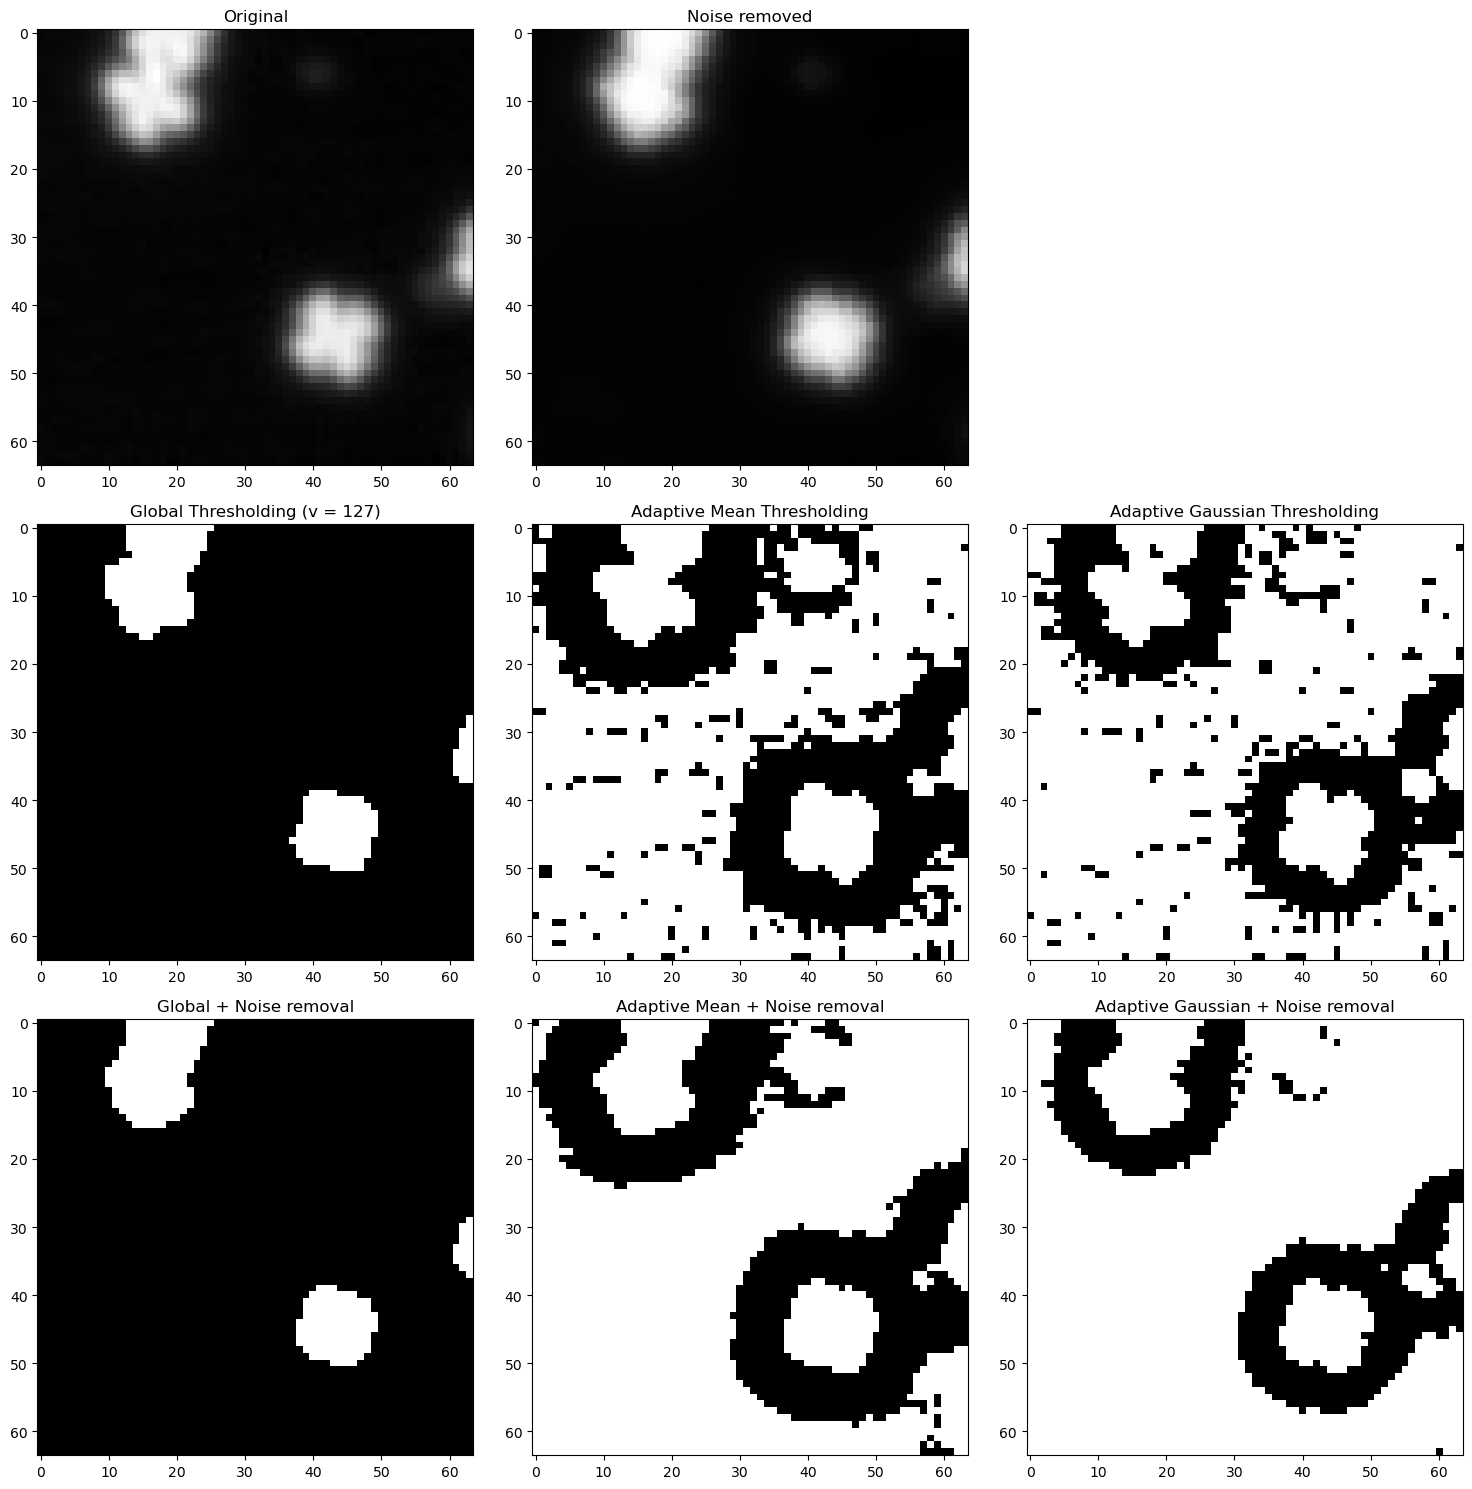

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image safely
original_image = cv2.imread(r'D:\exam\test\otsu.jpg', 0)
if original_image is None:
    raise FileNotFoundError("Image not found. Please check the file path.")

# Noise removal
noise_removed_image = cv2.medianBlur(original_image, 5)

# Thresholding
_, output1 = cv2.threshold(original_image, 127, 255, cv2.THRESH_BINARY)
output2 = cv2.adaptiveThreshold(original_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
output3 = cv2.adaptiveThreshold(original_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

_, output4 = cv2.threshold(noise_removed_image, 127, 255, cv2.THRESH_BINARY)
output5 = cv2.adaptiveThreshold(noise_removed_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
output6 = cv2.adaptiveThreshold(noise_removed_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Plot results
plt.figure(figsize=[15, 15])
plt.subplot(331); plt.imshow(original_image, cmap='gray'); plt.title("Original")
plt.subplot(332); plt.imshow(noise_removed_image, cmap='gray'); plt.title("Noise removed")

plt.subplot(334); plt.imshow(output1, cmap='gray'); plt.title("Global Thresholding (v = 127)")
plt.subplot(335); plt.imshow(output2, cmap='gray'); plt.title("Adaptive Mean Thresholding")
plt.subplot(336); plt.imshow(output3, cmap='gray'); plt.title("Adaptive Gaussian Thresholding")

plt.subplot(337); plt.imshow(output4, cmap='gray'); plt.title("Global + Noise removal")
plt.subplot(338); plt.imshow(output5, cmap='gray'); plt.title("Adaptive Mean + Noise removal")
plt.subplot(339); plt.imshow(output6, cmap='gray'); plt.title("Adaptive Gaussian + Noise removal")

plt.tight_layout()
# ذخیره تصویر مورد نظر برای استفاده بعدی
cv2.imwrite('temp_output6.jpg', output6)
cv2.imwrite('temp_output3.jpg', output3)
plt.show()



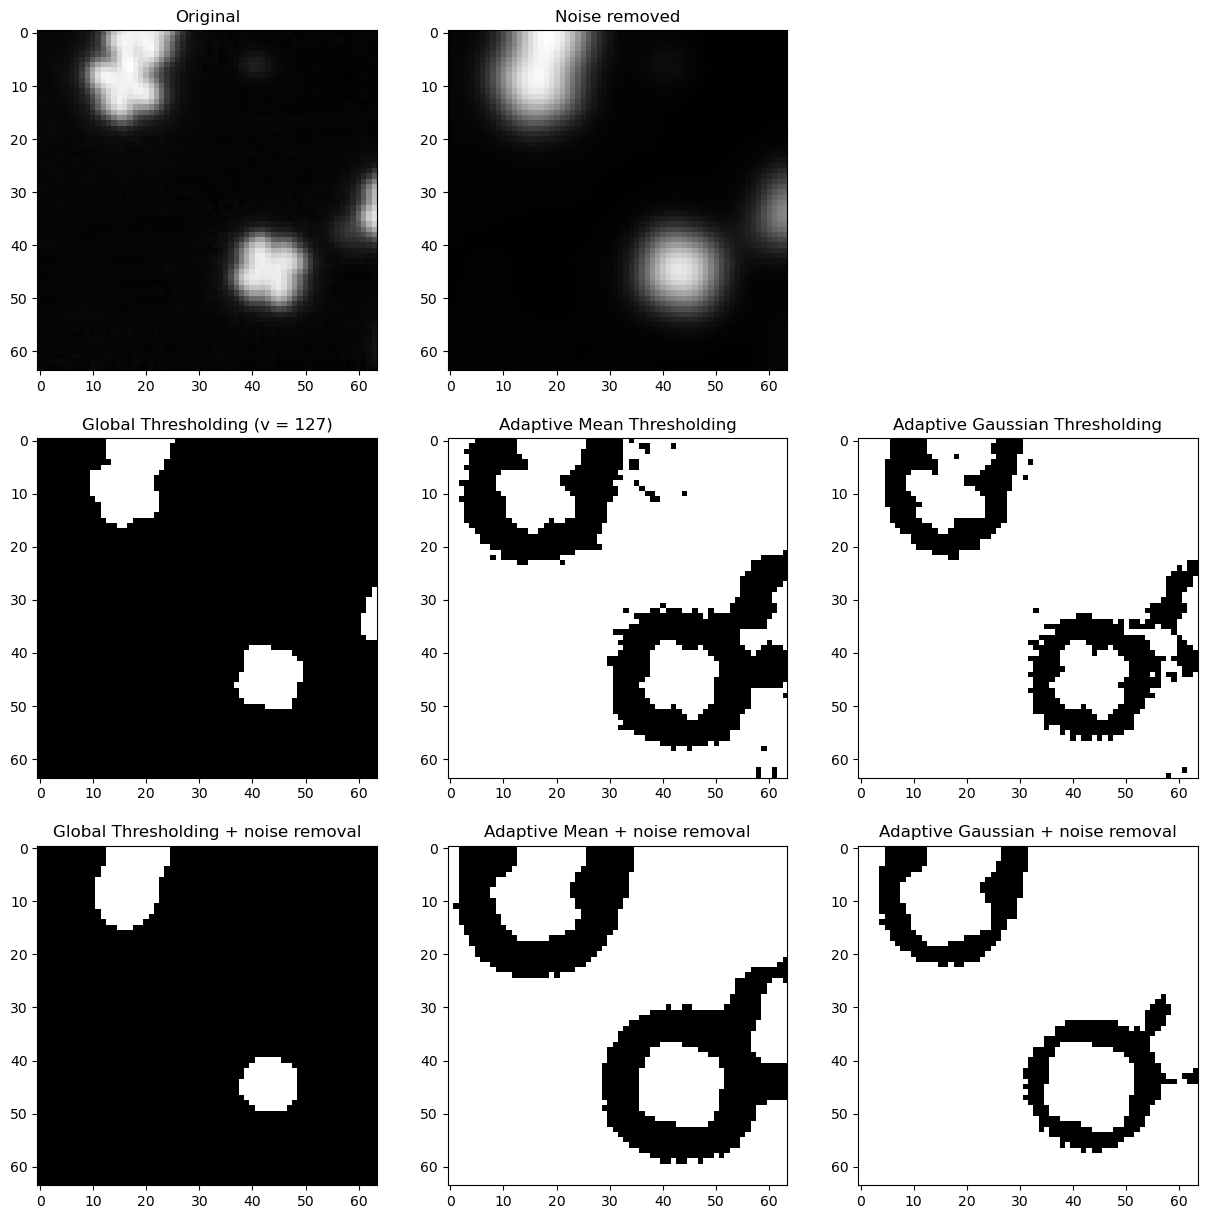

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# بارگذاری تصویر جدید
original_image = cv2.imread(r'D:\exam\test\otsu.jpg', 0)

# حذف نویز
noise_removed_image = cv2.GaussianBlur(original_image, (15, 15), 0)  # فیلتر بزرگ‌تر شده است

# اعمال آستانه‌گذاری
_, output1 = cv2.threshold(original_image, 127, 255, cv2.THRESH_BINARY)
output2 = cv2.adaptiveThreshold(original_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 4)
output3 = cv2.adaptiveThreshold(original_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 4)

_, output4 = cv2.threshold(noise_removed_image, 127, 255, cv2.THRESH_BINARY)
output5 = cv2.adaptiveThreshold(noise_removed_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 4)
output6 = cv2.adaptiveThreshold(noise_removed_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 4)

# نمایش تصاویر
plt.figure(figsize=[15, 15])
plt.subplot(331); plt.imshow(original_image, cmap='gray'); plt.title("Original");
plt.subplot(332); plt.imshow(noise_removed_image, cmap='gray'); plt.title("Noise removed");

plt.subplot(334); plt.imshow(output1, cmap='gray'); plt.title("Global Thresholding (v = 127)");
plt.subplot(335); plt.imshow(output2, cmap='gray'); plt.title("Adaptive Mean Thresholding");
plt.subplot(336); plt.imshow(output3, cmap='gray'); plt.title("Adaptive Gaussian Thresholding");

plt.subplot(337); plt.imshow(output4, cmap='gray'); plt.title("Global Thresholding + noise removal");
plt.subplot(338); plt.imshow(output5, cmap='gray'); plt.title("Adaptive Mean + noise removal");
plt.subplot(339); plt.imshow(output6, cmap='gray'); plt.title("Adaptive Gaussian + noise removal");

plt.show()


## Dilation, Erosion, Opening and Closing 

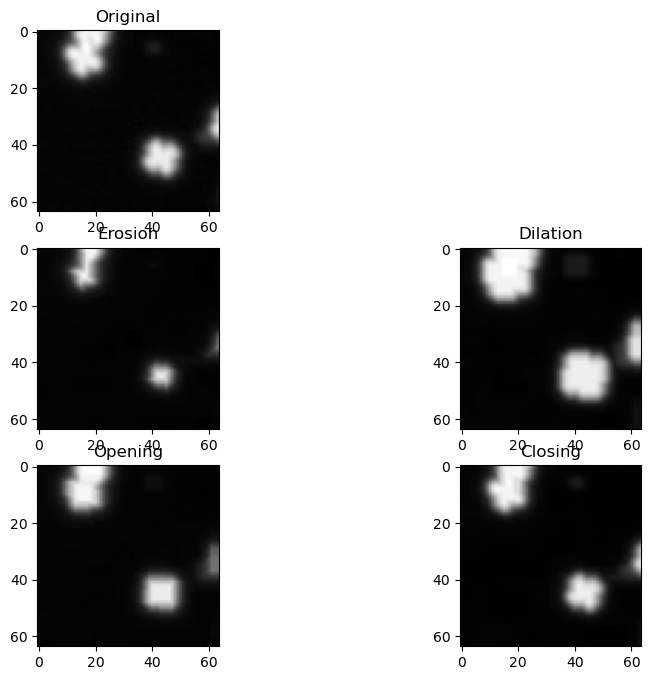

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(r'D:\exam\test\otsu.jpg', 0)

# Let's define our kernel size
kernel = np.ones((5,5), np.uint8)

erosion = cv2.erode(image, kernel, iterations = 1)
dilation = cv2.dilate(image, kernel, iterations = 1)
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)



plt.figure(figsize=[10,8])
plt.subplot(321);plt.imshow(image, cmap='gray');plt.title("Original");

plt.subplot(323);plt.imshow(erosion, cmap='gray');plt.title("Erosion");
plt.subplot(324);plt.imshow(dilation, cmap='gray');plt.title("Dilation");

plt.subplot(325);plt.imshow(opening, cmap='gray');plt.title("Opening");
plt.subplot(326);plt.imshow(closing, cmap='gray');plt.title("Closing");

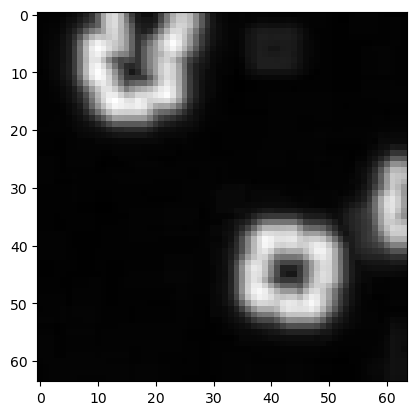

In [24]:
# Morphological Gradient
subtracted = cv2.subtract(dilation, erosion)
plt.imshow(subtracted, cmap='gray')

# استفاده از getStructuringElement

`cv2.getStructuringElement(shape, ksize)`

different shapes can be found by  cv2.MORPH_???

True

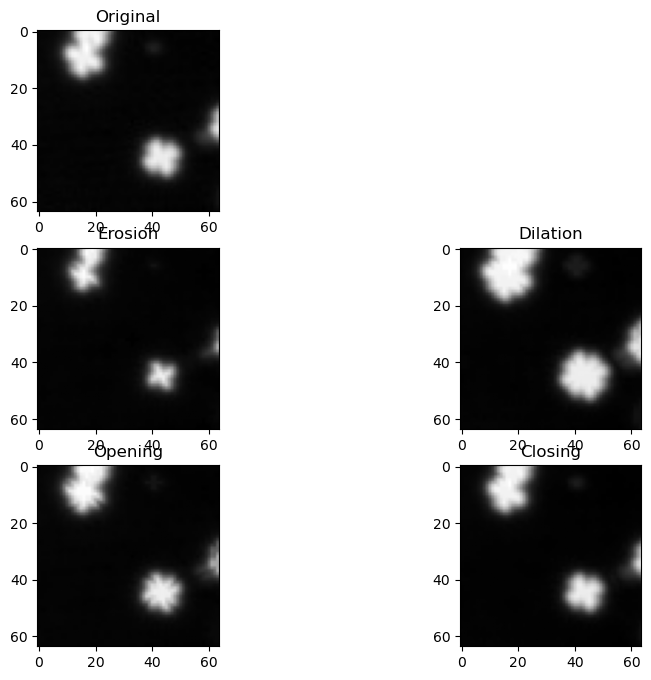

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(r'D:\exam\test\otsu.jpg', 0)

# Let's define our kernel size
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5), (2, 2))

erosion = cv2.erode(image, kernel, iterations = 1)
dilation = cv2.dilate(image, kernel, iterations = 1)
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)



plt.figure(figsize=[10,8])
plt.subplot(321);plt.imshow(image, cmap='gray');plt.title("Original");

plt.subplot(323);plt.imshow(erosion, cmap='gray');plt.title("Erosion");
plt.subplot(324);plt.imshow(dilation, cmap='gray');plt.title("Dilation");

plt.subplot(325);plt.imshow(opening, cmap='gray');plt.title("Opening");
plt.subplot(326);plt.imshow(closing, cmap='gray');plt.title("Closing");


# ذخیره تصویر مورد نظر برای استفاده بعدی
cv2.imwrite('temp_output_erosion.jpg', erosion )
cv2.imwrite('temp_output_dilation.jpg', dilation)
cv2.imwrite('temp_output_opening.jpg', opening)
cv2.imwrite('temp_output_closing.jpg', closing)

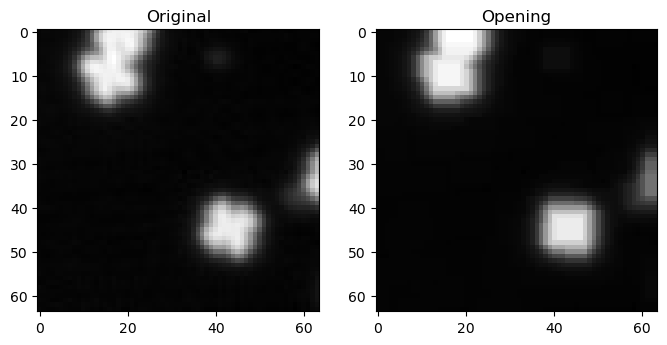

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(r'D:\exam\test\otsu.jpg', 0)

# Let's define our kernel size
kernel = np.ones((5,5), np.uint8)

opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)



plt.figure(figsize=[8,5])
plt.subplot(121);plt.imshow(image, cmap='gray');plt.title("Original");
plt.subplot(122);plt.imshow(opening, cmap='gray');plt.title("Opening");

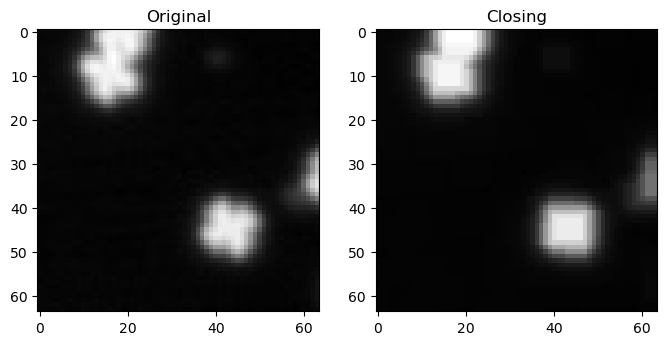

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(r'D:\exam\test\otsu.jpg', 0)

# Let's define our kernel size
kernel = np.ones((5,5), np.uint8)

closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=[8,5])
plt.subplot(121);plt.imshow(image, cmap='gray');plt.title("Original");
plt.subplot(122);plt.imshow(opening, cmap='gray');plt.title("Closing");

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">برچسب زنی اجزای متصل و پیوسته</div>

cv2.imwrite('temp_output_erosion.jpg', erosion )
cv2.imwrite('temp_output_dilation.jpg', dilation)
cv2.imwrite('temp_output_opening.jpg', opening)
cv2.imwrite('temp_output_closing.jpg', closing)

number of components that identified: 1


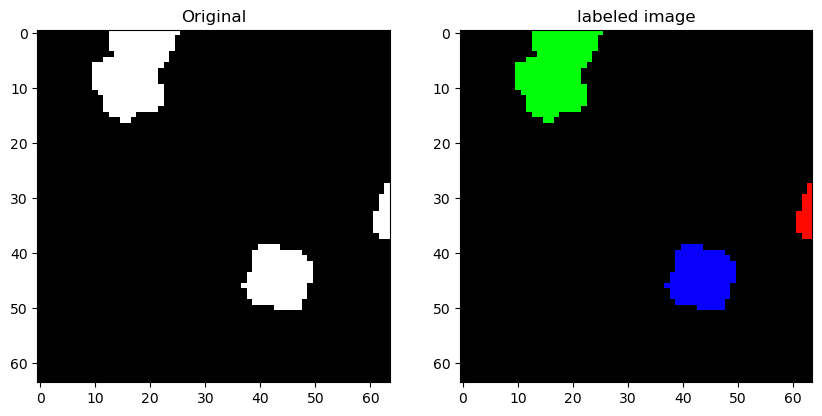

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

img = cv2.imread(r'D:\exam\test\otsu.jpg', 0)
_, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
num_labels, labels = cv2.connectedComponents(img)

# Map component labels to hue val, 0-179 is the hue range in OpenCV
label_hue = np.uint8(179*labels/np.max(labels))
blank = np.ones_like(img) * 255
labeled_img = cv2.merge([label_hue, blank, blank])

# Converting cvt to BGR
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

# set bg label to black
labeled_img[label_hue==0] = 0


plt.figure(figsize=[10,8])
plt.subplot(121);plt.imshow(img, cmap='gray');plt.title("Original");
plt.subplot(122);plt.imshow(labeled_img, cmap='gray');plt.title("labeled image");


# مرحله ۴: تحلیل مؤلفه‌های متصل
num_labels, labels = cv2.connectedComponents(binary)

# چاپ تعداد ارقام (تعداد مؤلفه‌ها منهای ۱ چون پس‌زمینه هم یک لیبل دارد)
print("number of components that identified:", num_labels-1)




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.segmentation import watershed
from skimage.feature import peak_local_max


# Generate an initial image with two overlapping circles
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1) ** 2 + (y - y1) ** 2 < r1**2
mask_circle2 = (x - x2) ** 2 + (y - y2) ** 2 < r2**2
image = np.logical_or(mask_circle1, mask_circle2)

# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(image)
coords = peak_local_max(distance, footprint=np.ones((3, 3)), labels=image)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)
labels = watershed(-distance, markers, mask=image)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray)
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

In [33]:
np.max(labels)

1

number of components that identified: 2


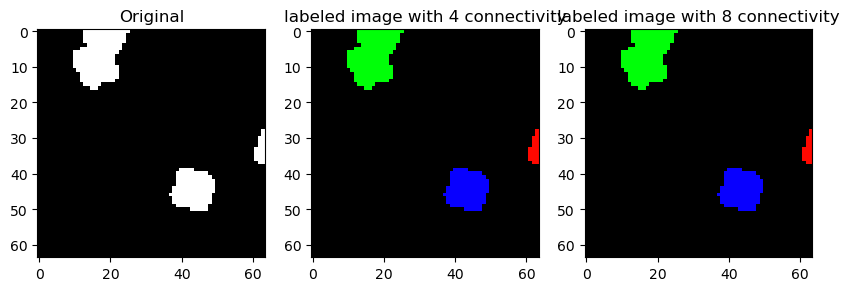

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

img = cv2.imread(r'D:\exam\test\otsu.jpg', 0)
_, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
_, labels_with_4_connectivity = cv2.connectedComponents(img, connectivity=4)
_, labels_with_8_connectivity = cv2.connectedComponents(img, connectivity=8)

label_hue4 = np.uint8(179*labels_with_4_connectivity/np.max(labels_with_4_connectivity))
label_hue8 = np.uint8(179*labels_with_8_connectivity/np.max(labels_with_8_connectivity))

blank = np.ones_like(img) * 255
labeled_img4 = cv2.merge([label_hue4, blank, blank])
labeled_img8 = cv2.merge([label_hue8, blank, blank])

# Converting cvt to BGR
labeled_img4 = cv2.cvtColor(labeled_img4, cv2.COLOR_HSV2BGR)
labeled_img8 = cv2.cvtColor(labeled_img8, cv2.COLOR_HSV2BGR)

# set bg label to black
labeled_img4[label_hue4==0] = 0
labeled_img8[label_hue8==0] = 0

plt.figure(figsize=[10,8])
plt.subplot(131);plt.imshow(img, cmap='gray');plt.title("Original");
plt.subplot(132);plt.imshow(labeled_img4, cmap='gray');plt.title("labeled image with 4 connectivity");
plt.subplot(133);plt.imshow(labeled_img8, cmap='gray');plt.title("labeled image with 8 connectivity");


# مرحله ۴: تحلیل مؤلفه‌های متصل
num_labels, labels = cv2.connectedComponents(binary)

# چاپ تعداد ارقام (تعداد مؤلفه‌ها منهای ۱ چون پس‌زمینه هم یک لیبل دارد)
print("number of components that identified:", num_labels-1 )

In [12]:
labels_with_4_connectivity

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [8]:
labels_with_8_connectivity

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

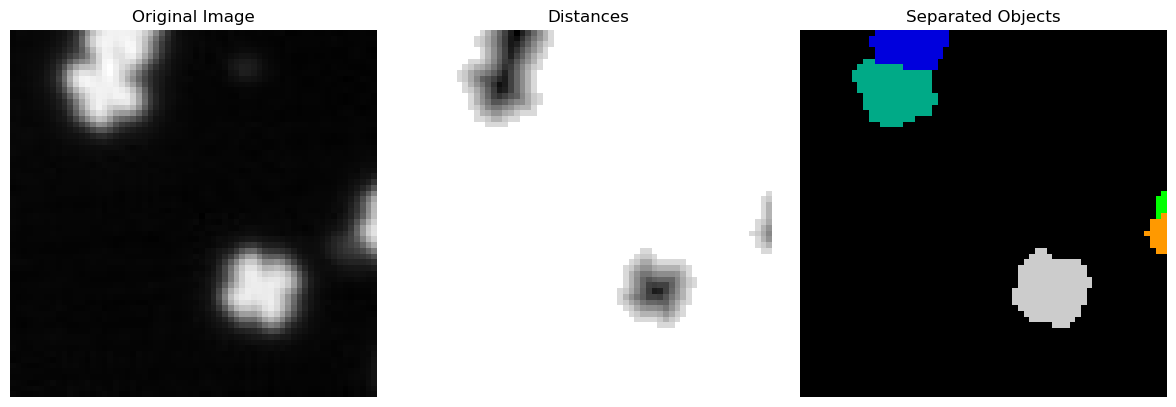

Number of molecules detected: 5


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage import io, color, filters
from skimage.segmentation import watershed
from skimage.feature import peak_local_max

# خواندن تصویر از مسیر مشخص‌شده
image_path = r"D:\exam\test\otsu.jpg"
image = io.imread(image_path)

# تبدیل تصویر به grayscale اگر رنگی باشد
if len(image.shape) == 3:
    image = color.rgb2gray(image)

# اعمال آستانه‌گذاری Otsu برای تبدیل تصویر به باینری
threshold_value = filters.threshold_otsu(image)
binary_image = image > threshold_value

# محاسبه فاصله از پس‌زمینه (Distance Transform)
distance = ndi.distance_transform_edt(binary_image)

# پیدا کردن نقاط ماکزیمم محلی به‌عنوان نشانه‌ها (Markers)
coords = peak_local_max(distance, footprint=np.ones((3, 3)), labels=binary_image)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)

# اعمال الگوریتم Watershed
labels = watershed(-distance, markers, mask=binary_image)

# نمایش تصاویر
fig, axes = plt.subplots(ncols=3, figsize=(12, 4), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original Image')

ax[1].imshow(-distance, cmap=plt.cm.gray)
ax[1].set_title('Distances')

ax[2].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[2].set_title('Separated Objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

# محاسبه تعداد مولکول‌ها (تعداد لیبل‌ها)
num_molecules = len(np.unique(labels)) - 1  # کم کردن ۱ برای زمینه (Background)
print(f"Number of molecules detected: {num_molecules}")

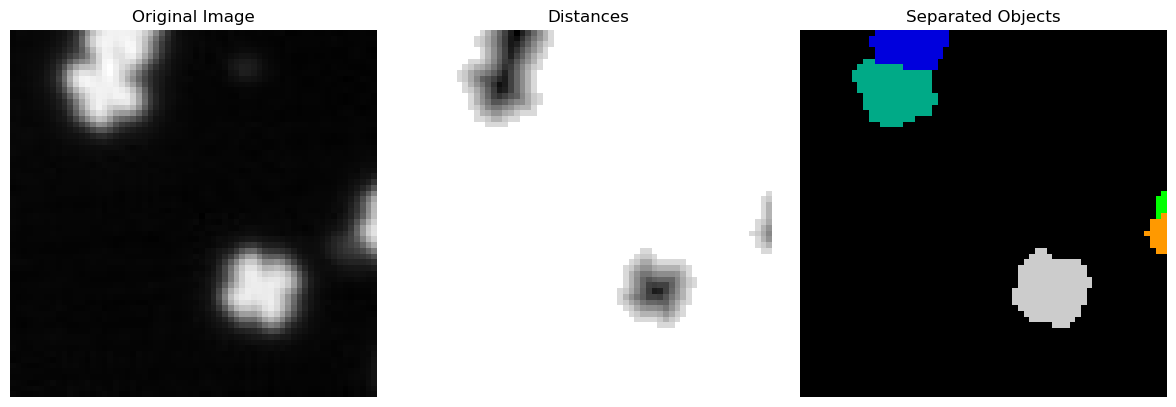

Number of molecules fully inside the FoV: 1


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage import io, color, filters
from skimage.segmentation import watershed
from skimage.feature import peak_local_max

# Read the image from the specified path
image_path = r"D:\exam\test\otsu.jpg"
image = io.imread(image_path)

# Convert the image to grayscale if it is RGB
if len(image.shape) == 3:
    image = color.rgb2gray(image)

# Apply Otsu's thresholding to convert the image to binary
threshold_value = filters.threshold_otsu(image)
binary_image = image > threshold_value

# Compute the distance transform
distance = ndi.distance_transform_edt(binary_image)

# Find local maxima as markers for the watershed algorithm
coords = peak_local_max(distance, footprint=np.ones((3, 3)), labels=binary_image)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)

# Apply the watershed algorithm
labels = watershed(-distance, markers, mask=binary_image)

# Identify labels that touch the edges of the image
rows, cols = labels.shape
edge_labels = np.unique(
    np.concatenate([
        labels[0, :],       # Top edge
        labels[-1, :],      # Bottom edge
        labels[:, 0],       # Left edge
        labels[:, -1]       # Right edge
    ])
)

# Exclude edge-touching labels
fully_inside_labels = set(np.unique(labels)) - set(edge_labels)

# Count the number of molecules fully inside the FoV
num_molecules_fov = len(fully_inside_labels) - 1  # Subtract 1 for the background label

# Display results
fig, axes = plt.subplots(ncols=3, figsize=(12, 4), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original Image')

ax[1].imshow(-distance, cmap=plt.cm.gray)
ax[1].set_title('Distances')

ax[2].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[2].set_title('Separated Objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

# Print the number of molecules fully inside the FoV
print(f"Number of molecules fully inside the FoV: {num_molecules_fov}")

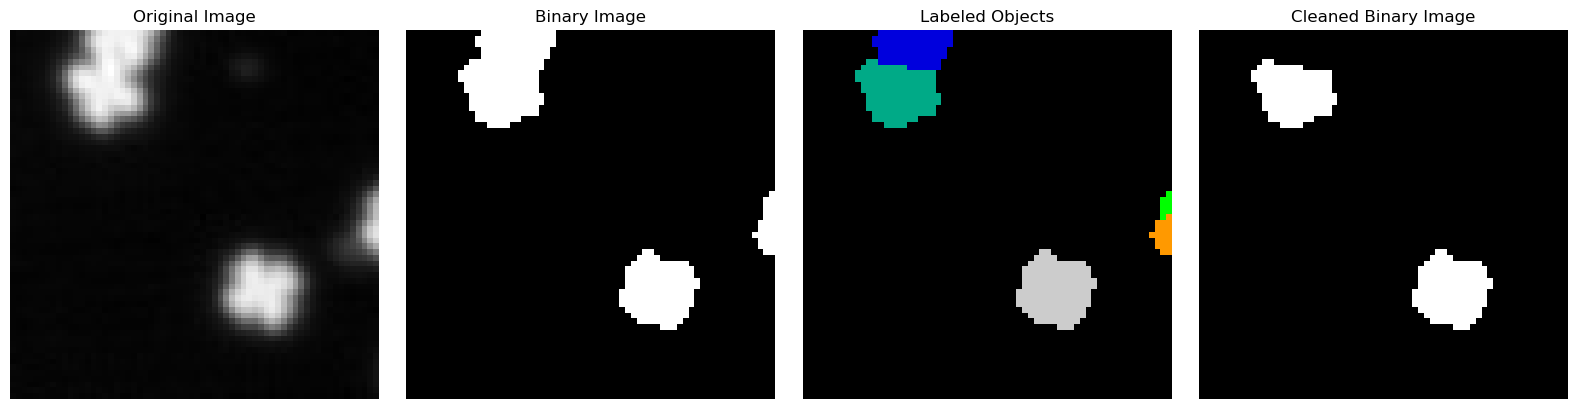

Number of molecules fully inside the FoV: 2


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage import io, color, filters
from skimage.segmentation import watershed
from skimage.feature import peak_local_max

# Read the image from the specified path
image_path = r"D:\exam\test\otsu.jpg"
image = io.imread(image_path)

# Convert the image to grayscale if it is RGB
if len(image.shape) == 3:
    image = color.rgb2gray(image)

# Apply Otsu's thresholding to convert the image to binary
threshold_value = filters.threshold_otsu(image)
binary_image = image > threshold_value

# Compute the distance transform
distance = ndi.distance_transform_edt(binary_image)

# Find local maxima as markers for the watershed algorithm
coords = peak_local_max(distance, footprint=np.ones((3, 3)), labels=binary_image)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)

# Apply the watershed algorithm
labels = watershed(-distance, markers, mask=binary_image)

# Identify labels that touch the edges of the image
rows, cols = labels.shape
edge_labels = np.unique(
    np.concatenate([
        labels[0, :],       # Top edge
        labels[-1, :],      # Bottom edge
        labels[:, 0],       # Left edge
        labels[:, -1]       # Right edge
    ])
)

# Create a mask for full molecules (exclude edge-touching labels)
full_molecule_mask = np.isin(labels, edge_labels, invert=True)

# Apply the mask to the labeled image
cleaned_labels = labels.copy()
cleaned_labels[~full_molecule_mask] = 0  # Set edge-touching regions to background

# Optionally, create a binary image with only full molecules
cleaned_binary_image = binary_image.copy()
cleaned_binary_image[~full_molecule_mask] = False

# Count the number of molecules fully inside the FoV
num_molecules_fov = len(np.unique(cleaned_labels)) - 1  # Subtract 1 for the background label

# Display results
fig, axes = plt.subplots(ncols=4, figsize=(16, 4), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original Image')

ax[1].imshow(binary_image, cmap=plt.cm.gray)
ax[1].set_title('Binary Image')

ax[2].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[2].set_title('Labeled Objects')

ax[3].imshow(cleaned_binary_image, cmap=plt.cm.gray)
ax[3].set_title('Cleaned Binary Image')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

# Print the number of molecules fully inside the FoV
print(f"Number of molecules fully inside the FoV: {num_molecules_fov}")

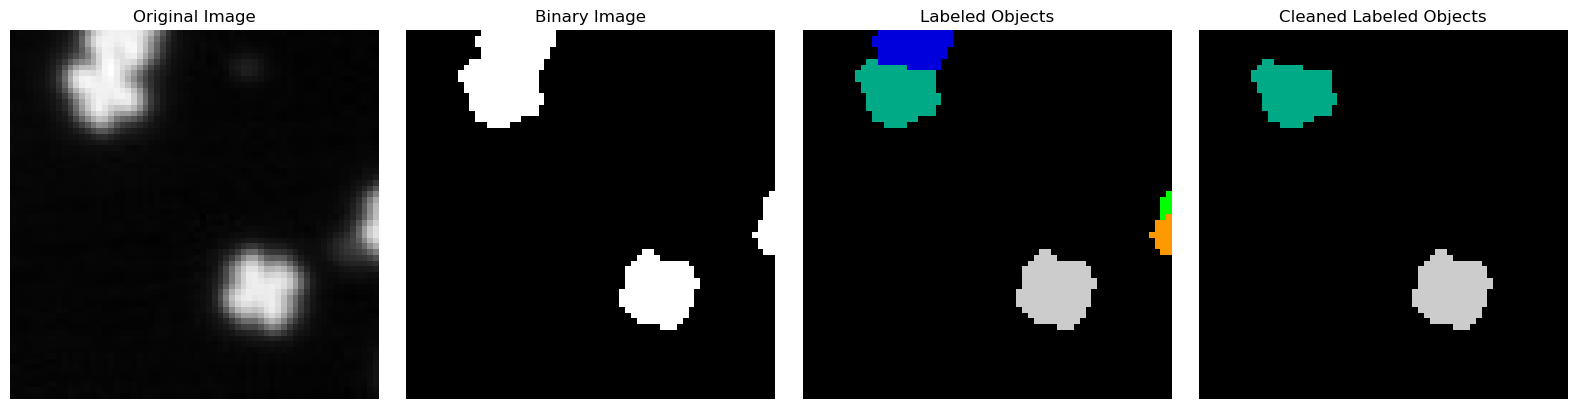

Number of molecules fully inside the FoV: 2


In [4]:
pip install pyod scikit-learn scikit-image matplotlib numpy

In [1]:
pip install pyod scikit-learn scikit-image matplotlib numpy

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyod: filename=pyod-2.0.4-py3-none-any.whl size=200598 sha256=c743e1e5f30257182b8d19a490c750b6f11369e52a95bc307fcf4e8dbd579b42
  Stored in directory: c:\users\matin\appdata\local\pip\cache\wheels\c1\f3\c3\67f847c010f2e3bb0515531e8f6ad3735eb1518c0f08165447
Successfully built pyod
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from scipy import ndimage as ndi
from pyod.models.ecod import ECOD  # انتخاب مدل ECOD از PyOD

In [3]:
# خواندن تصویر
image_path = r"D:\exam\test\otsu.jpg"
image = io.imread(image_path)

# تبدیل به تصویر سیاه‌وسفید (اگر لازم باشد)
if len(image.shape) == 3:
    image = color.rgb2gray(image)

# اعمال آستانه‌گذاری Otsu
threshold_value = filters.threshold_otsu(image)
binary_image = image > threshold_value

In [4]:
# تبدیل تصویر به ماتریس داده‌ها
rows, cols = binary_image.shape
X = np.column_stack(np.where(binary_image))  # مختصات نقاط سفید

# آموزش مدل ECOD
clf = ECOD()
clf.fit(X)

# دریافت امتیاز آنومالی
anomaly_scores = clf.decision_scores_
anomaly_labels = clf.labels_  # برچسب‌های آنومالی (0: نرمال، 1: آنومالی)

In [5]:
# محاسبه تبدیل فاصله
distance = ndi.distance_transform_edt(binary_image)

# پیدا کردن نقاط ماکزیمم محلی
coords = peak_local_max(distance, footprint=np.ones((3, 3)), labels=binary_image)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)

# اعمال الگوریتم آبشاری
labels = watershed(-distance, markers, mask=binary_image)

In [6]:
# ایجاد یک ماسک برای آنومالی‌ها
anomaly_mask = np.zeros_like(binary_image, dtype=bool)
anomaly_mask[X[anomaly_labels == 1][:, 0], X[anomaly_labels == 1][:, 1]] = True

# حذف آنومالی‌ها از بخش‌بندی آبشاری
cleaned_labels = labels.copy()
cleaned_labels[anomaly_mask] = 0

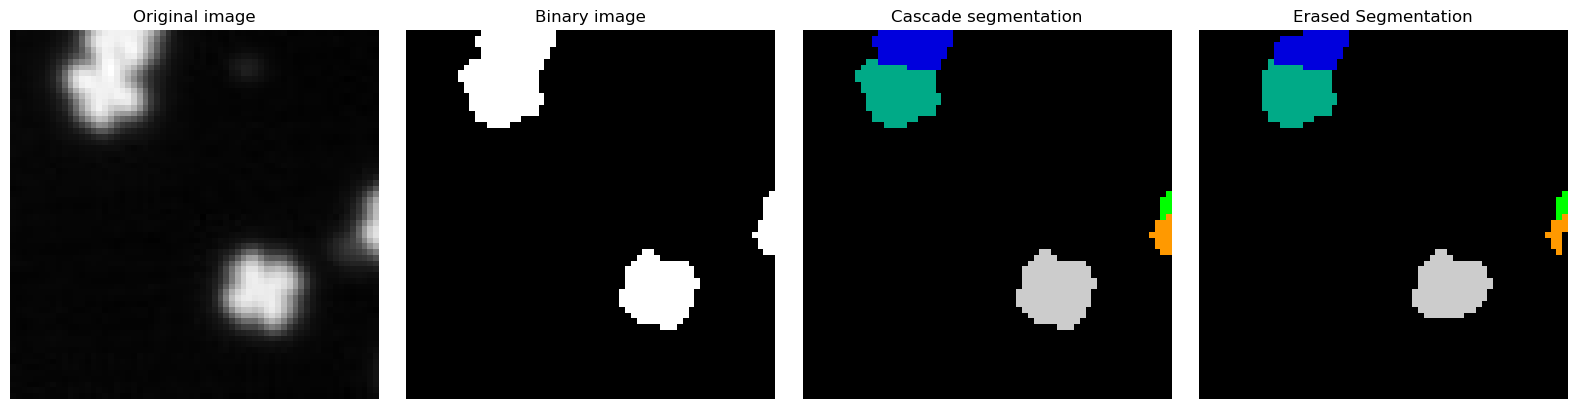

Number of molecules completely within the FoV: 5


In [9]:
# تعداد مولکول‌های داخل FoV
num_molecules_fov = len(np.unique(cleaned_labels)) - 1  # کم کردن برچسب پس‌زمینه

# نمایش تصاویر
fig, axes = plt.subplots(ncols=4, figsize=(16, 4), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(binary_image, cmap=plt.cm.gray)
ax[1].set_title('Binary image')

ax[2].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[2].set_title('Cascade segmentation')

ax[3].imshow(cleaned_labels, cmap=plt.cm.nipy_spectral)
ax[3].set_title('Erased Segmentation')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

# چاپ تعداد مولکول‌ها
print(f"Number of molecules completely within the FoV: {num_molecules_fov}")

In [10]:
import os
import sys
import warnings
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from scipy import ndimage as ndi
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.ecod import ECOD

In [11]:
# خواندن تصویر
image_path = r"D:\exam\test\otsu.jpg"
image = io.imread(image_path)

# تبدیل به تصویر سیاه‌وسفید
if len(image.shape) == 3:
    image = color.rgb2gray(image)

# اعمال آستانه‌گذاری Otsu
threshold_value = filters.threshold_otsu(image)
binary_image = image > threshold_value

# تبدیل تصویر به ماتریس داده‌ها
rows, cols = binary_image.shape
X = np.column_stack(np.where(binary_image))  # مختصات نقاط سفید

In [24]:
# تعریف مدل‌های مختلف PyOD
classifiers = {
    'Angle-based Outlier Detector (ABOD)': ABOD(contamination=0.1),
    'K Nearest Neighbors (KNN)': KNN(contamination=0.1),
    'Local Outlier Factor (LOF)': LOF(contamination=0.1),
    'Isolation Forest': IForest(contamination=0.1, random_state=42),
    'Cluster-based Local Outlier Factor (CBLOF)': CBLOF(contamination=0.1, random_state=42),
    'ECOD': ECOD(contamination=0.1),
}

In [25]:
# تعریف مدل‌های مختلف PyOD
classifiers = {
    'Angle-based Outlier Detector (ABOD)': ABOD(contamination=0.1),
    'K Nearest Neighbors (KNN)': KNN(contamination=0.1),
    'Local Outlier Factor (LOF)': LOF(contamination=0.1),
    'Isolation Forest': IForest(contamination=0.1, random_state=42),
    'Cluster-based Local Outlier Factor (CBLOF)': CBLOF(contamination=0.1, random_state=42),
    'ECOD': ECOD(contamination=0.1),
}

# ذخیره نتایج هر مدل
results = {}

# اطمینان از اینکه داده‌ها به فرمت مناسب هستند
X = X.astype(np.float32)  # تبدیل داده‌ها به float32 برای جلوگیری از خطا

for clf_name, clf in classifiers.items():
    print(f"Fitting {clf_name}...")
    
    try:
        # آموزش مدل
        clf.fit(X)
        
        # دریافت امتیاز آنومالی
        anomaly_scores = clf.decision_scores_
        anomaly_labels = clf.labels_  # برچسب‌های آنومالی (0: نرمال، 1: آنومالی)
        
        # ایجاد یک ماسک برای آنومالی‌ها
        anomaly_mask = np.zeros_like(binary_image, dtype=bool)
        anomaly_mask[X[anomaly_labels == 1][:, 0], X[anomaly_labels == 1][:, 1]] = True
        
        # ذخیره نتایج
        results[clf_name] = anomaly_mask
    
    except Exception as e:
        print(f"Error fitting {clf_name}: {e}")
        results[clf_name] = None  # اگر مدل با خطا مواجه شد، نتیجه را None قرار دهید

Fitting Angle-based Outlier Detector (ABOD)...
Error fitting Angle-based Outlier Detector (ABOD): arrays used as indices must be of integer (or boolean) type
Fitting K Nearest Neighbors (KNN)...
Error fitting K Nearest Neighbors (KNN): arrays used as indices must be of integer (or boolean) type
Fitting Local Outlier Factor (LOF)...
Error fitting Local Outlier Factor (LOF): arrays used as indices must be of integer (or boolean) type
Fitting Isolation Forest...
Error fitting Isolation Forest: arrays used as indices must be of integer (or boolean) type
Fitting Cluster-based Local Outlier Factor (CBLOF)...
Error fitting Cluster-based Local Outlier Factor (CBLOF): arrays used as indices must be of integer (or boolean) type
Fitting ECOD...
Error fitting ECOD: arrays used as indices must be of integer (or boolean) type


C:\Users\Matin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [29]:
# تنظیم متغیر محیطی برای جلوگیری از هشدار KMeans
import os
os.environ["OMP_NUM_THREADS"] = "2"

# تعریف مدل‌های مختلف PyOD
classifiers = {
    'Angle-based Outlier Detector (ABOD)': ABOD(contamination=0.1),
    'K Nearest Neighbors (KNN)': KNN(contamination=0.1),
    'Local Outlier Factor (LOF)': LOF(contamination=0.1),
    'Isolation Forest': IForest(contamination=0.1, random_state=42),
    'Cluster-based Local Outlier Factor (CBLOF)': CBLOF(contamination=0.1, random_state=42),
    'ECOD': ECOD(contamination=0.1),
}

# ذخیره نتایج هر مدل
results = {}

# اطمینان از اینکه داده‌ها به فرمت مناسب هستند
X = X.astype(np.float32)  # تبدیل داده‌ها به float32
rows, cols = binary_image.shape
X_indices = np.column_stack(np.where(binary_image)).astype(np.int32)  # تبدیل اندیس‌ها به int32

for clf_name, clf in classifiers.items():
    print(f"Fitting {clf_name}...")
    
    try:
        # آموزش مدل
        clf.fit(X)
        
        # دریافت امتیاز آنومالی
        anomaly_scores = clf.decision_scores_
        anomaly_labels = clf.labels_  # برچسب‌های آنومالی (0: نرمال، 1: آنومالی)
        
        # ایجاد یک ماسک برای آنومالی‌ها
        anomaly_mask = np.zeros_like(binary_image, dtype=bool)
        anomaly_mask[X_indices[anomaly_labels == 1][:, 0], X_indices[anomaly_labels == 1][:, 1]] = True
        
        # ذخیره نتایج
        results[clf_name] = anomaly_mask
    
    except Exception as e:
        print(f"Error fitting {clf_name}: {e}")
        results[clf_name] = None  # اگر مدل با خطا مواجه شد، نتیجه را None قرار دهید

Fitting Angle-based Outlier Detector (ABOD)...
Fitting K Nearest Neighbors (KNN)...
Fitting Local Outlier Factor (LOF)...
Fitting Isolation Forest...
Fitting Cluster-based Local Outlier Factor (CBLOF)...
Fitting ECOD...


C:\Users\Matin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


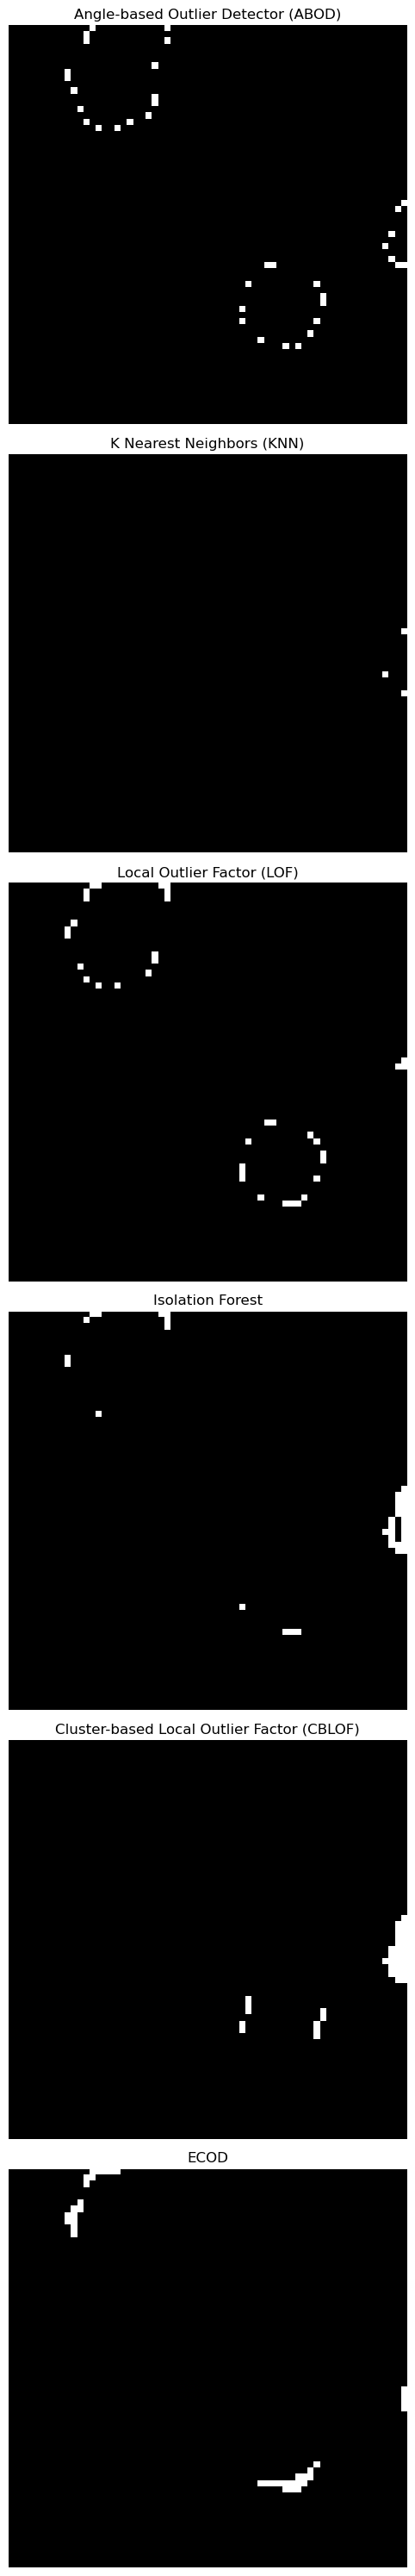

In [30]:
# نمایش نتایج برای هر مدل
num_classifiers = len([clf for clf, mask in results.items() if mask is not None])
fig, axes = plt.subplots(nrows=num_classifiers, figsize=(10, 5 * num_classifiers))

# اطمینان از اینکه axes یک آرایه باشد
if num_classifiers == 1:
    axes = [axes]  # تبدیل axes به یک لیست تک‌عضوی اگر فقط یک مدل وجود داشته باشد
else:
    axes = axes.ravel()  # تبدیل axes به یک آرایه تخت

# نمایش نتایج هر مدل
for ax, (clf_name, anomaly_mask) in zip(axes, results.items()):
    if anomaly_mask is not None:
        ax.imshow(anomaly_mask, cmap=plt.cm.gray)
        ax.set_title(clf_name)
        ax.axis('off')

plt.tight_layout()
plt.show()

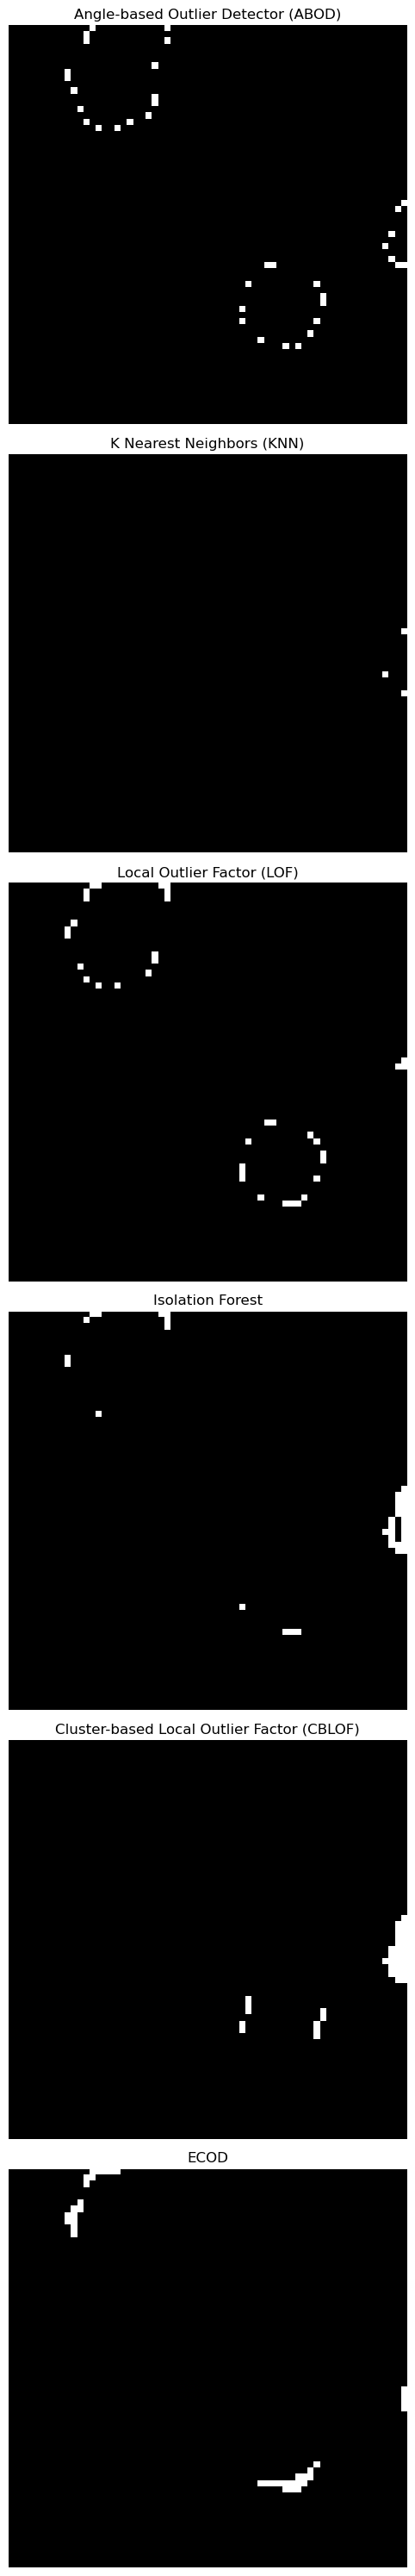

In [31]:
# نمایش نتایج برای هر مدل
num_classifiers = len(classifiers)
fig, axes = plt.subplots(nrows=num_classifiers, figsize=(10, 5 * num_classifiers))

# اطمینان از اینکه axes یک آرایه باشد
if num_classifiers == 1:
    axes = [axes]  # تبدیل axes به یک لیست تک‌عضوی اگر فقط یک مدل وجود داشته باشد
else:
    axes = axes.ravel()  # تبدیل axes به یک آرایه تخت

# نمایش نتایج هر مدل
for ax, (clf_name, anomaly_mask) in zip(axes, results.items()):
    ax.imshow(anomaly_mask, cmap=plt.cm.gray)
    ax.set_title(clf_name)
    ax.axis('off')

plt.tight_layout()
plt.show()

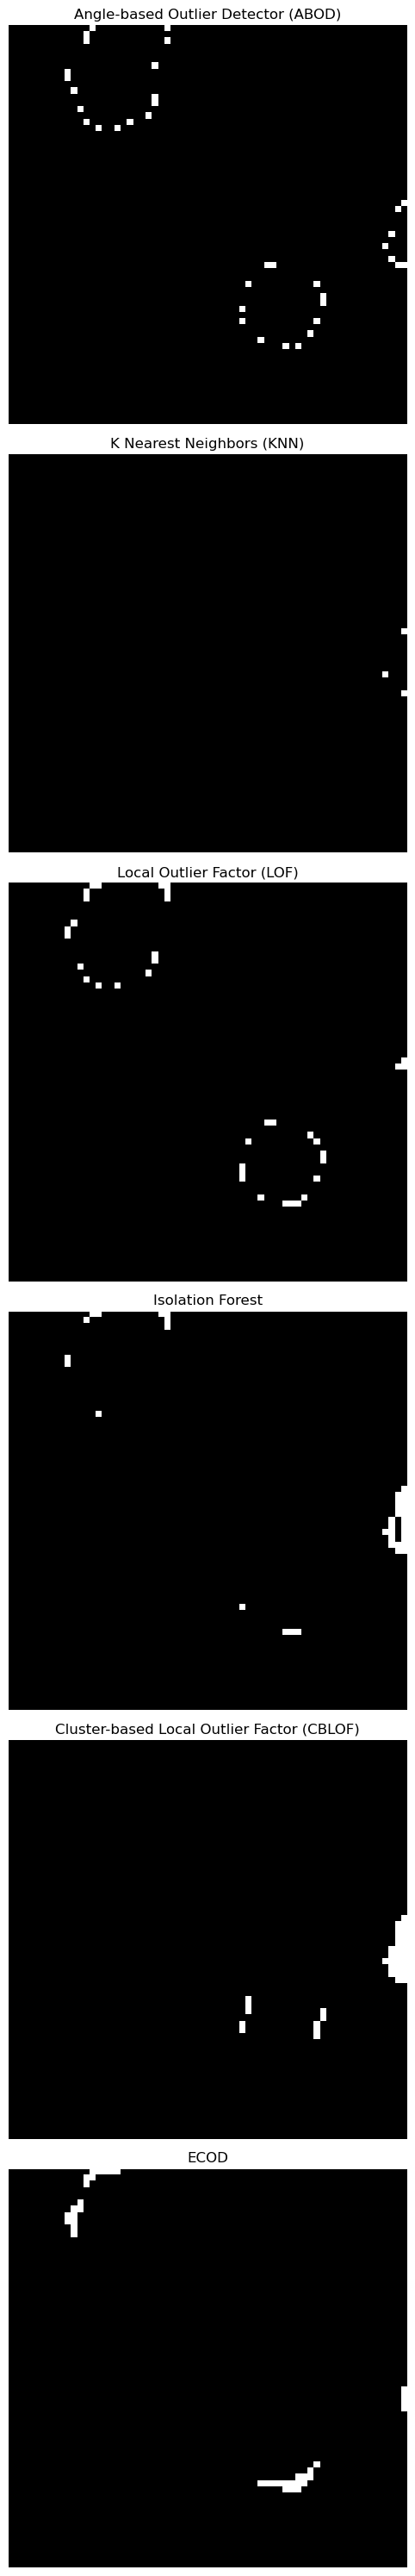

In [32]:
# نمایش نتایج برای هر مدل
fig, axes = plt.subplots(nrows=len(classifiers), figsize=(10, 5 * len(classifiers)))
axes = np.array(axes).reshape(-1)  # اطمینان از اینکه axes یک آرایه باشد

for ax, (clf_name, anomaly_mask) in zip(axes, results.items()):
    ax.imshow(anomaly_mask, cmap=plt.cm.gray)
    ax.set_title(clf_name)
    ax.axis('off')

plt.tight_layout()
plt.show()

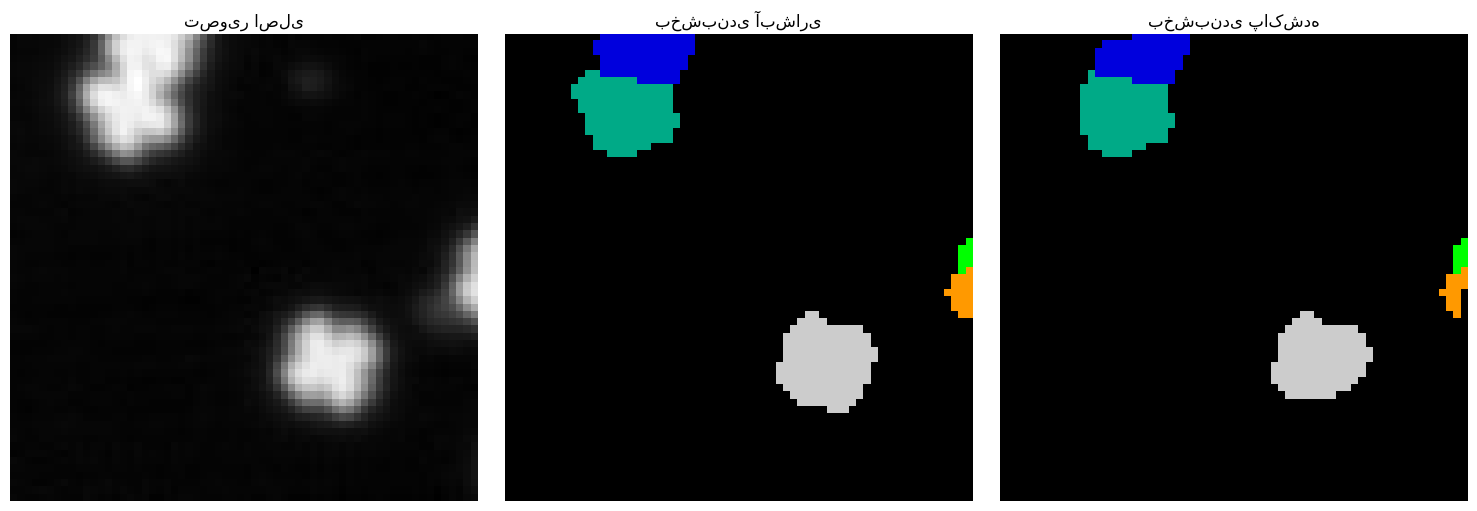

In [33]:
# محاسبه تبدیل فاصله
distance = ndi.distance_transform_edt(binary_image)

# پیدا کردن نقاط ماکزیمم محلی
coords = peak_local_max(distance, footprint=np.ones((3, 3)), labels=binary_image)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)

# اعمال الگوریتم آبشاری
labels = watershed(-distance, markers, mask=binary_image)

# حذف آنومالی‌ها از بخش‌بندی آبشاری (با استفاده از نتایج ECOD)
cleaned_labels = labels.copy()
ecod_anomaly_mask = results['ECOD']
cleaned_labels[ecod_anomaly_mask] = 0

# نمایش نتایج نهایی
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('تصویر اصلی')

ax[1].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[1].set_title('بخش‌بندی آبشاری')

ax[2].imshow(cleaned_labels, cmap=plt.cm.nipy_spectral)
ax[2].set_title('بخش‌بندی پاک‌شده')

for a in ax:
    a.set_axis_off()

plt.tight_layout()
plt.show()

number of label 2


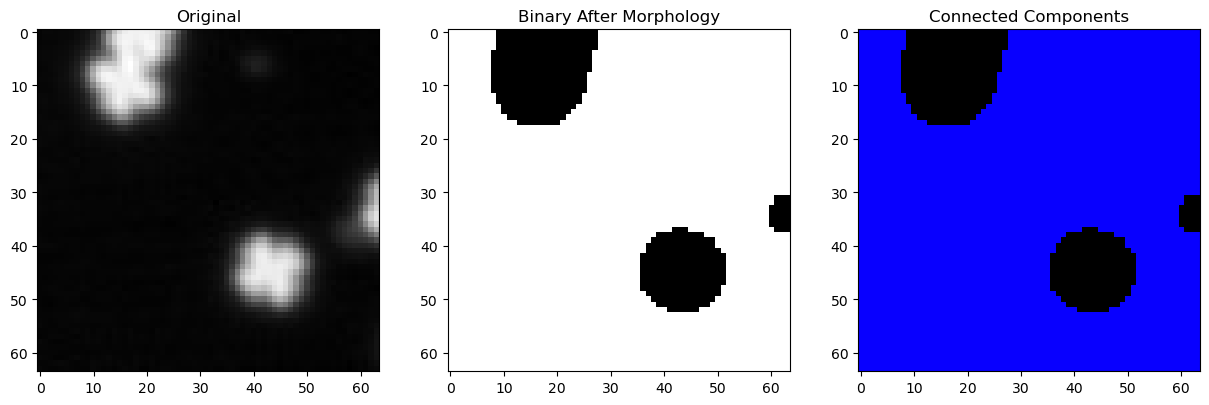

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# خواندن تصویر
image = cv2.imread(r'D:\exam\test\otsu.jpg', 0)

# فیلتر Gaussian برای حذف نویز
blurred = cv2.GaussianBlur(image, (25, 25), 0)

# آستانه‌گذاری خودکار (Otsu) + معکوس کردن
_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# اعمال عملیات morphological opening برای حذف نویزهای کوچک
kernel = np.ones((5,5), np.uint8)
opened = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

# شمارش مؤلفه‌های متصل
num_labels, labels = cv2.connectedComponents(opened)

print("number of components that identified:", num_labels )

# نمایش رنگی مؤلفه‌ها
label_hue = np.uint8(179 * labels / np.max(labels))
blank = 255 * np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank, blank])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue == 0] = 0

# نمایش نتایج
plt.figure(figsize=(15, 6))
plt.subplot(131); plt.imshow(image, cmap='gray'); plt.title("Original")
plt.subplot(132); plt.imshow(opened, cmap='gray'); plt.title("Binary After Morphology")
plt.subplot(133); plt.imshow(labeled_img); plt.title("Connected Components")
plt.show()


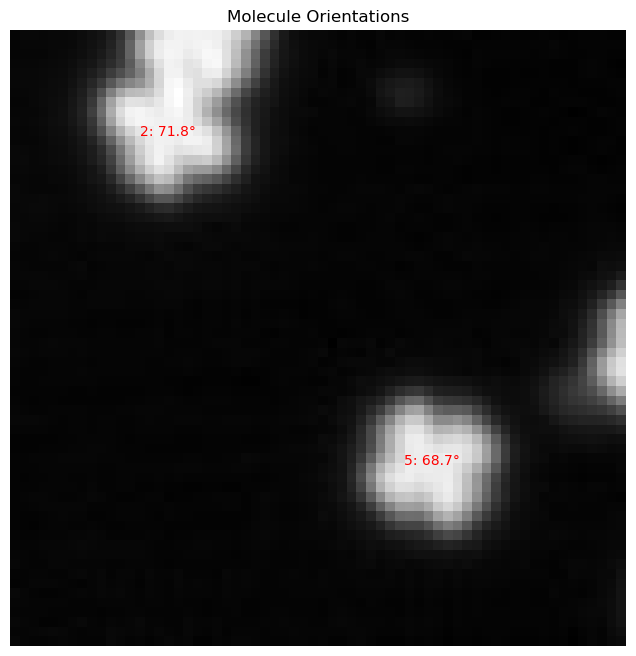

Molecule Orientations:
Molecule 2: 71.8 degrees
Molecule 5: 68.7 degrees


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage import io, color, filters, measure
from skimage.segmentation import watershed
from skimage.feature import peak_local_max

# Step 1: Read the image
image_path = r"D:\exam\test\otsu.jpg"
image = io.imread(image_path)

# Convert to grayscale if necessary
if len(image.shape) == 3:
    image = color.rgb2gray(image)

# Step 2: Apply Otsu's thresholding to create a binary image
threshold_value = filters.threshold_otsu(image)
binary_image = image > threshold_value

# Step 3: Compute the distance transform and find local maxima
distance = ndi.distance_transform_edt(binary_image)
coords = peak_local_max(distance, footprint=np.ones((3, 3)), labels=binary_image)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)

# Step 4: Apply the watershed algorithm
labels = watershed(-distance, markers, mask=binary_image)

# Step 5: Identify edge-touching labels
rows, cols = labels.shape
edge_labels = np.unique(
    np.concatenate([
        labels[0, :],       # Top edge
        labels[-1, :],      # Bottom edge
        labels[:, 0],       # Left edge
        labels[:, -1]       # Right edge
    ])
)

# Step 6: Exclude edge-touching labels
full_molecule_mask = np.isin(labels, edge_labels, invert=True)
cleaned_labels = labels.copy()
cleaned_labels[~full_molecule_mask] = 0  # Set edge-touching regions to background

# Step 7: Compute properties of fully inside molecules
regions = measure.regionprops(cleaned_labels)

# Step 8: Estimate orientation angles
molecule_orientations = []
for region in regions:
    if region.label == 0:  # Skip background
        continue
    # Get the orientation angle from region properties
    orientation_angle = np.degrees(region.orientation)
    # Normalize the angle to [0, 89] degrees
    normalized_angle = np.abs(orientation_angle) % 90
    molecule_orientations.append((region.label, normalized_angle))

# Step 9: Visualize the results
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image, cmap=plt.cm.gray)
ax.set_title('Molecule Orientations')

# Overlay labels and orientation angles
for label, angle in molecule_orientations:
    region = next(r for r in regions if r.label == label)
    y0, x0 = region.centroid  # Centroid of the molecule
    ax.text(x0, y0, f"{label}: {angle:.1f}°", color="red", fontsize=10, ha="center")

plt.axis('off')
plt.show()

# Step 10: Print the orientations
print("Molecule Orientations:")
for label, angle in molecule_orientations:
    print(f"Molecule {label}: {angle:.1f} degrees")

In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt

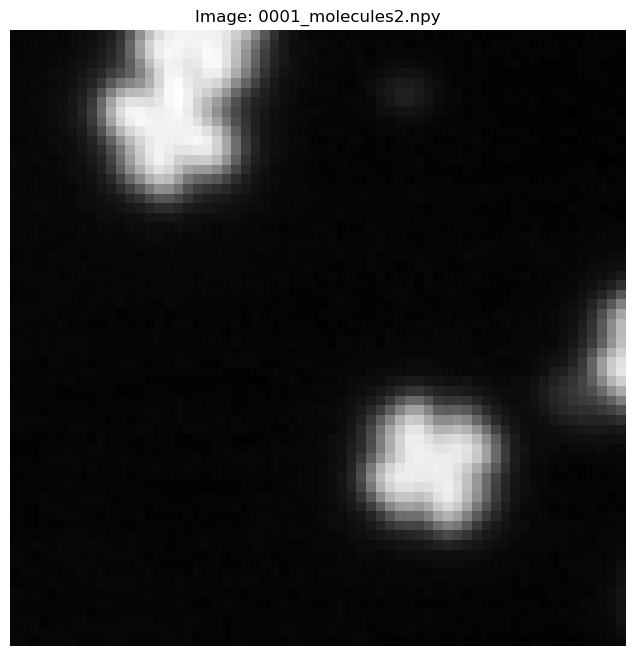


Labeling molecules for image: 0001_molecules2.npy


Enter the number of fully visible molecules:  2


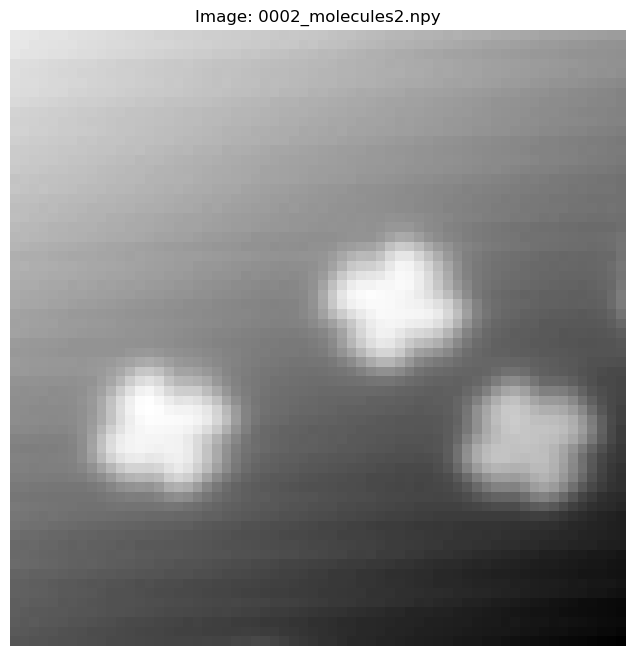


Labeling molecules for image: 0002_molecules2.npy


Enter the number of fully visible molecules:  3


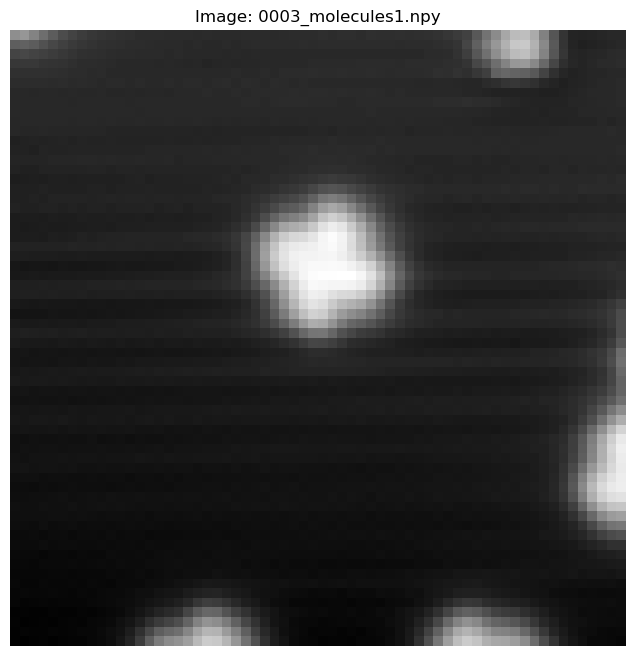


Labeling molecules for image: 0003_molecules1.npy


Enter the number of fully visible molecules:  1


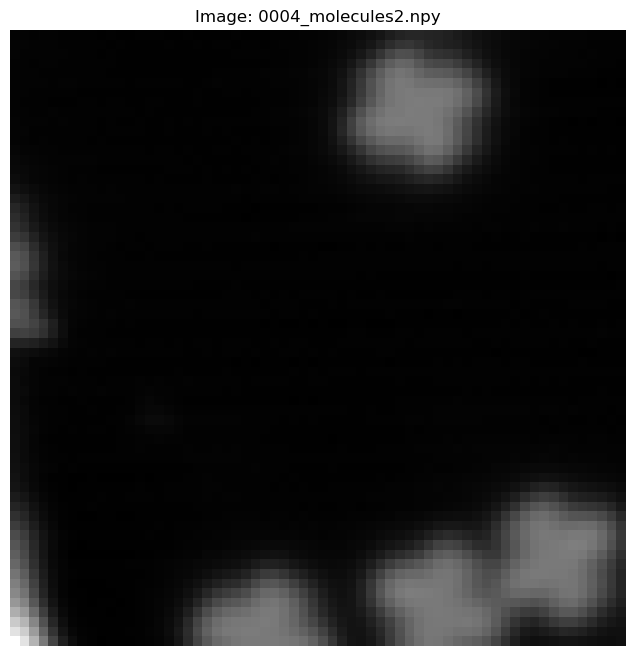


Labeling molecules for image: 0004_molecules2.npy


Enter the number of fully visible molecules:  2


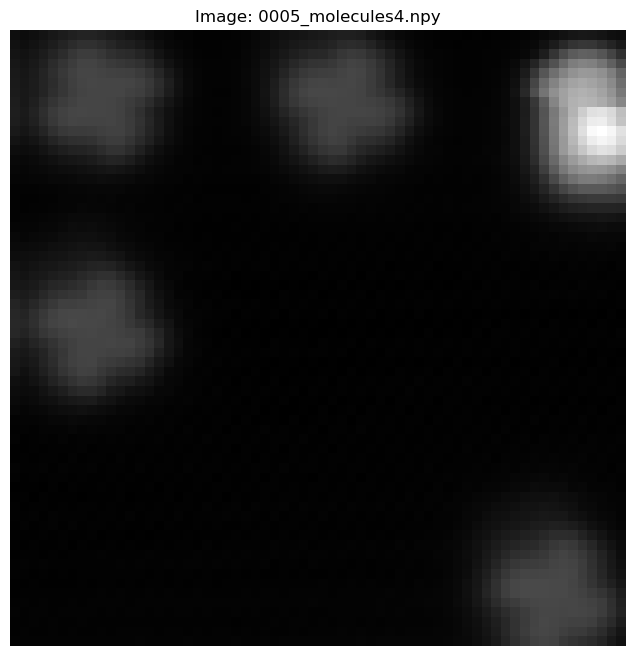


Labeling molecules for image: 0005_molecules4.npy


Enter the number of fully visible molecules:  3


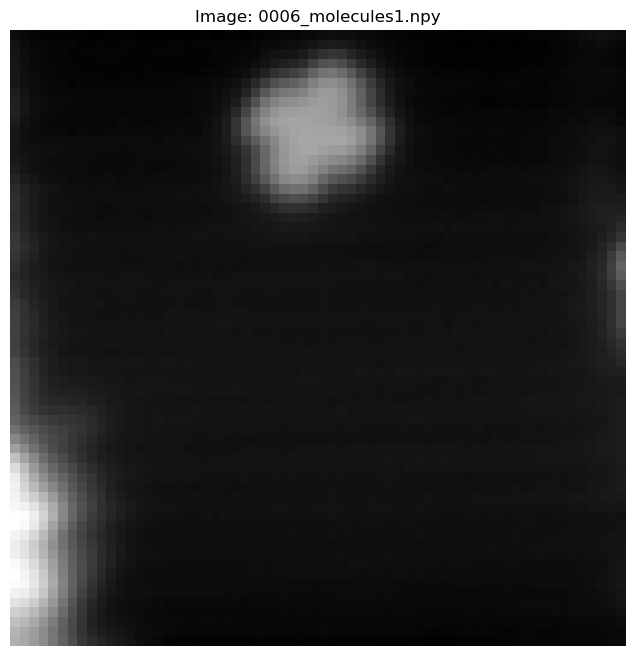


Labeling molecules for image: 0006_molecules1.npy


Enter the number of fully visible molecules:  1


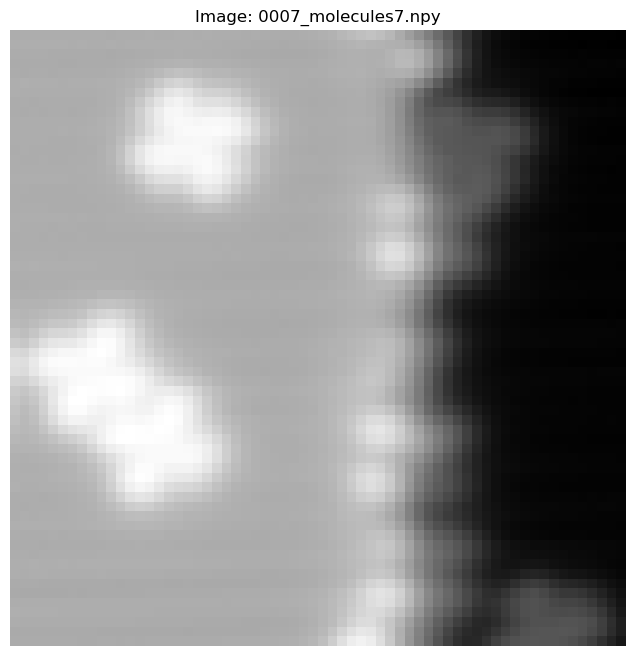


Labeling molecules for image: 0007_molecules7.npy


Enter the number of fully visible molecules:  7


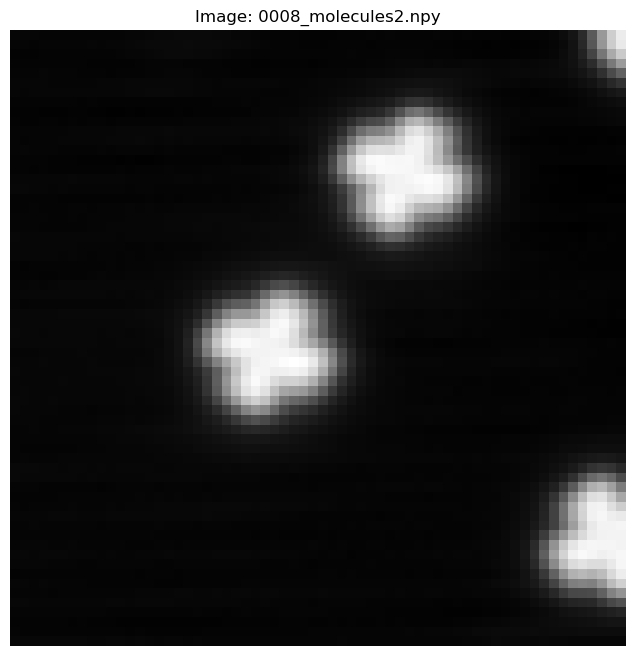


Labeling molecules for image: 0008_molecules2.npy


Enter the number of fully visible molecules:  2


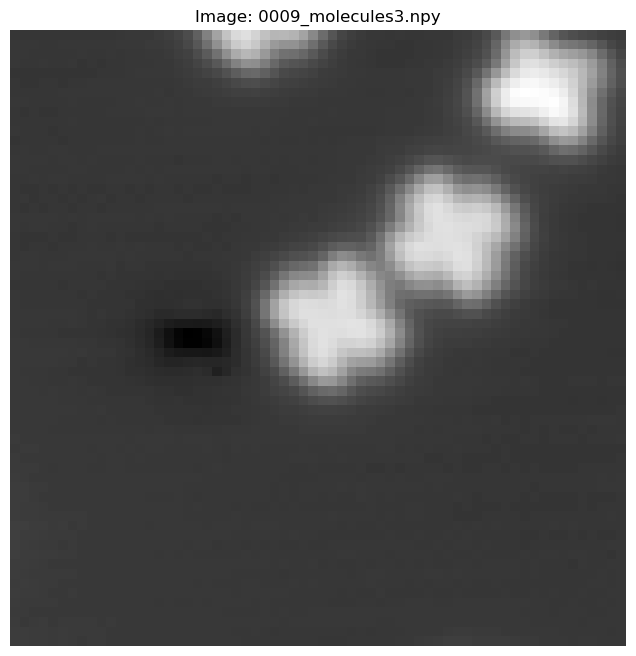


Labeling molecules for image: 0009_molecules3.npy


Enter the number of fully visible molecules:  3


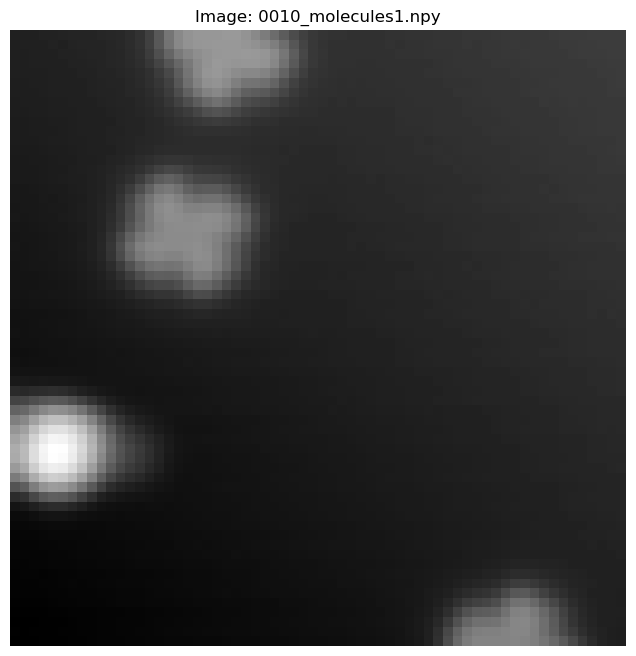


Labeling molecules for image: 0010_molecules1.npy


Enter the number of fully visible molecules:  1


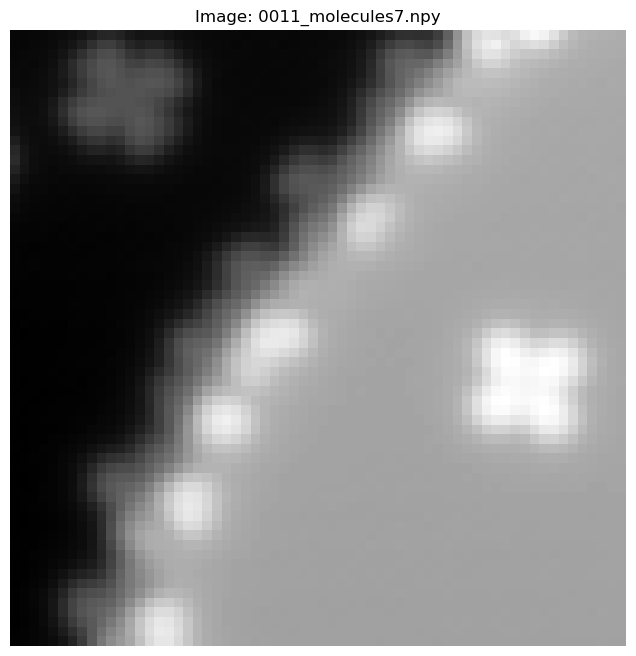


Labeling molecules for image: 0011_molecules7.npy


Enter the number of fully visible molecules:  7


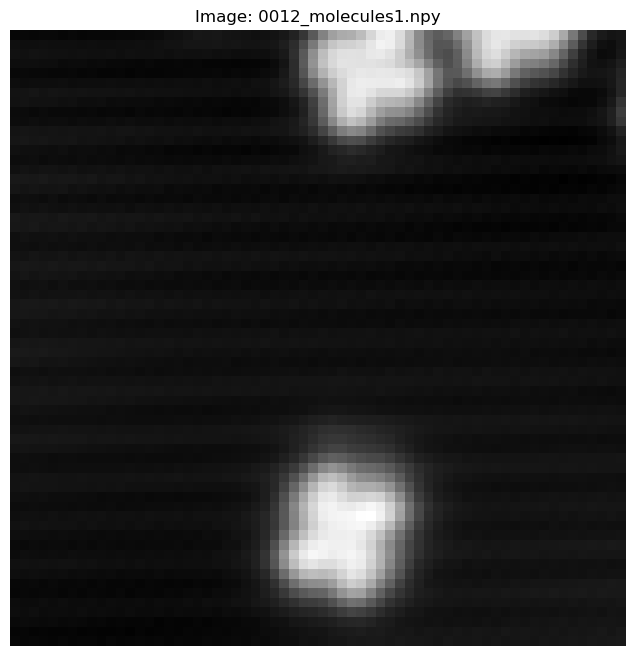


Labeling molecules for image: 0012_molecules1.npy


Enter the number of fully visible molecules:  1


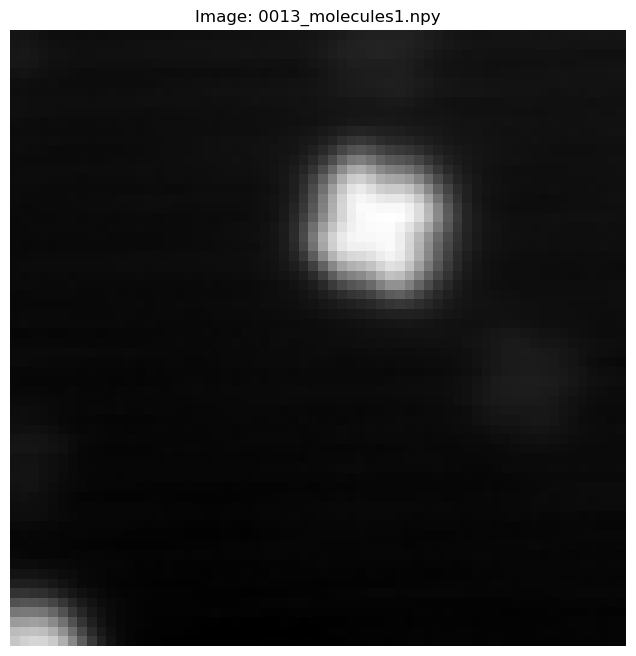


Labeling molecules for image: 0013_molecules1.npy


Enter the number of fully visible molecules:  1


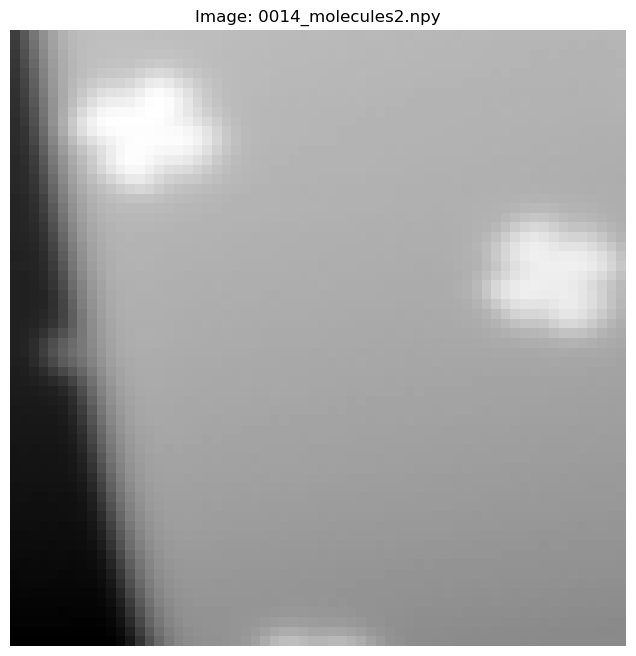


Labeling molecules for image: 0014_molecules2.npy


Enter the number of fully visible molecules:  2


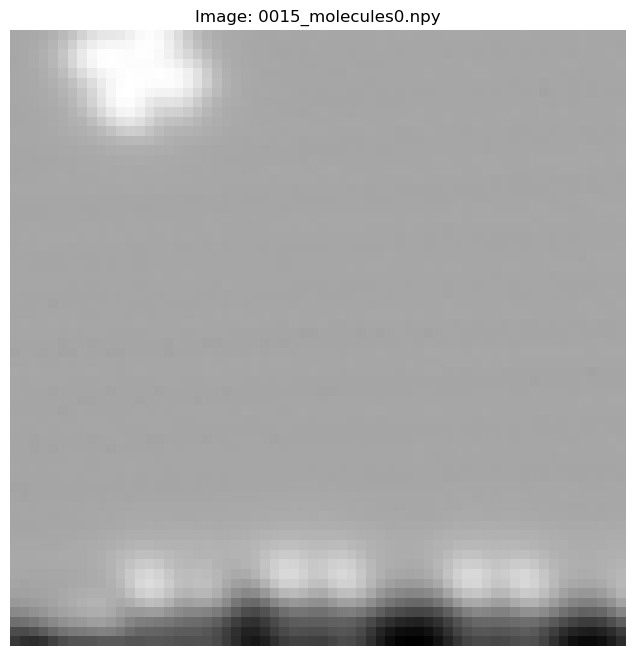


Labeling molecules for image: 0015_molecules0.npy


Enter the number of fully visible molecules:  0


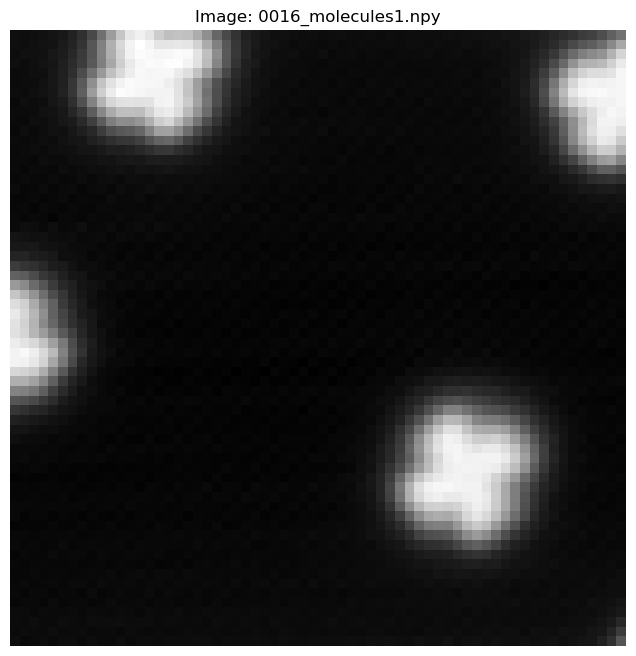


Labeling molecules for image: 0016_molecules1.npy


Enter the number of fully visible molecules:  1


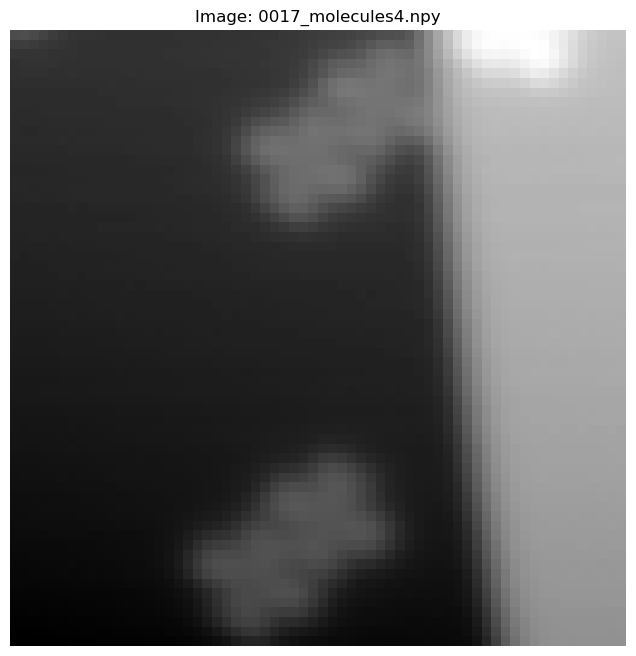


Labeling molecules for image: 0017_molecules4.npy


Enter the number of fully visible molecules:  4


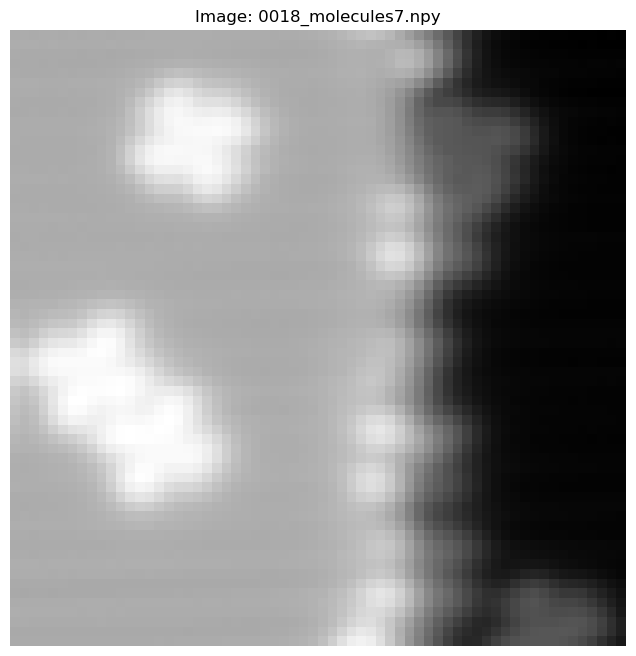


Labeling molecules for image: 0018_molecules7.npy


Enter the number of fully visible molecules:  7


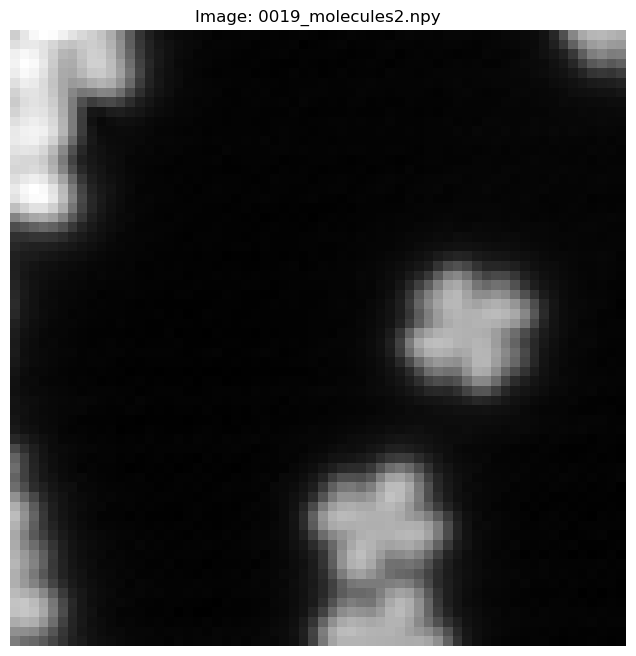


Labeling molecules for image: 0019_molecules2.npy


Enter the number of fully visible molecules:  2


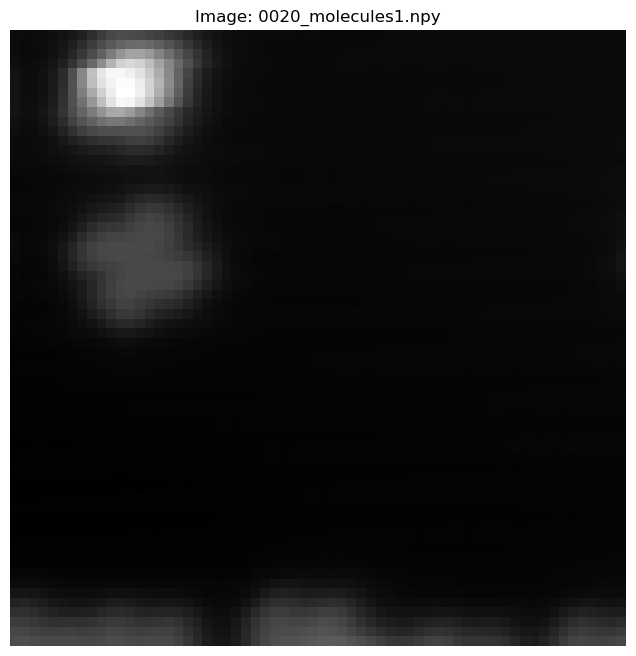


Labeling molecules for image: 0020_molecules1.npy


Enter the number of fully visible molecules:  1


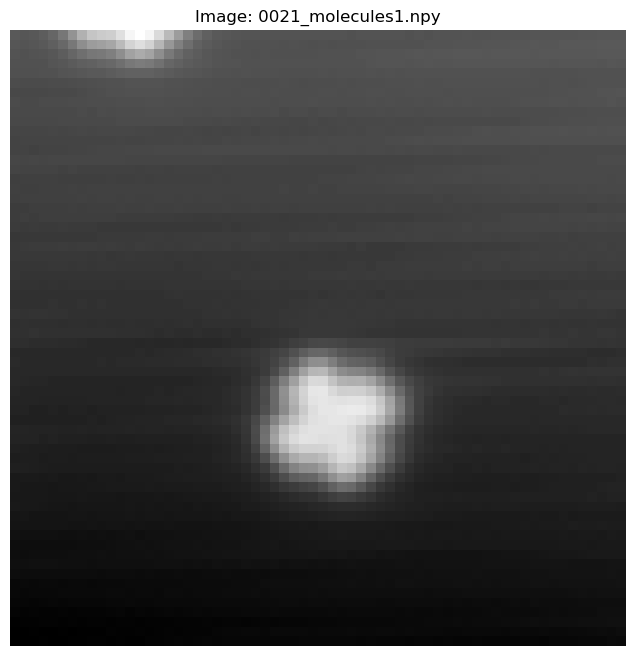


Labeling molecules for image: 0021_molecules1.npy


Enter the number of fully visible molecules:  1


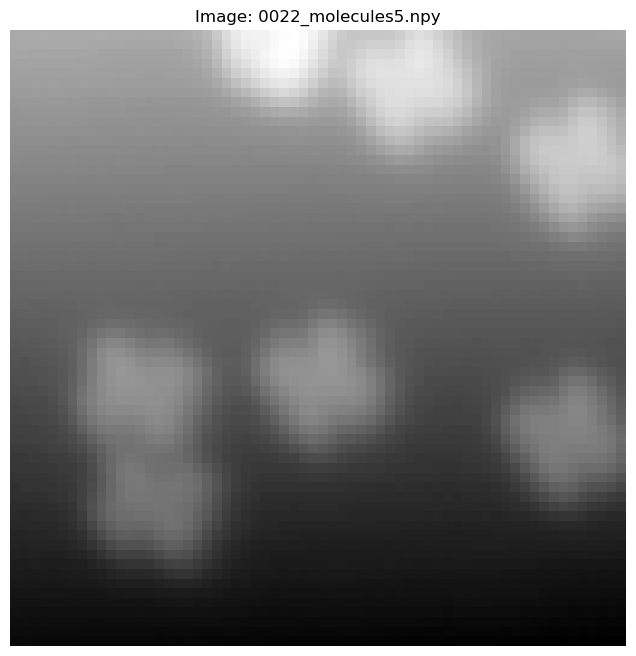


Labeling molecules for image: 0022_molecules5.npy


Enter the number of fully visible molecules:  5


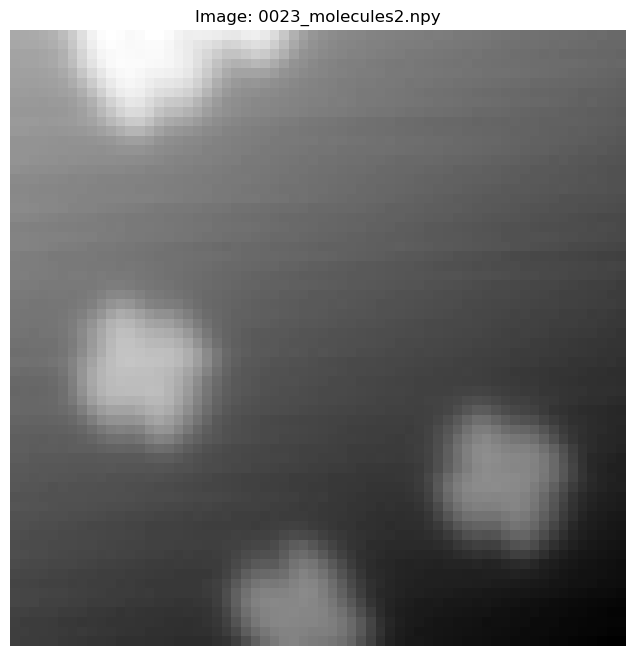


Labeling molecules for image: 0023_molecules2.npy


Enter the number of fully visible molecules:  2


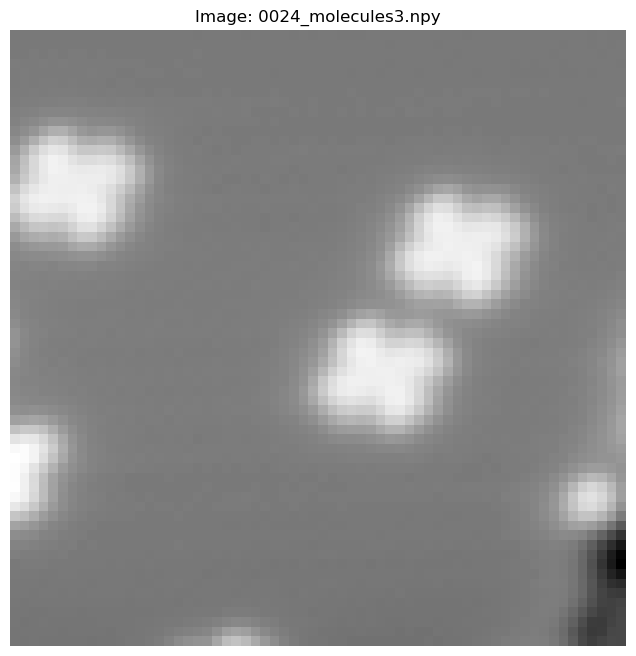


Labeling molecules for image: 0024_molecules3.npy


Enter the number of fully visible molecules:  3


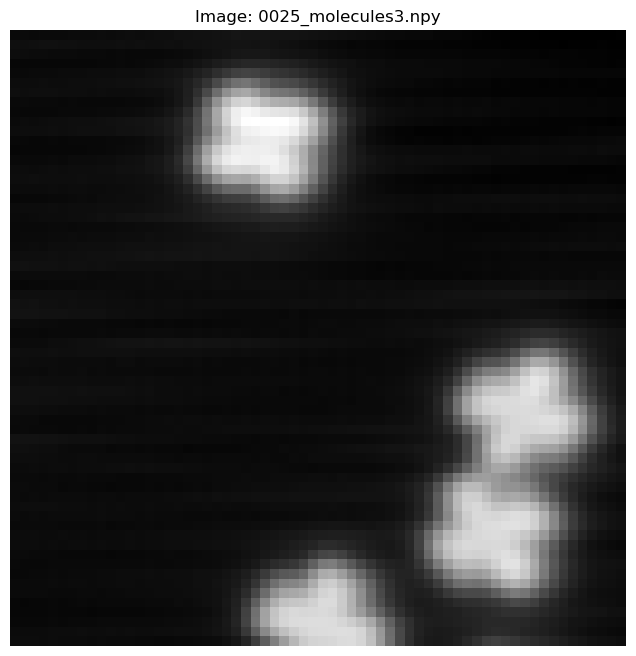


Labeling molecules for image: 0025_molecules3.npy


Enter the number of fully visible molecules:  3


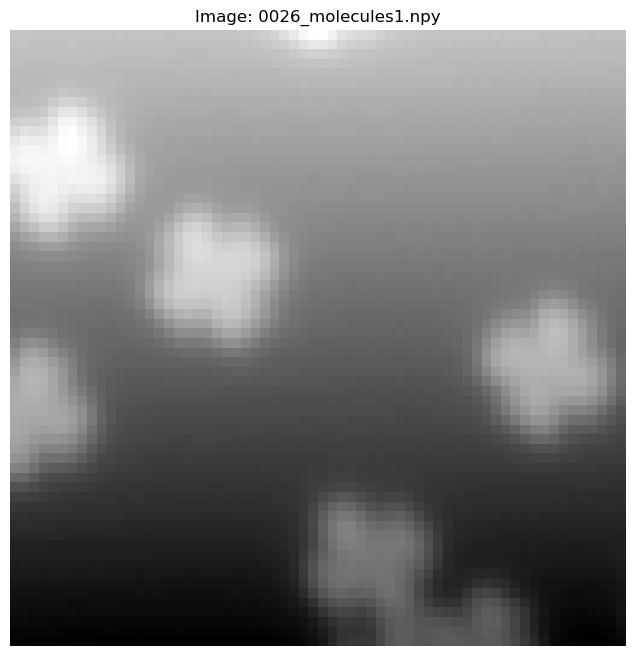


Labeling molecules for image: 0026_molecules1.npy


Enter the number of fully visible molecules:  1


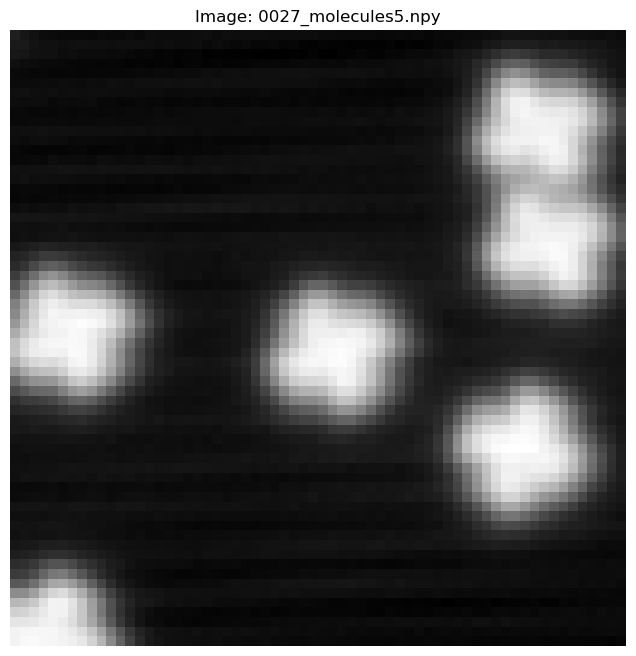


Labeling molecules for image: 0027_molecules5.npy


Enter the number of fully visible molecules:  5


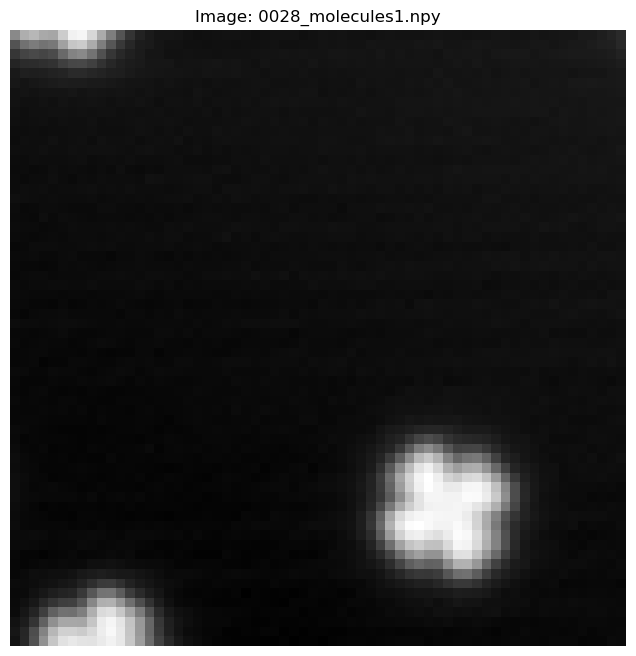


Labeling molecules for image: 0028_molecules1.npy


Enter the number of fully visible molecules:  1


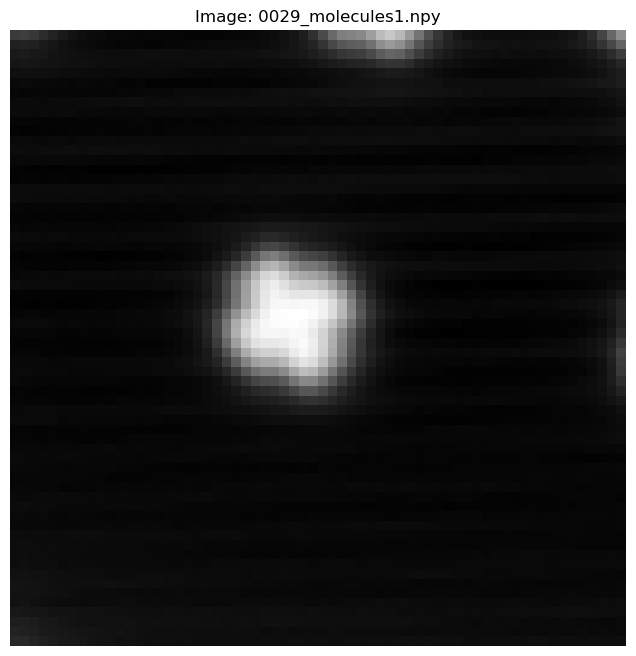


Labeling molecules for image: 0029_molecules1.npy


Enter the number of fully visible molecules:  1


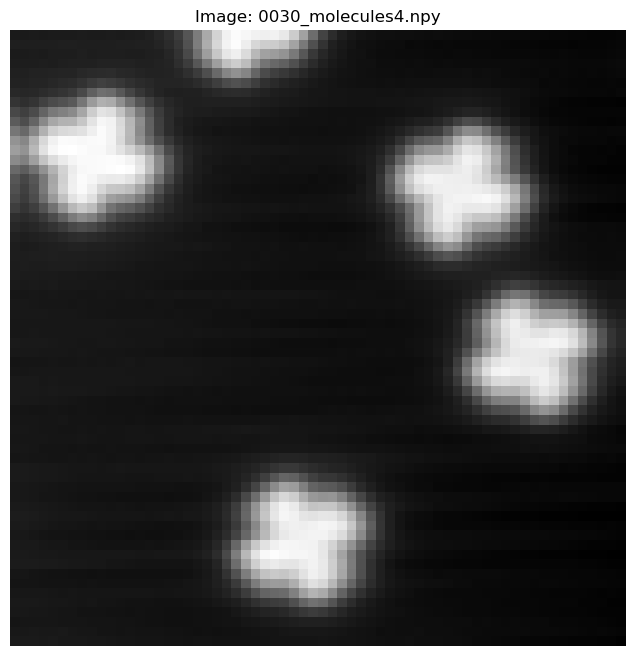


Labeling molecules for image: 0030_molecules4.npy


Enter the number of fully visible molecules:  4


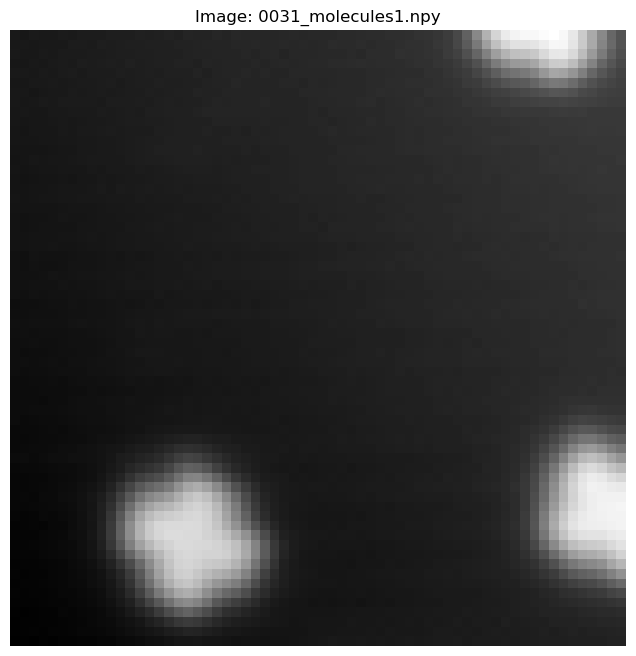


Labeling molecules for image: 0031_molecules1.npy


Enter the number of fully visible molecules:  1


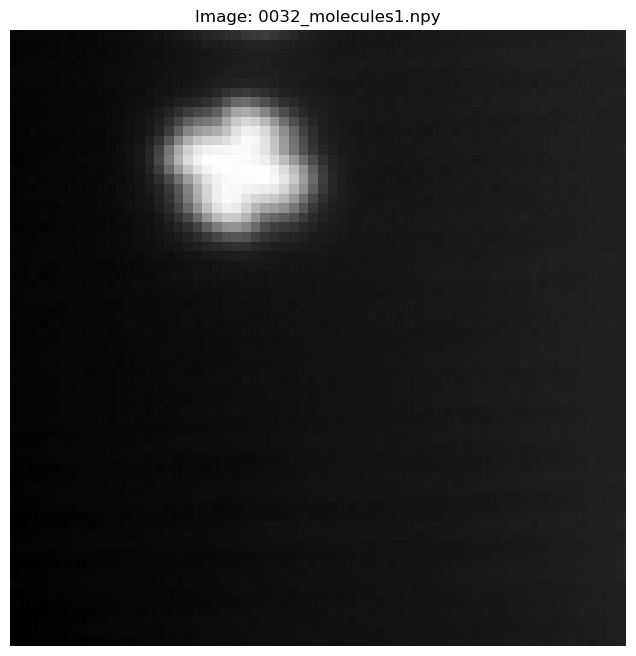


Labeling molecules for image: 0032_molecules1.npy


Enter the number of fully visible molecules:  1


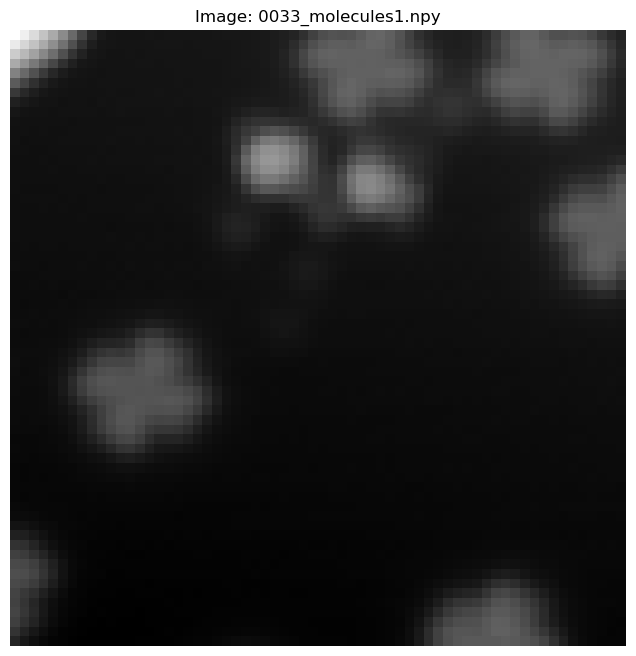


Labeling molecules for image: 0033_molecules1.npy


Enter the number of fully visible molecules:  1


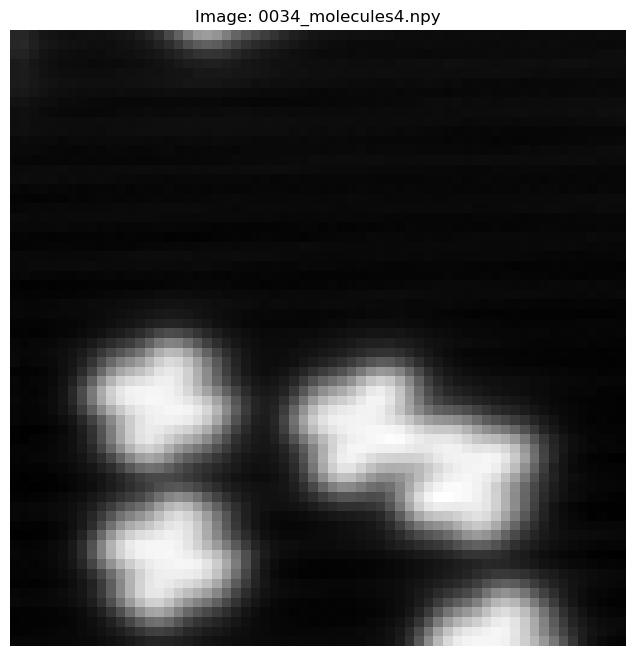


Labeling molecules for image: 0034_molecules4.npy


Enter the number of fully visible molecules:  4


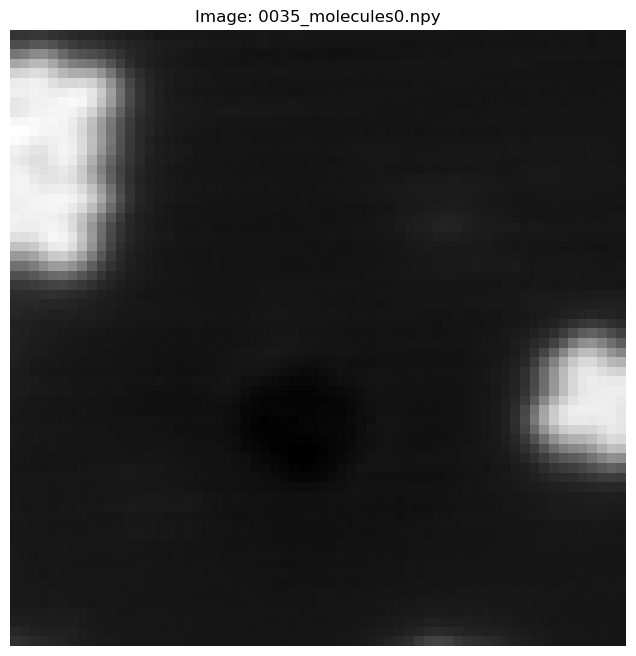


Labeling molecules for image: 0035_molecules0.npy


Enter the number of fully visible molecules:  0


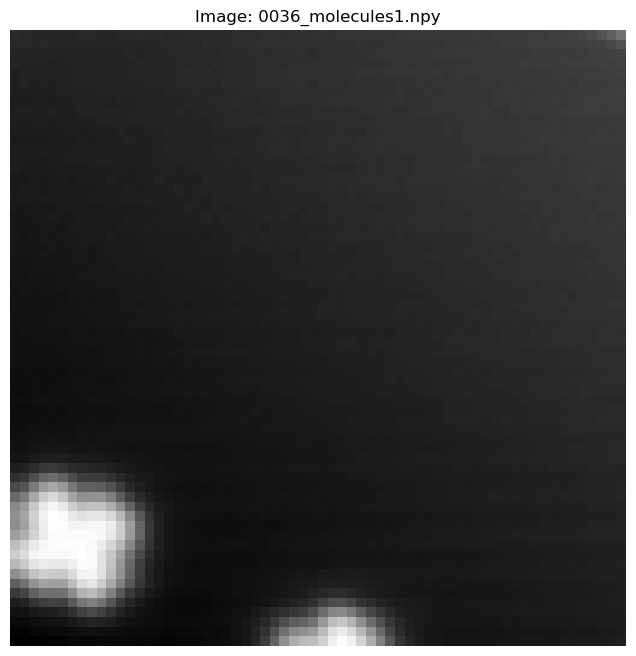


Labeling molecules for image: 0036_molecules1.npy


Enter the number of fully visible molecules:  1


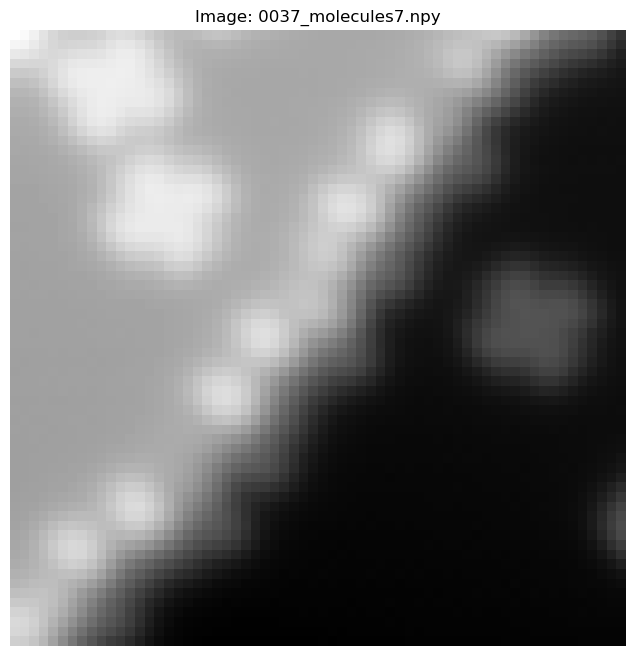


Labeling molecules for image: 0037_molecules7.npy


Enter the number of fully visible molecules:  7


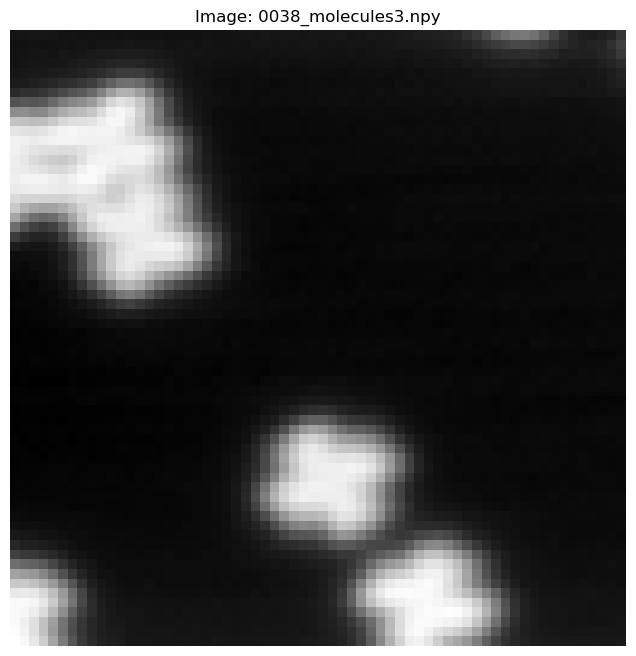


Labeling molecules for image: 0038_molecules3.npy


Enter the number of fully visible molecules:  3


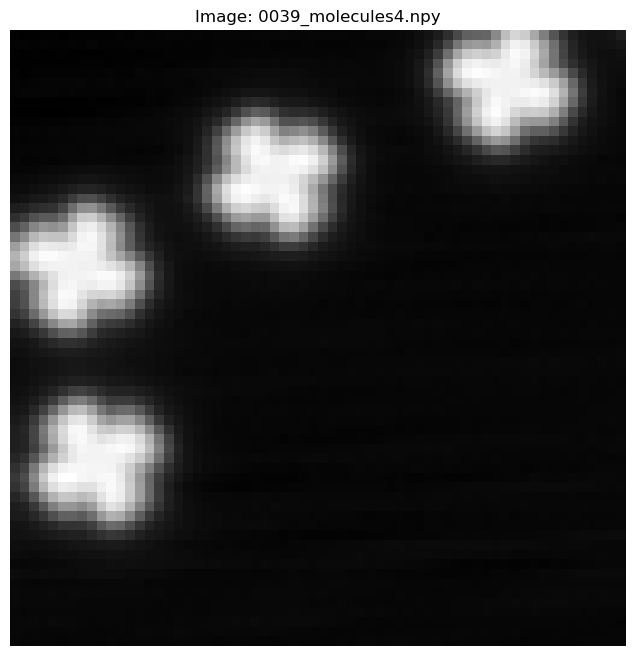


Labeling molecules for image: 0039_molecules4.npy


Enter the number of fully visible molecules:  4


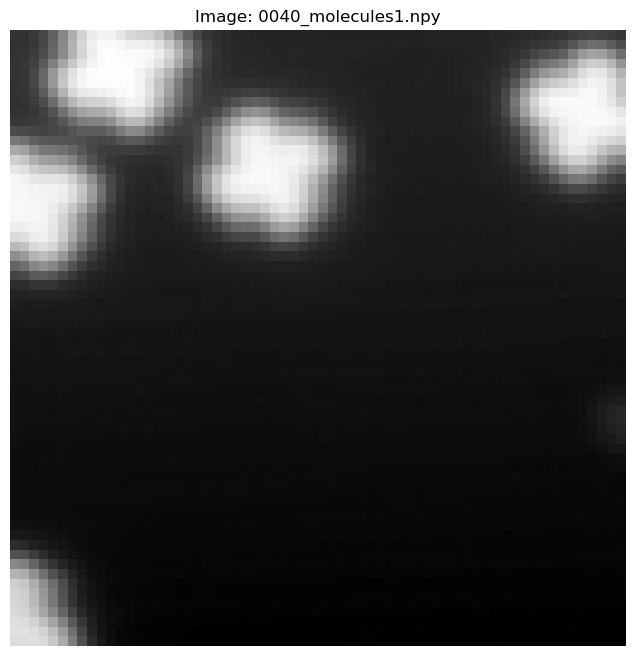


Labeling molecules for image: 0040_molecules1.npy


Enter the number of fully visible molecules:  1


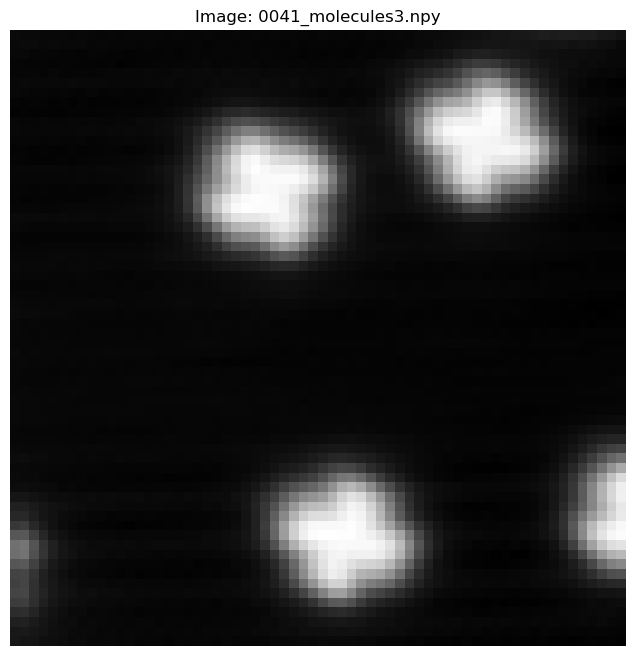


Labeling molecules for image: 0041_molecules3.npy


Enter the number of fully visible molecules:  3


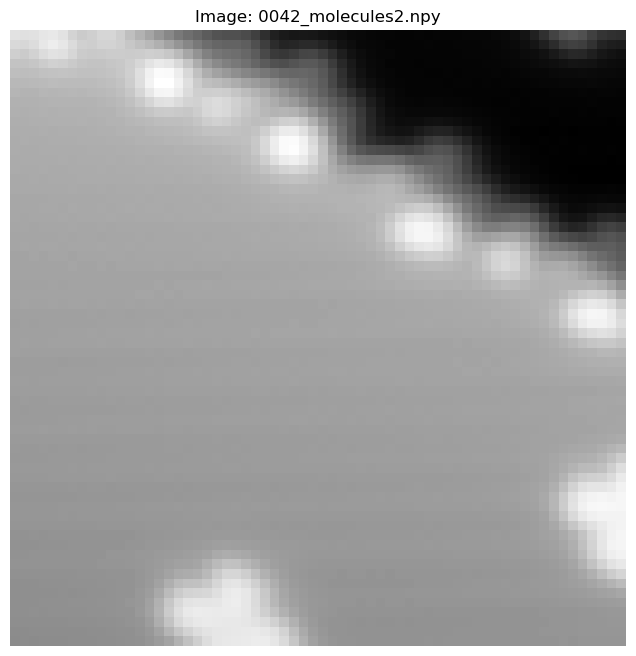


Labeling molecules for image: 0042_molecules2.npy


Enter the number of fully visible molecules:  2


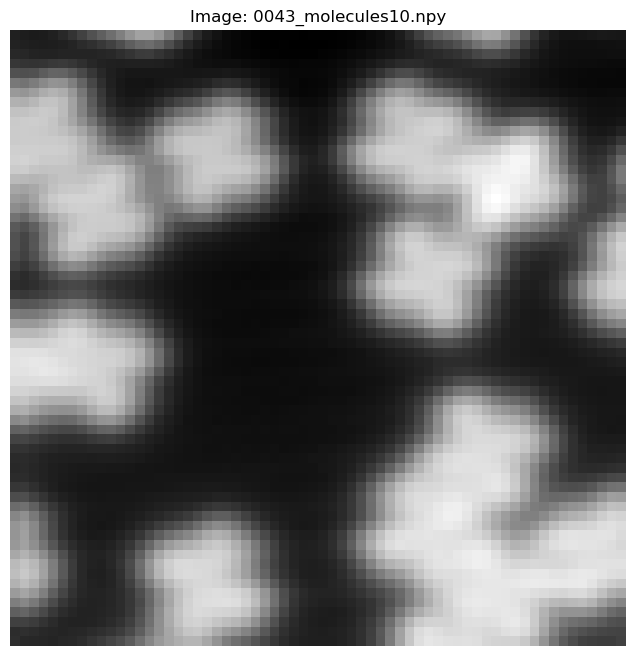


Labeling molecules for image: 0043_molecules10.npy


Enter the number of fully visible molecules:  10


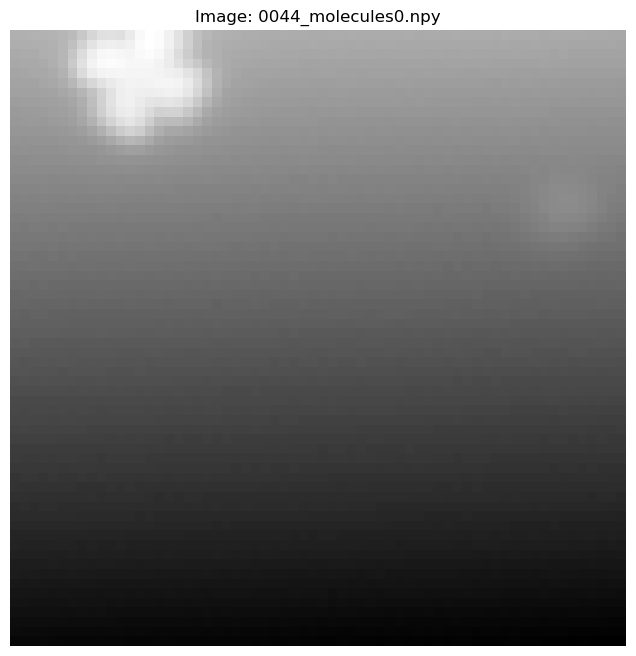


Labeling molecules for image: 0044_molecules0.npy


Enter the number of fully visible molecules:  0


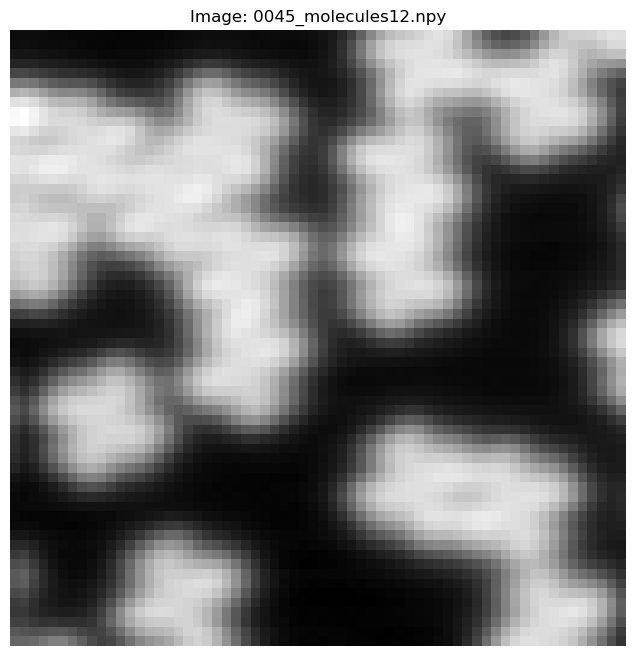


Labeling molecules for image: 0045_molecules12.npy


Enter the number of fully visible molecules:  12


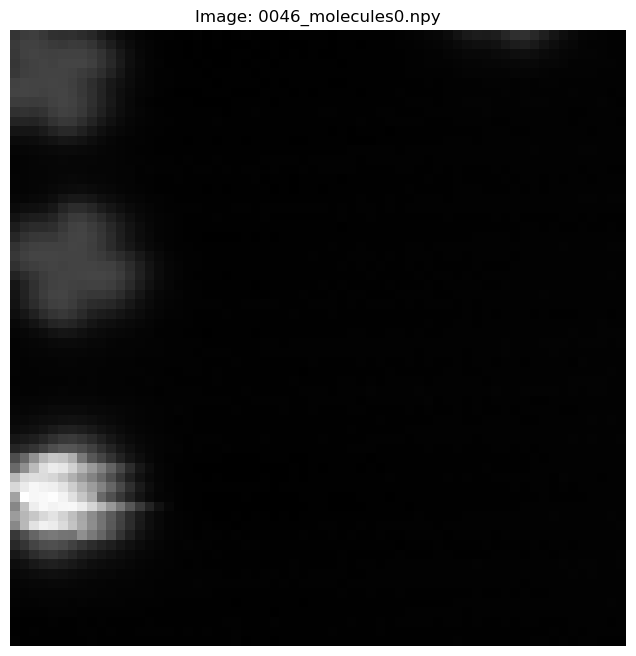


Labeling molecules for image: 0046_molecules0.npy


Enter the number of fully visible molecules:  0


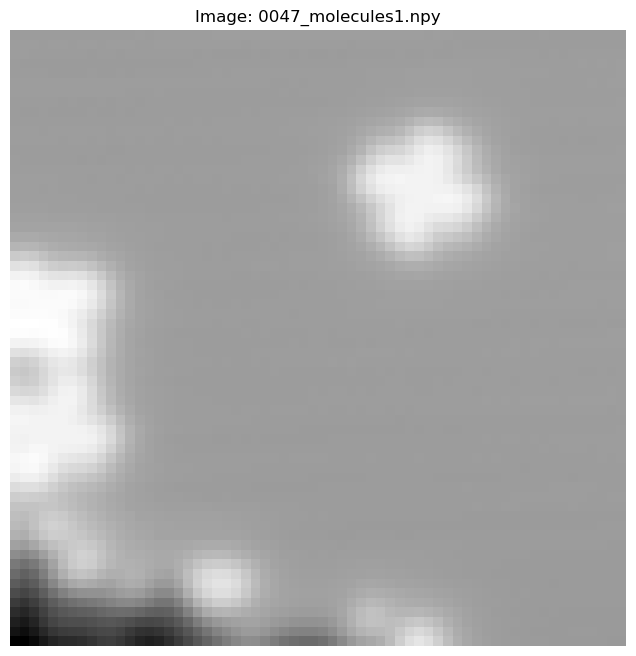


Labeling molecules for image: 0047_molecules1.npy


Enter the number of fully visible molecules:  1


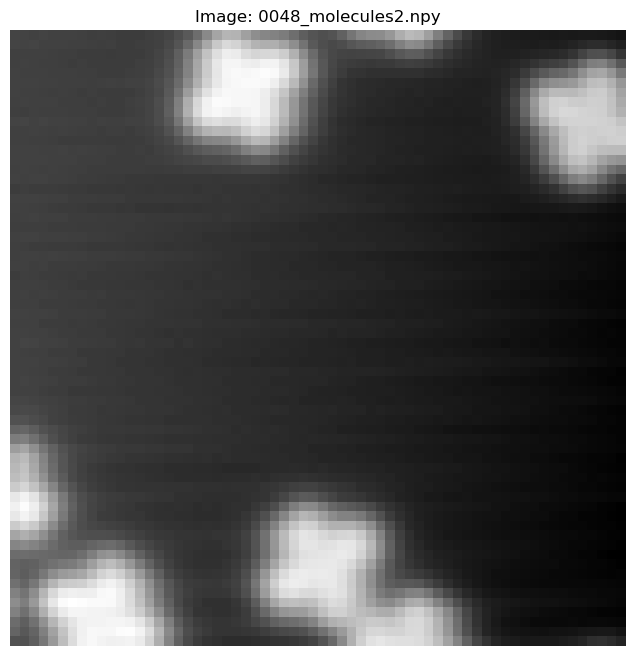


Labeling molecules for image: 0048_molecules2.npy


Enter the number of fully visible molecules:  2


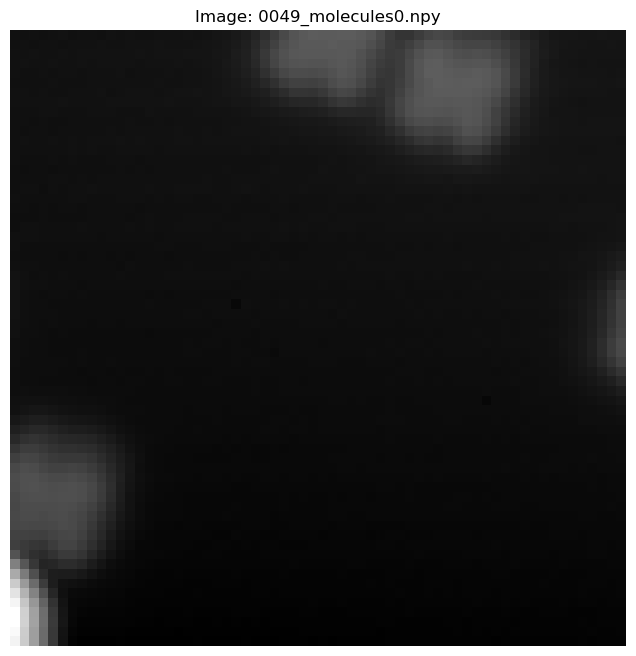


Labeling molecules for image: 0049_molecules0.npy


Enter the number of fully visible molecules:  0


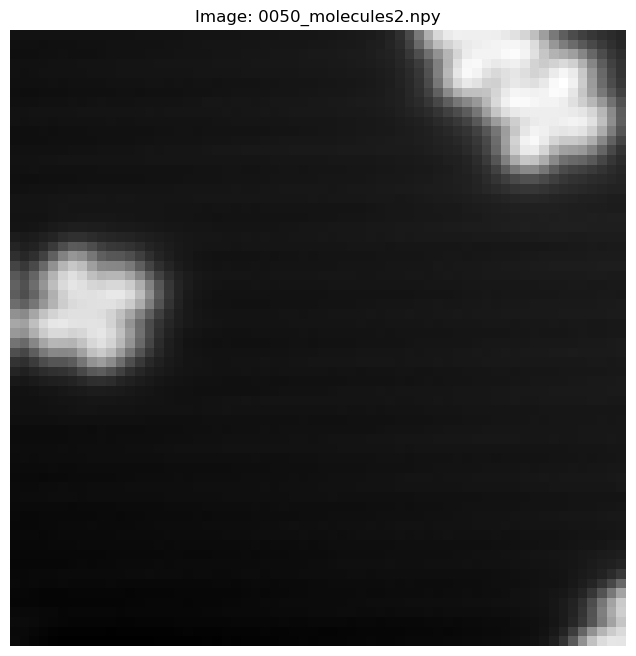


Labeling molecules for image: 0050_molecules2.npy


Enter the number of fully visible molecules:  2


In [22]:
# مسیر داده‌ها
data_path = r"D:\exam\test\stm-data\Train"

# لیست تصاویر
image_files = [f for f in os.listdir(data_path) if f.endswith(".npy")]

# انتخاب 50 تصویر
selected_images = image_files[:50]

# ذخیره نتایج
results = []

for img_file in selected_images:
    # خواندن تصویر
    img_path = os.path.join(data_path, img_file)
    image = np.load(img_path)
    
    # نمایش تصویر
    plt.figure(figsize=(8, 8))
    plt.imshow(image, cmap='gray')
    plt.title(f"Image: {img_file}")
    plt.axis('off')
    plt.show()
    
    # دستی برچسب‌گذاری مولکول‌ها
    print(f"\nLabeling molecules for image: {img_file}")
    num_molecules = int(input("Enter the number of fully visible molecules: "))
    results.append((img_file, num_molecules))

In [23]:
# نمایش نتایج برچسب‌گذاری
print("\nManual Labeling Results:")
for img_file, num_molecules in results:
    print(f"Image: {img_file} -> Number of Molecules: {num_molecules}")


Manual Labeling Results:
Image: 0001_molecules2.npy -> Number of Molecules: 2
Image: 0002_molecules2.npy -> Number of Molecules: 3
Image: 0003_molecules1.npy -> Number of Molecules: 1
Image: 0004_molecules2.npy -> Number of Molecules: 2
Image: 0005_molecules4.npy -> Number of Molecules: 3
Image: 0006_molecules1.npy -> Number of Molecules: 1
Image: 0007_molecules7.npy -> Number of Molecules: 7
Image: 0008_molecules2.npy -> Number of Molecules: 2
Image: 0009_molecules3.npy -> Number of Molecules: 3
Image: 0010_molecules1.npy -> Number of Molecules: 1
Image: 0011_molecules7.npy -> Number of Molecules: 7
Image: 0012_molecules1.npy -> Number of Molecules: 1
Image: 0013_molecules1.npy -> Number of Molecules: 1
Image: 0014_molecules2.npy -> Number of Molecules: 2
Image: 0015_molecules0.npy -> Number of Molecules: 0
Image: 0016_molecules1.npy -> Number of Molecules: 1
Image: 0017_molecules4.npy -> Number of Molecules: 4
Image: 0018_molecules7.npy -> Number of Molecules: 7
Image: 0019_molecule

In [26]:
import csv

# ذخیره نتایج در فایل CSV
with open('manual_labeling_results.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Image', 'Number of Molecules'])
    for img_file, num_molecules in results:
        writer.writerow([img_file, num_molecules])

In [27]:
import os
print(os.getcwd())

C:\Users\Matin\class.vision-master


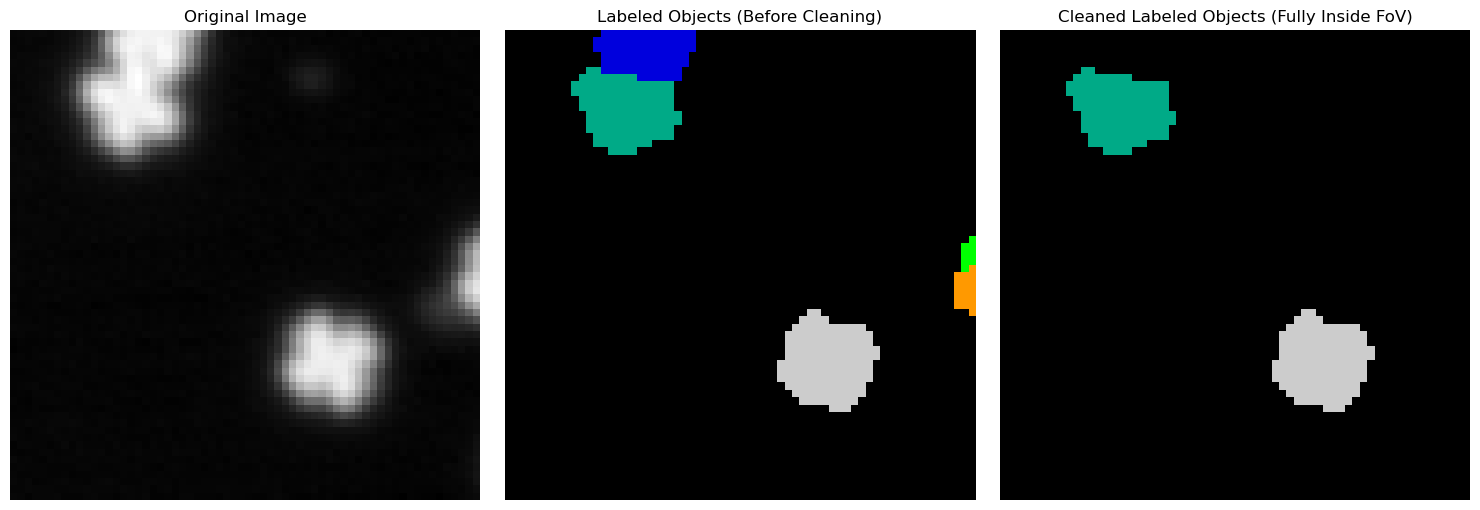

Number of molecules fully inside the FoV: 2


In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage import io, color, filters
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from skimage.measure import regionprops

# Step 1: Read the image
image_path = r"D:\exam\test\stm-data\Train\0001_molecules2.npy"
image = np.load(image_path)

# Step 2: Preprocess the image
# Convert to grayscale if necessary (if it's not already grayscale)
if len(image.shape) == 3:
    image = color.rgb2gray(image)

# Apply Otsu's thresholding to create a binary image
threshold_value = filters.threshold_otsu(image)
binary_image = image > threshold_value

# Step 3: Compute the distance transform and find local maxima
distance = ndi.distance_transform_edt(binary_image)
coords = peak_local_max(distance, footprint=np.ones((3, 3)), labels=binary_image)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)

# Step 4: Apply the watershed algorithm
labels = watershed(-distance, markers, mask=binary_image)

# Step 5: Identify edge-touching labels
rows, cols = labels.shape
edge_labels = np.unique(
    np.concatenate([
        labels[0, :],       # Top edge
        labels[-1, :],      # Bottom edge
        labels[:, 0],       # Left edge
        labels[:, -1]       # Right edge
    ])
)

# Step 6: Exclude edge-touching labels
full_molecule_mask = np.isin(labels, edge_labels, invert=True)
cleaned_labels = labels.copy()
cleaned_labels[~full_molecule_mask] = 0  # Set edge-touching regions to background

# Step 7: Remove molecules behind others
# Use connected components to filter out partially obscured molecules
# Here, we assume that molecules behind others have smaller areas
min_area_threshold = 100  # Adjust based on molecule size
filtered_labels = np.zeros_like(cleaned_labels)
for region in regionprops(cleaned_labels):
    if region.area >= min_area_threshold:
        filtered_labels[cleaned_labels == region.label] = region.label

# Step 8: Visualize the results
fig, axes = plt.subplots(ncols=3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')

ax[1].imshow(labels, cmap='nipy_spectral')
ax[1].set_title('Labeled Objects (Before Cleaning)')

ax[2].imshow(filtered_labels, cmap='nipy_spectral')
ax[2].set_title('Cleaned Labeled Objects (Fully Inside FoV)')

for a in ax:
    a.set_axis_off()

plt.tight_layout()
plt.show()

# Step 9: Count the number of fully inside molecules
num_molecules_fov = len(np.unique(filtered_labels)) - 1  # Subtract 1 for the background label
print(f"Number of molecules fully inside the FoV: {num_molecules_fov}")

Molecule Counts (Fully Inside FoV):
Image: 0001_molecules2.npy -> Number of Molecules: 2
Image: 0002_molecules2.npy -> Number of Molecules: 1
Image: 0003_molecules1.npy -> Number of Molecules: 1
Image: 0004_molecules2.npy -> Number of Molecules: 3
Image: 0005_molecules4.npy -> Number of Molecules: 4
Image: 0006_molecules1.npy -> Number of Molecules: 1
Image: 0007_molecules7.npy -> Number of Molecules: 0
Image: 0008_molecules2.npy -> Number of Molecules: 2
Image: 0009_molecules3.npy -> Number of Molecules: 2
Image: 0010_molecules1.npy -> Number of Molecules: 2
Image: 0011_molecules7.npy -> Number of Molecules: 0
Image: 0012_molecules1.npy -> Number of Molecules: 2
Image: 0013_molecules1.npy -> Number of Molecules: 1
Image: 0014_molecules2.npy -> Number of Molecules: 0
Image: 0015_molecules0.npy -> Number of Molecules: 0
Image: 0016_molecules1.npy -> Number of Molecules: 1
Image: 0017_molecules4.npy -> Number of Molecules: 4
Image: 0018_molecules7.npy -> Number of Molecules: 0
Image: 001

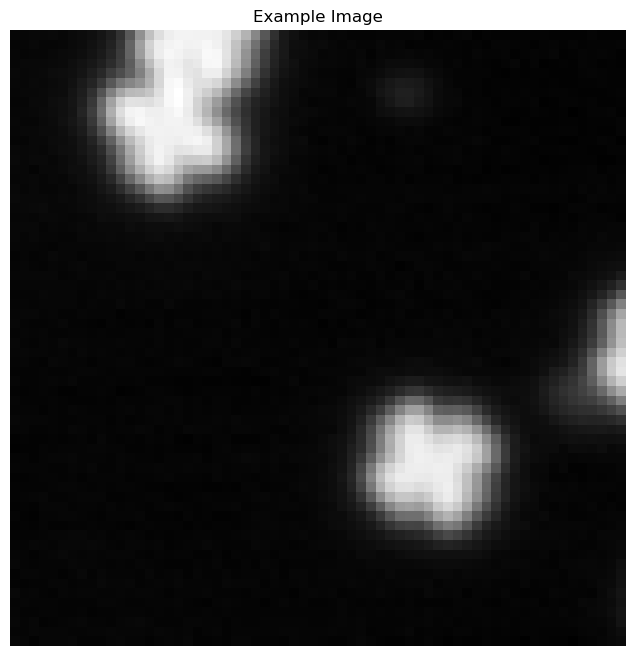

In [33]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage import io, color, filters
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from skimage.measure import regionprops

# Step 1: Define the dataset path
data_path = r"D:\exam\test\stm-data\Train"
image_files = [f for f in os.listdir(data_path) if f.endswith(".npy")]

# Initialize results storage
results = []

# Step 2: Process each image
for img_file in image_files[:50]:  # Process the first 50 images
    # Load the image
    img_path = os.path.join(data_path, img_file)
    image = np.load(img_path)

    # Step 3: Preprocess the image
    if len(image.shape) == 3:
        image = color.rgb2gray(image)  # Convert to grayscale if necessary

    # Apply Otsu's thresholding to create a binary image
    threshold_value = filters.threshold_otsu(image)
    binary_image = image > threshold_value

    # Step 4: Compute the distance transform and find local maxima
    distance = ndi.distance_transform_edt(binary_image)
    coords = peak_local_max(distance, footprint=np.ones((3, 3)), labels=binary_image)
    mask = np.zeros(distance.shape, dtype=bool)
    mask[tuple(coords.T)] = True
    markers, _ = ndi.label(mask)

    # Step 5: Apply the watershed algorithm
    labels = watershed(-distance, markers, mask=binary_image)

    # Step 6: Identify edge-touching labels
    rows, cols = labels.shape
    edge_labels = np.unique(
        np.concatenate([
            labels[0, :],       # Top edge
            labels[-1, :],      # Bottom edge
            labels[:, 0],       # Left edge
            labels[:, -1]       # Right edge
        ])
    )

    # Step 7: Exclude edge-touching labels
    full_molecule_mask = np.isin(labels, edge_labels, invert=True)
    cleaned_labels = labels.copy()
    cleaned_labels[~full_molecule_mask] = 0  # Set edge-touching regions to background

    # Step 8: Count the number of molecules fully inside the FoV
    num_molecules_fov = len(np.unique(cleaned_labels)) - 1  # Subtract 1 for the background label

    # Store the result
    results.append((img_file, num_molecules_fov))

# Step 9: Print the results
print("Molecule Counts (Fully Inside FoV):")
for img_file, count in results:
    print(f"Image: {img_file} -> Number of Molecules: {count}")

# Step 10: Optionally, visualize one example image
example_image = np.load(os.path.join(data_path, image_files[0]))
plt.figure(figsize=(8, 8))
plt.imshow(example_image, cmap='gray')
plt.title("Example Image")
plt.axis('off')
plt.show()

Molecule Orientations (Fully Inside FoV):
Image: 0001_molecules2.npy
  Molecule 2: 71.8 degrees
  Molecule 5: 68.7 degrees
Image: 0002_molecules2.npy
  Molecule 2: 89.0 degrees
Image: 0003_molecules1.npy
  Molecule 2: 50.7 degrees
Image: 0004_molecules2.npy
  Molecule 1: 89.8 degrees
  Molecule 9: 13.1 degrees
  Molecule 10: 12.2 degrees
Image: 0005_molecules4.npy
  Molecule 1: 69.1 degrees
  Molecule 2: 52.7 degrees
  Molecule 4: 85.8 degrees
  Molecule 5: 88.8 degrees
Image: 0006_molecules1.npy
  Molecule 1: 54.4 degrees
Image: 0007_molecules7.npy
Image: 0008_molecules2.npy
  Molecule 2: 83.7 degrees
  Molecule 3: 69.5 degrees
Image: 0009_molecules3.npy
  Molecule 4: 81.3 degrees
  Molecule 5: 46.6 degrees
Image: 0010_molecules1.npy
  Molecule 2: 86.4 degrees
  Molecule 4: 0.0 degrees
Image: 0011_molecules7.npy
Image: 0012_molecules1.npy
  Molecule 4: 86.9 degrees
  Molecule 5: 88.7 degrees
Image: 0013_molecules1.npy
  Molecule 1: 40.8 degrees
Image: 0014_molecules2.npy
Image: 0015_m

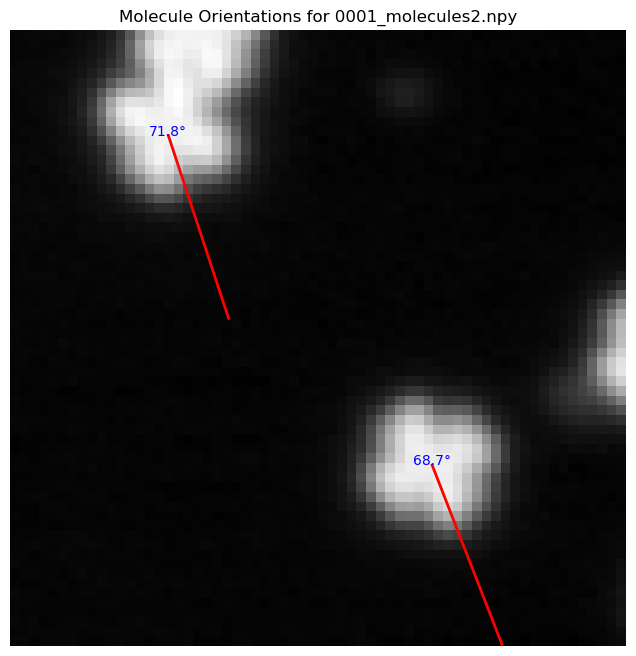

In [36]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage import io, color, filters
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from skimage.measure import regionprops

# Step 1: Define the dataset path
data_path = r"D:\exam\test\stm-data\Train"
image_files = [f for f in os.listdir(data_path) if f.endswith(".npy")]

# Initialize results storage
results = []

# Step 2: Process each image
for img_file in image_files[:50]:  # Process the first 50 images
    # Load the image
    img_path = os.path.join(data_path, img_file)
    image = np.load(img_path)

    # Step 3: Preprocess the image
    if len(image.shape) == 3:
        image = color.rgb2gray(image)  # Convert to grayscale if necessary

    # Apply Otsu's thresholding to create a binary image
    threshold_value = filters.threshold_otsu(image)
    binary_image = image > threshold_value

    # Step 4: Compute the distance transform and find local maxima
    distance = ndi.distance_transform_edt(binary_image)
    coords = peak_local_max(distance, footprint=np.ones((3, 3)), labels=binary_image)
    mask = np.zeros(distance.shape, dtype=bool)
    mask[tuple(coords.T)] = True
    markers, _ = ndi.label(mask)

    # Step 5: Apply the watershed algorithm
    labels = watershed(-distance, markers, mask=binary_image)

    # Step 6: Identify edge-touching labels
    rows, cols = labels.shape
    edge_labels = np.unique(
        np.concatenate([
            labels[0, :],       # Top edge
            labels[-1, :],      # Bottom edge
            labels[:, 0],       # Left edge
            labels[:, -1]       # Right edge
        ])
    )

    # Step 7: Exclude edge-touching labels
    full_molecule_mask = np.isin(labels, edge_labels, invert=True)
    cleaned_labels = labels.copy()
    cleaned_labels[~full_molecule_mask] = 0  # Set edge-touching regions to background

    # Step 8: Compute properties of fully inside molecules
    regions = regionprops(cleaned_labels)

    # Step 9: Estimate orientation angles
    orientations = []
    for region in regions:
        if region.label == 0:  # Skip background
            continue
        # Get the orientation angle from region properties
        orientation_angle = np.degrees(region.orientation)
        # Normalize the angle to [0, 89] degrees
        normalized_angle = np.abs(orientation_angle) % 90
        orientations.append((region.label, normalized_angle))

    # Store the results for this image
    results.append((img_file, orientations))

# Step 10: Print the results
print("Molecule Orientations (Fully Inside FoV):")
for img_file, orientations in results:
    print(f"Image: {img_file}")
    for label, angle in orientations:
        print(f"  Molecule {label}: {angle:.1f} degrees")

# Step 11: Visualize one example image with orientations
example_img_file = image_files[0]
example_img_path = os.path.join(data_path, example_img_file)
example_image = np.load(example_img_path)

# Preprocess the example image
threshold_value = filters.threshold_otsu(example_image)
binary_image = example_image > threshold_value

# Compute the distance transform and apply watershed
distance = ndi.distance_transform_edt(binary_image)
coords = peak_local_max(distance, footprint=np.ones((3, 3)), labels=binary_image)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)
labels = watershed(-distance, markers, mask=binary_image)

# Identify edge-touching labels and exclude them
rows, cols = labels.shape
edge_labels = np.unique(
    np.concatenate([
        labels[0, :], labels[-1, :], labels[:, 0], labels[:, -1]
    ])
)
full_molecule_mask = np.isin(labels, edge_labels, invert=True)
cleaned_labels = labels.copy()
cleaned_labels[~full_molecule_mask] = 0

# Compute orientations for visualization
regions = regionprops(cleaned_labels)
plt.figure(figsize=(8, 8))
plt.imshow(example_image, cmap='gray')
plt.title(f"Molecule Orientations for {example_img_file}")

for region in regions:
    if region.label == 0:  # Skip background
        continue
    # Get orientation angle
    orientation_angle = np.degrees(region.orientation)
    normalized_angle = np.abs(orientation_angle) % 90
    # Draw orientation line
    y0, x0 = region.centroid
    orientation_length = 20  # Length of the orientation line
    x1 = x0 + orientation_length * np.cos(np.radians(normalized_angle))
    y1 = y0 + orientation_length * np.sin(np.radians(normalized_angle))
    plt.plot([x0, x1], [y0, y1], color='red', linewidth=2)
    plt.text(x0, y0, f"{normalized_angle:.1f}°", color="blue", fontsize=10, ha="center")

plt.axis('off')
plt.show()

number of label: 2


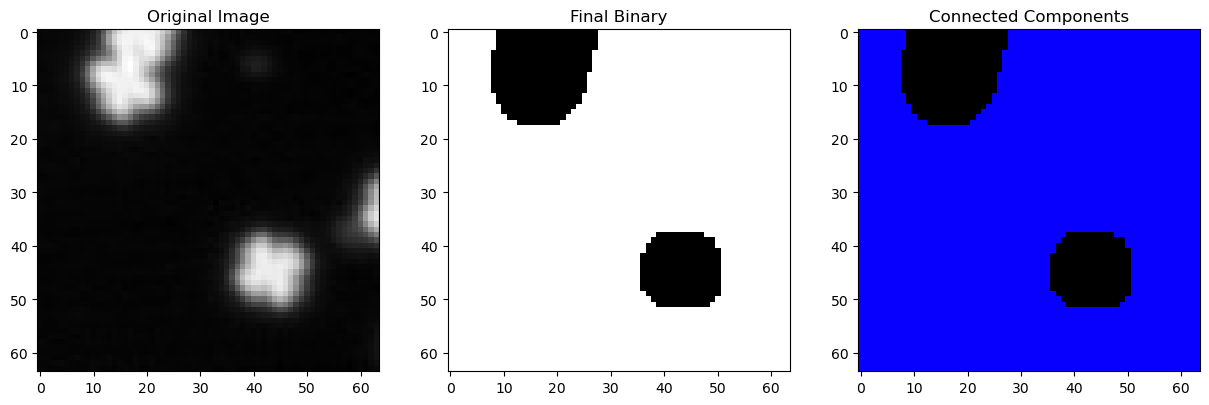

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. خواندن تصویر
image = cv2.imread(r'D:\exam\test\otsu.jpg', 0)

# 2. حذف نویز با Gaussian Blur بزرگ
blurred = cv2.GaussianBlur(image, (25, 25), 0)

# 3. آستانه‌گذاری با Otsu و معکوس کردن
_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# 4. عملیات morphology برای اتصال قسمت‌های شکسته (closing)
kernel = np.ones((7, 7), np.uint8)
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# 5. شمارش مؤلفه‌های متصل
num_labels, labels = cv2.connectedComponents(closed)

print("number of components that identified:", num_labels)

# 6. ساخت تصویر رنگی برای نمایش مؤلفه‌ها
label_hue = np.uint8(179 * labels / np.max(labels))
blank = 255 * np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank, blank])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue == 0] = 0

# 7. نمایش نتایج
plt.figure(figsize=(15, 6))
plt.subplot(131); plt.imshow(image, cmap='gray'); plt.title("Original Image")
plt.subplot(132); plt.imshow(closed, cmap='gray'); plt.title("Final Binary")
plt.subplot(133); plt.imshow(labeled_img); plt.title("Connected Components")
plt.show()


تعداد ارقام شناسایی‌شده: 2


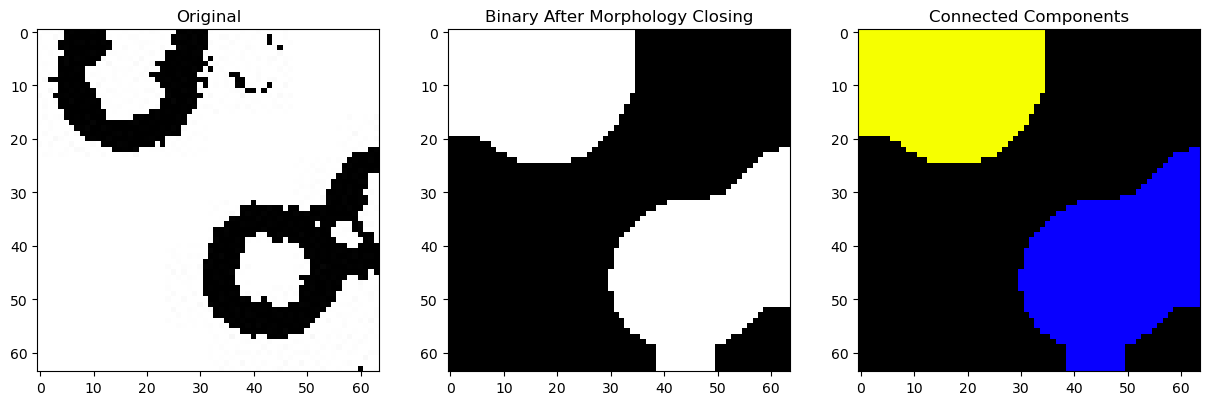

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# خواندن تصویر
image = cv2.imread('temp_output6.jpg', 0)

# فیلتر Gaussian برای حذف نویز
blurred = cv2.GaussianBlur(image, (25, 25), 0)

# آستانه‌گذاری خودکار (Otsu) + معکوس کردن
_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# اعمال عملیات morphological closing برای اتصال ارقام و حذف نویز
kernel = np.ones((10, 10), np.uint8)  # اندازه کرنل بزرگتر
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# شمارش مؤلفه‌های متصل
num_labels, labels = cv2.connectedComponents(closed)

print("تعداد ارقام شناسایی‌شده:", num_labels - 1)

# نمایش رنگی مؤلفه‌ها
label_hue = np.uint8(179 * labels / np.max(labels))
blank = 255 * np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank, blank])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue == 0] = 0

# نمایش نتایج
plt.figure(figsize=(15, 6))
plt.subplot(131); plt.imshow(image, cmap='gray'); plt.title("Original")
plt.subplot(132); plt.imshow(closed, cmap='gray'); plt.title("Binary After Morphology Closing")
plt.subplot(133); plt.imshow(labeled_img); plt.title("Connected Components")
plt.show()

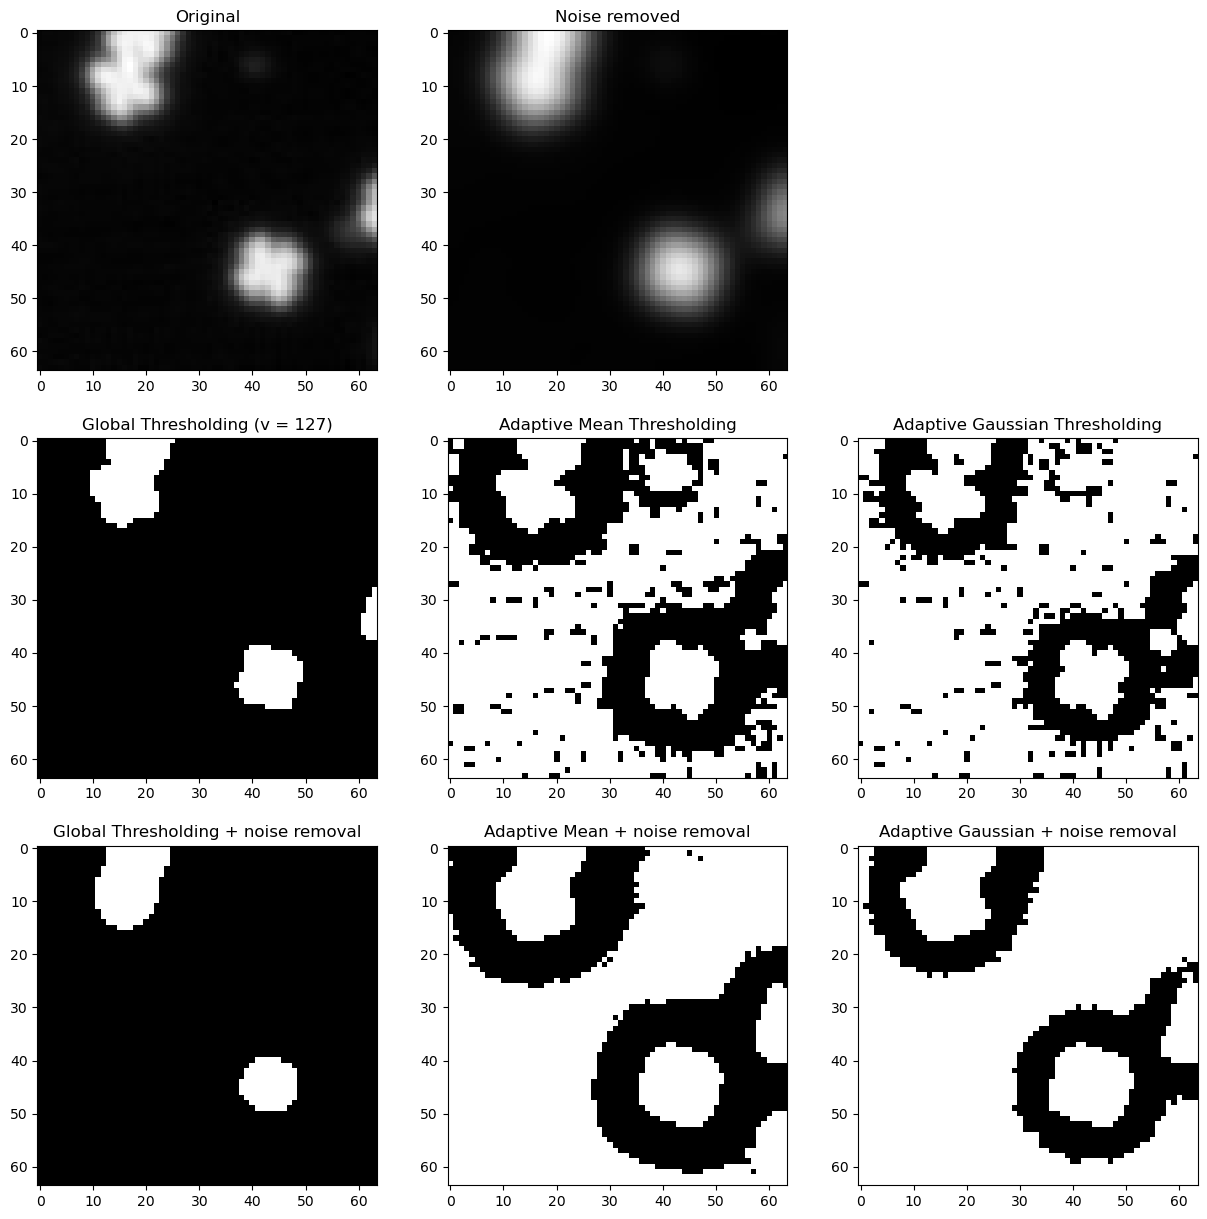

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# بارگذاری تصویر جدید
original_image = cv2.imread(r'D:\exam\test\otsu.jpg', 0)

# حذف نویز
noise_removed_image = cv2.GaussianBlur(original_image, (15, 15), 0)  # فیلتر بزرگ‌تر شده است

# اعمال آستانه‌گذاری
_, output1 = cv2.threshold(original_image, 127, 255, cv2.THRESH_BINARY)
output2 = cv2.adaptiveThreshold(original_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
output3 = cv2.adaptiveThreshold(original_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

_, output4 = cv2.threshold(noise_removed_image, 127, 255, cv2.THRESH_BINARY)
output5 = cv2.adaptiveThreshold(noise_removed_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
output6 = cv2.adaptiveThreshold(noise_removed_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# نمایش تصاویر
plt.figure(figsize=[15, 15])
plt.subplot(331); plt.imshow(original_image, cmap='gray'); plt.title("Original");
plt.subplot(332); plt.imshow(noise_removed_image, cmap='gray'); plt.title("Noise removed");

plt.subplot(334); plt.imshow(output1, cmap='gray'); plt.title("Global Thresholding (v = 127)");
plt.subplot(335); plt.imshow(output2, cmap='gray'); plt.title("Adaptive Mean Thresholding");
plt.subplot(336); plt.imshow(output3, cmap='gray'); plt.title("Adaptive Gaussian Thresholding");

plt.subplot(337); plt.imshow(output4, cmap='gray'); plt.title("Global Thresholding + noise removal");
plt.subplot(338); plt.imshow(output5, cmap='gray'); plt.title("Adaptive Mean + noise removal");
plt.subplot(339); plt.imshow(output6, cmap='gray'); plt.title("Adaptive Gaussian + noise removal");
# ذخیره تصویر مورد نظر برای استفاده بعدی
cv2.imwrite('temp_output6.jpg', output6)
cv2.imwrite('temp_output3.jpg', output3)
plt.show()

تعداد ارقام شناسایی‌شده: 2


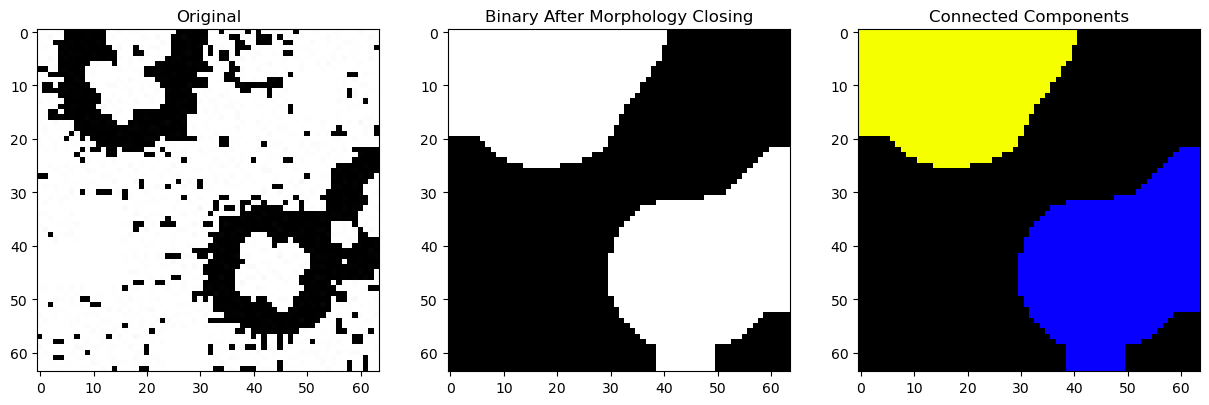

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# خواندن تصویر
image = cv2.imread('temp_output3.jpg', 0)

# فیلتر Gaussian برای حذف نویز
blurred = cv2.GaussianBlur(image, (25, 25), 0)

# آستانه‌گذاری خودکار (Otsu) + معکوس کردن
_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# اعمال عملیات morphological closing برای اتصال ارقام و حذف نویز
kernel = np.ones((10, 10), np.uint8)  # اندازه کرنل بزرگتر
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# شمارش مؤلفه‌های متصل
num_labels, labels = cv2.connectedComponents(closed)

print("تعداد ارقام شناسایی‌شده:", num_labels - 1)

# نمایش رنگی مؤلفه‌ها
label_hue = np.uint8(179 * labels / np.max(labels))
blank = 255 * np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank, blank])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue == 0] = 0

# نمایش نتایج
plt.figure(figsize=(15, 6))
plt.subplot(131); plt.imshow(image, cmap='gray'); plt.title("Original")
plt.subplot(132); plt.imshow(closed, cmap='gray'); plt.title("Binary After Morphology Closing")
plt.subplot(133); plt.imshow(labeled_img); plt.title("Connected Components")
plt.show()

تعداد ارقام شناسایی‌شده: 2


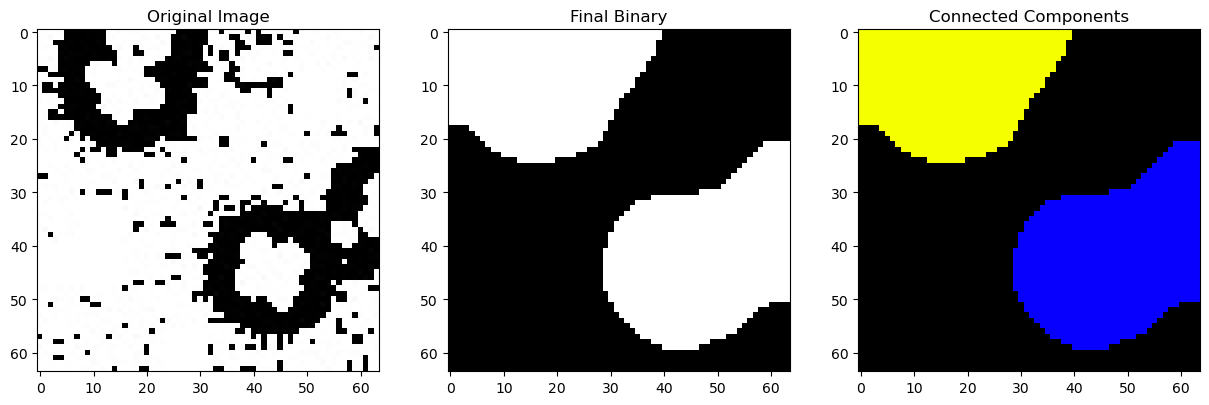

In [53]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. خواندن تصویر
image = cv2.imread('temp_output3.jpg', 0)

# 2. حذف نویز با Gaussian Blur بزرگ
blurred = cv2.GaussianBlur(image, (25, 25), 0)

# 3. آستانه‌گذاری با Otsu و معکوس کردن
_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# 4. عملیات morphology برای اتصال قسمت‌های شکسته (closing)
kernel = np.ones((7, 7), np.uint8)
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# 5. شمارش مؤلفه‌های متصل
num_labels, labels = cv2.connectedComponents(closed)

print("تعداد ارقام شناسایی‌شده:", num_labels - 1)

# 6. ساخت تصویر رنگی برای نمایش مؤلفه‌ها
label_hue = np.uint8(179 * labels / np.max(labels))
blank = 255 * np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank, blank])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue == 0] = 0

# 7. نمایش نتایج
plt.figure(figsize=(15, 6))
plt.subplot(131); plt.imshow(image, cmap='gray'); plt.title("Original Image")
plt.subplot(132); plt.imshow(closed, cmap='gray'); plt.title("Final Binary")
plt.subplot(133); plt.imshow(labeled_img); plt.title("Connected Components")
plt.show()

# یافتن contour در تصویر
در OpenCV، یافتن خطوط مانند یافتن شی سفید از پس زمینه سیاه است. بنابراین به یاد داشته باشید، شیء یافت شده باید سفید و پس زمینه باید سیاه باشد.
خطوط یک ابزار مفید برای تجزیه و تحلیل شکل و تشخیص و تشخیص اشیا هستند.
contours, hierarchy = cv2.findContours(image, mode, method)

آرگومانهای این تابع به ترتیب اول تصویر منبع، دوم حالت بازیابی کانتور، سوم روش تقریب کانتور است.

# ترسیم با تابع drawContours در opencv
ترسیم همه‌ی contour ها

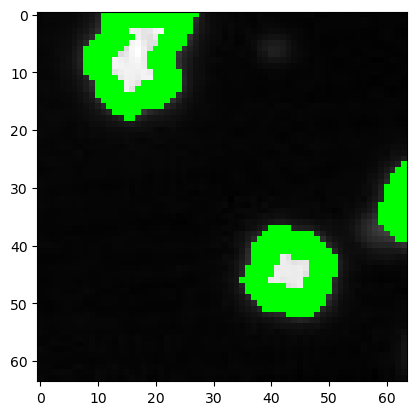

In [54]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread(r'D:\exam\test\otsu.jpg', 0)
ret, thresh = cv2.threshold(image, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

bgr_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)


all_contours = cv2.drawContours(bgr_image, contours, -1, (0,255,0), 3)
plt.imshow(all_contours)

# رسم یک کانتور با تابع drawContours

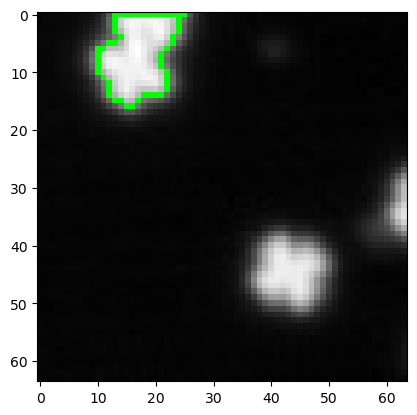

In [66]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread(r'D:\exam\test\otsu.jpg', 0)
ret, thresh = cv2.threshold(image, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

bgr_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)


third_contour = cv2.drawContours(bgr_image, contours, 2, (0,255,0), 1)
plt.imshow(third_contour)

In [70]:
for contour in contours:
    print(contour.shape)

(20, 1, 2)
(8, 1, 2)
(25, 1, 2)


# Contour Approximation Method


cv2.CHAIN_APPROX_NONE:
contours[0].shape: (35, 1, 2) so number of points for the contour: 35
-----
cv2.CHAIN_APPROX_SIMPLE:
contours[0].shape: (20, 1, 2) so number of points for the contour: 20


Text(0.5, 1.0, 'CHAIN_APPROX_SIMPLE')

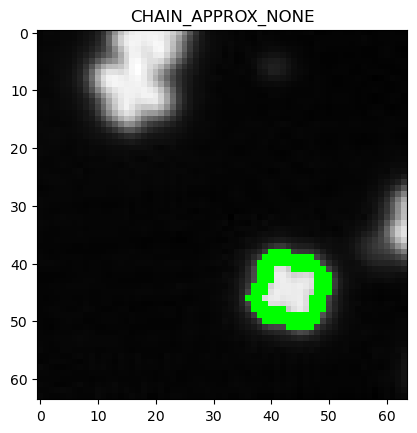

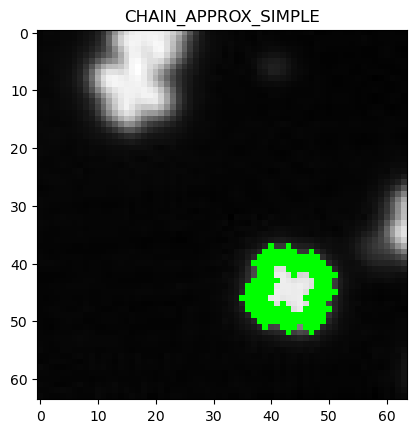

In [71]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread(r'D:\exam\test\otsu.jpg', 0)
ret, thresh = cv2.threshold(image, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

print("cv2.CHAIN_APPROX_NONE:")
print("contours[0].shape: {} so number of points for the contour: {}".format(contours[0].shape, len(contours[0])))

bgr_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
for point in contours[0]:
    cv2.circle(bgr_image, (point[0][0], point[0][1]), 1, (0,255,0), -1)
plt.imshow(bgr_image[...,::-1]); plt.title('CHAIN_APPROX_NONE')
print('-'*5)


contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print("cv2.CHAIN_APPROX_SIMPLE:")
print("contours[0].shape: {} so number of points for the contour: {}".format(contours[0].shape, len(contours[0])))

bgr_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
for point in contours[0]:
    cv2.circle(bgr_image, (point[0][0], point[0][1]), 2, (0,255,0), -1)
    
plt.figure(); plt.imshow(bgr_image[...,::-1]); plt.title('CHAIN_APPROX_SIMPLE')

# یافتن Convex Hull یا پوش محدب
در ریاضیات، پوشش محدب(Convex hull) یا لفاف محدب مجموعه از نقاط در صفحه اقلیدسی یا فضای اقلیدسی، کوچکترین مجموعه محدبی است که شامل این مجموعه می‌باشد. به عنوان مثال، هنگامی که X یک زیر مجموعه محدود از نقاط در صفحه است، پوشش محدب ممکن است به شکل نواری نشان داده شود که در اطراف X کشیده شده است.
https://fa.wikipedia.org/wiki/پوش_محدب

ابتدا با یک مثال ساده تعدادی نقطه تصادفی ایجاد کرده و پوشش محدب آن ها را رسم می‌کنیم:
ایجاد نقاط تصادفی روی تصویر مشکی

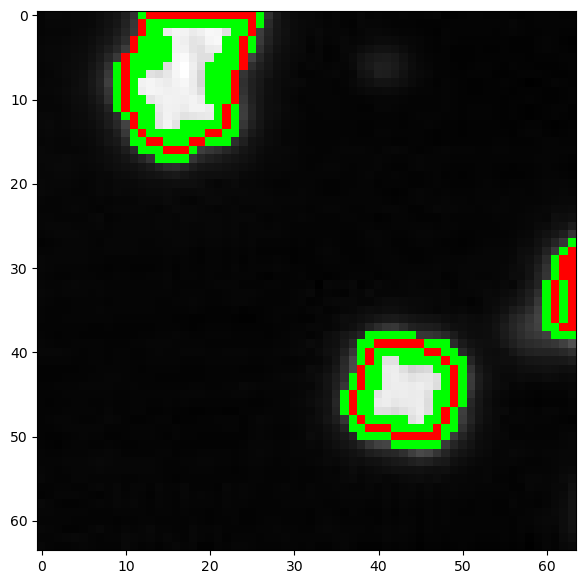

In [72]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load source image
bgr_image = cv2.imread(r'D:\exam\test\otsu.jpg')

# Convert image to gray and blur it
src_gray = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(src_gray, 127, 255, 0)


# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Find the convex hull object for each contour
hull_list = []
for i in range(len(contours)):
    hull = cv2.convexHull(contours[i])
    hull_list.append(hull)
    
# Draw contours + hull results
cv2.drawContours(bgr_image, contours, -1, (0,255,0), 2)
cv2.drawContours(bgr_image, hull_list, -1, (0,0,255),1)

plt.figure(figsize=[7,7])
plt.imshow(bgr_image[...,::-1])

# تخمین bounding box و دایره از روی کانتور

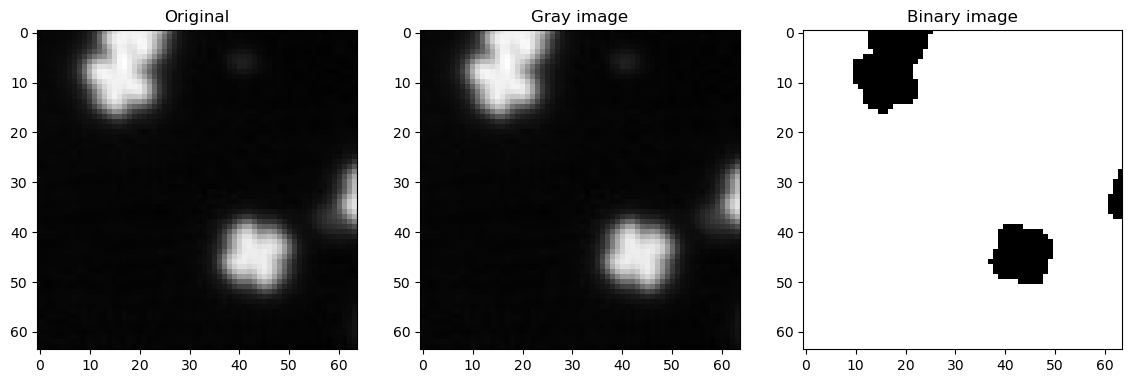

In [78]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

input_image = cv2.imread(r'D:\exam\test\otsu.jpg')            

# convert image to grayscale
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)         

# invert black and white
_, binary_image = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize=[14,8])
plt.subplot(131);plt.imshow(input_image[...,::-1]);plt.title("Original");
plt.subplot(132);plt.imshow(gray_image, cmap='gray');plt.title("Gray image");
plt.subplot(133);plt.imshow(binary_image, cmap='gray');plt.title("Binary image");

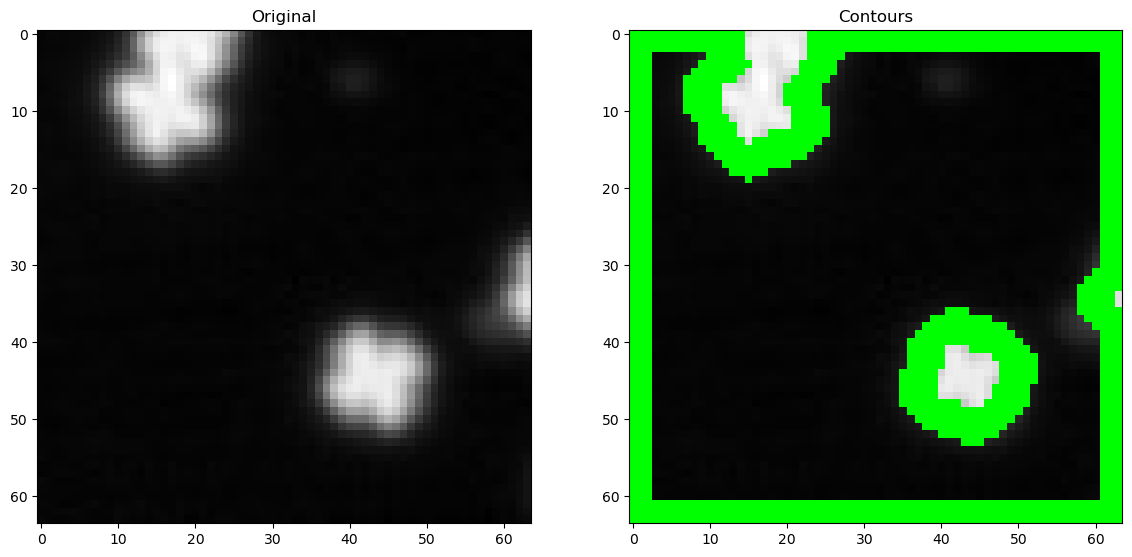

In [79]:
# Let's define our kernel size
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5), (2, 2))
closing = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

contours, _ = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
all_contours = cv2.drawContours(input_image.copy(), contours, -1, (0,255,0), 3)
plt.figure(figsize=[14,8])

plt.subplot(121);plt.imshow(input_image[...,::-1]);plt.title("Original");
plt.subplot(122);plt.imshow(all_contours[...,::-1]);plt.title("Contours");

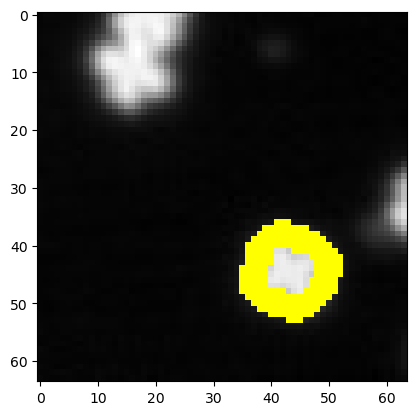

In [80]:
drawing = input_image.copy()
cv2.drawContours(drawing, [contours[1]], -1, (0,255,255),3)
plt.imshow(drawing[...,::-1])

In [85]:
boundRect = cv2.boundingRect(contours[1])
centers, radius = cv2.minEnclosingCircle(contours[1])

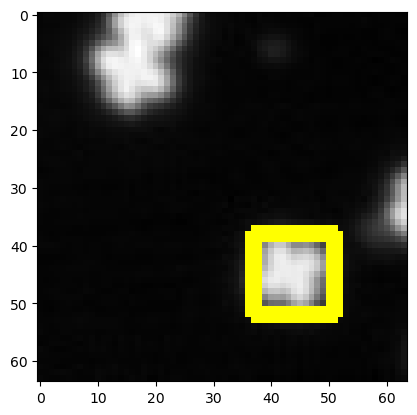

In [86]:
drawing = input_image.copy()

cv2.rectangle(drawing, (int(boundRect[0]), int(boundRect[1])), \
  (int(boundRect[0]+boundRect[2]), int(boundRect[1]+boundRect[3])), (0,255,255), 2)
plt.imshow(drawing[...,::-1])

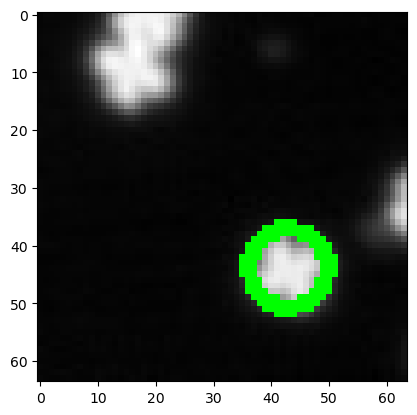

In [87]:
drawing = input_image.copy()
cv2.circle(drawing, (int(centers[0]), int(centers[1])), int(radius), (0,255,), 2)
plt.imshow(drawing[...,::-1])

# کد از ابتدا تا انتها و رسم همه ی کانتورها

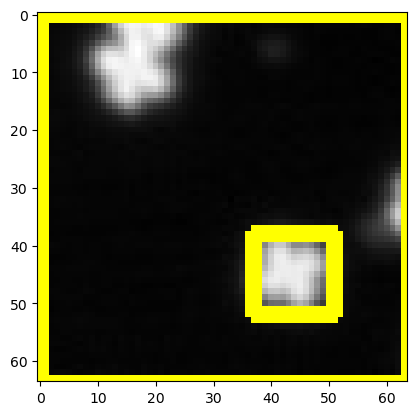

In [90]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

input_image = cv2.imread(r'D:\exam\test\otsu.jpg')            

# convert image to grayscale
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)         

# invert black and white
_, binary_image = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY_INV)

# Let's define our kernel size
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5), (2, 2))
closing = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

contours, _ = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

drawing = input_image.copy()

for c in contours:
    boundRect = cv2.boundingRect(c)
    cv2.rectangle(drawing, (int(boundRect[0]), int(boundRect[1])), \
  (int(boundRect[0]+boundRect[2]), int(boundRect[1]+boundRect[3])), (0,255,255), 2)

plt.imshow(drawing[...,::-1])

# تخمین contour
این تابع فرآیند تقریب یک شکل کانتور به شکل دیگری متشکل از تعداد کمتری از رئوس است، به گونه ای که فاصله خطوط تقریبی از شکا اولیه برابر با دقت مشخص شده یا کمتر از خطای مشخص شده باشد!
بسته به دقتی که ما مشخص می کنیم، یک شکل کانتور را به شکل دیگری با تعداد رئوس کمتر تقریب می زند. این یک پیاده سازی از الگوریتم داگلاس-پیکر است. صفحه ویکی پدیا را برای الگوریتم و نمایش بررسی کنید.
Douglas-Peucker

Approximating Contours using ApproxPolyDP
Using ApproxPolyDP to approximate contours as a more defined shape
It approximates a contour shape to another shape with less number of vertices depending upon the precision we specify.

cv2.approxPolyDP(contour, Approximation Accuracy, Closed)

contour – is the individual contour we wish to approximate
Approximation Accuracy – Important parameter is determining the accuracy of the approximation. Small values give precise- approximations, large values give more generic approximation. A good rule of thumb is less than 5% of the contour perimeter
Closed – a Boolean value that states whether the approximate contour should be open or closed
همچنین از تابع زیر برای محاسبه ی محیط شکل استفاده میکنیم که معمولا خطای قابل تحمل را بر اساس این مقدار مینویسیم
Contour Perimeter
perimeter = cv2.arcLength(cnt,True)

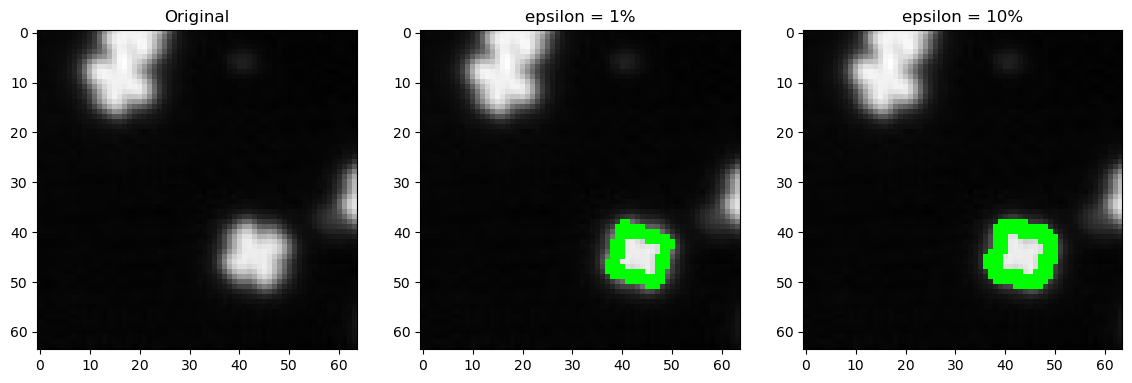

In [91]:
import cv2
import matplotlib.pyplot as plt


image = cv2.imread(r'D:\exam\test\otsu.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

ret,thresh = cv2.threshold(gray,127,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)

#1st contour
cnt = contours[0]
perimeter = cv2.arcLength(cnt,True)

first_output = image.copy()
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)
cv2.drawContours(first_output, [approx], 0, (0,255,0), 2)

second_output = image.copy()
epsilon = 0.01*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)
cv2.drawContours(second_output, [approx], 0, (0,255,0), 2)

plt.figure(figsize=[14,8])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(132);plt.imshow(first_output[...,::-1]);plt.title("epsilon = 1%");
plt.subplot(133);plt.imshow(second_output[...,::-1]);plt.title("epsilon = 10%");

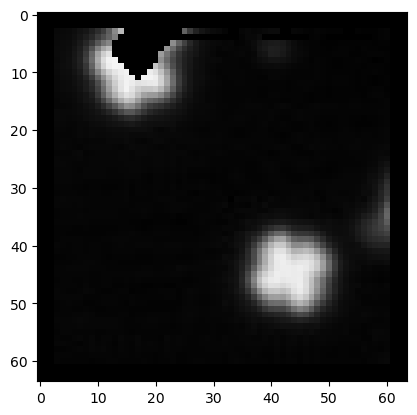

In [93]:
import cv2
import matplotlib.pyplot as plt


image = cv2.imread(r'D:\exam\test\otsu.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, binary_image = cv2.threshold(gray, 245, 255, cv2.THRESH_BINARY_INV)
imagecontours, _ = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#for each of the contours detected, the shape of the contours is approximated using approxPolyDP() function and the contours are drawn in the image using drawContours() function
for c in imagecontours:
    epsilon = 0.01 * cv2.arcLength(c, True)
    approximations = cv2.approxPolyDP(c, epsilon, True)
    cv2.drawContours(image, [approximations], 0, (0), 3)
    
    #the name of the detected shapes are written on the image
    i, j = approximations[0][0] 
    
    if len(approximations) == 3:
        cv2.putText(image, "Triangle", (i, j), cv2.FONT_HERSHEY_COMPLEX, 1, 0, 1)
    elif len(approximations) == 4:
        cv2.putText(image, "Rectangle", (i, j), cv2.FONT_HERSHEY_COMPLEX, 1, 0, 1)
    elif len(approximations) == 5:
        cv2.putText(image, "Pentagon", (i, j), cv2.FONT_HERSHEY_COMPLEX, 1, 0, 1)
    elif 6 < len(approximations) < 15:
        cv2.putText(image, "Ellipse", (i, j), cv2.FONT_HERSHEY_COMPLEX, 1, 0, 1)
    else:
        cv2.putText(image, "Circle", (i, j), cv2.FONT_HERSHEY_COMPLEX, 1, 0, 1)

plt.imshow(image[...,::-1])

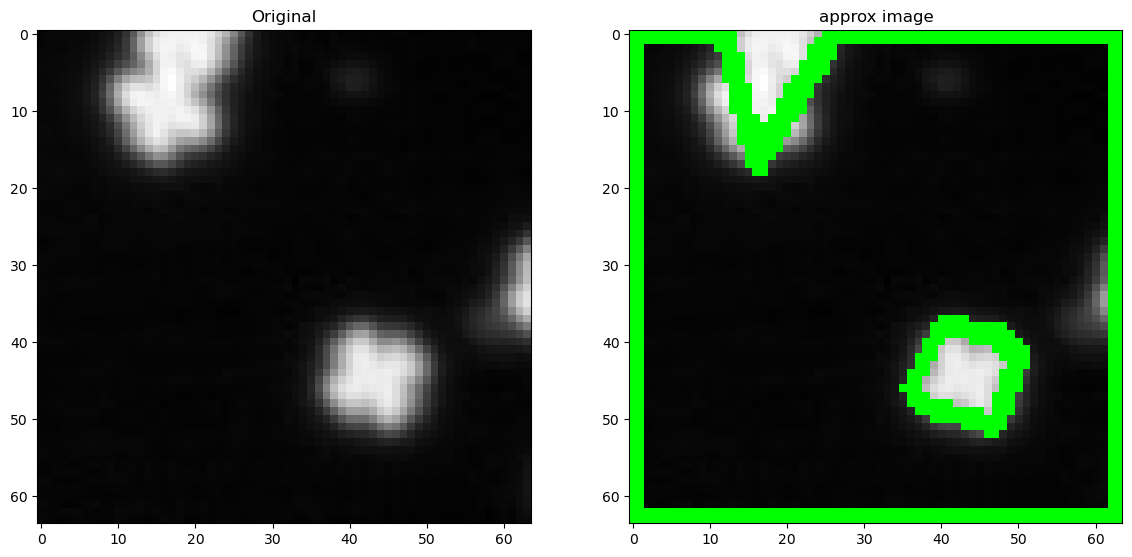

In [94]:

import numpy as np
import cv2

# Load image and keep a copy
image = cv2.imread(r'D:\exam\test\otsu.jpg')
 
# Grayscale and binarize
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# Find contours 
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
copy = image.copy()


# Iterate through each contour and compute the approx contour
for c in contours:
    # Calculate accuracy as a percent of the contour perimeter
    accuracy = 0.03 * cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, accuracy, True)
    cv2.drawContours(copy, [approx], 0, (0, 255, 0), 2)

plt.figure(figsize=[14,8])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(122);plt.imshow(copy, cmap='gray');plt.title("approx image");

# شمارش سکه
تلاش اولیه!

# شرط تعداد نقاط contour!


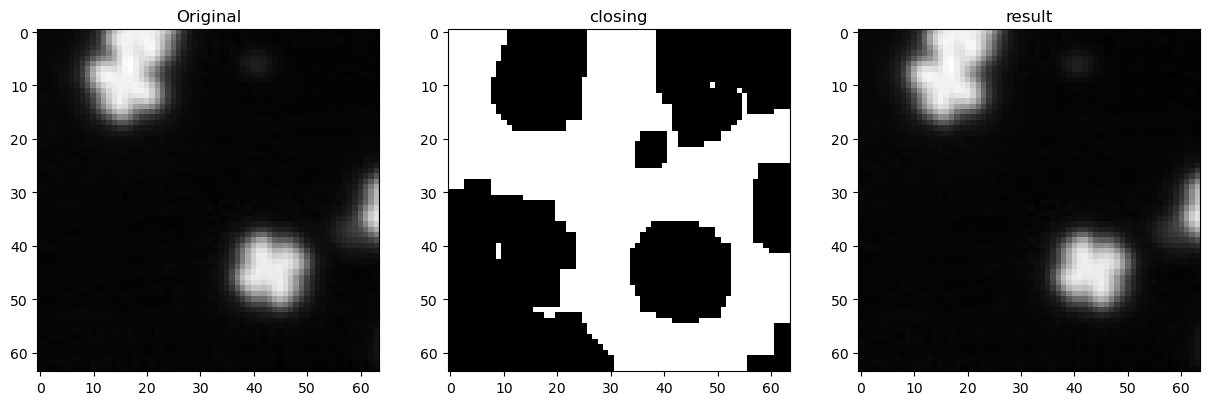

In [95]:
# Standard imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
image = cv2.imread(r'D:\exam\test\otsu.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray, (31, 31), 0) #Noise removal
thresh = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 1)

kernel = np.ones((5, 5), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
        
contours, hierarchy = cv2.findContours(closing, cv2.RETR_EXTERNAL,
                                       cv2.CHAIN_APPROX_SIMPLE)
        
drawing_image = image.copy()
for cnt in contours:
    if len(cnt) < 100: #100 is more probable to be a circle!
        continue
    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(drawing_image, ellipse, (0,255,0), 2)

plt.figure(figsize=[15,15])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(132);plt.imshow(closing, cmap='gray');plt.title("closing");
plt.subplot(133);plt.imshow(drawing_image[...,::-1]);plt.title("result");

# یا شرط مساحت کانتور!


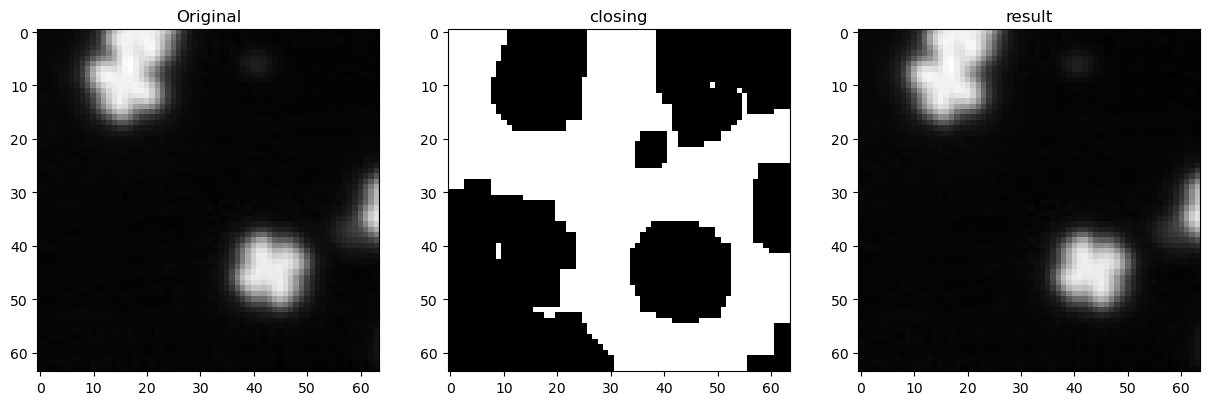

In [98]:
# Standard imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
image = cv2.imread(r'D:\exam\test\otsu.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray, (31, 31), 0) #Noise removal
thresh = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 1)

kernel = np.ones((5, 5), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
        
contours, hierarchy = cv2.findContours(closing, cv2.RETR_EXTERNAL,
                                       cv2.CHAIN_APPROX_SIMPLE)
        
drawing_image = image.copy()
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area < 5000 or area > 50000:
        continue

    if len(cnt) < 5:
        continue

    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(drawing_image, ellipse, (0,255,0), 2)

plt.figure(figsize=[15,15])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(132);plt.imshow(closing, cmap='gray');plt.title("closing");
plt.subplot(133);plt.imshow(drawing_image[...,::-1]);plt.title("result");

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">تشخیص Blob</div>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">Blob
گروهی از پیکسل‌های متصل در یک تصویر است که دارای ویژگی‌های مشترکی هستند (مثلاً مقدار مقیاس خاکستری)
<br />
این روش یک روشی متشکل از چند فاز پشت سر هم به شرح زیر است:
</div>

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">اما این الگوریتم چگونه کار میکند؟!</div>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"><br />
    <b>1 - آستانه گذاری:</b>
<br />
ابندا تصویر منبع را با آستانه گذاری در تصویر با آستانه هایی که از minThreshold شروع می شوند، به چندین تصویر باینری تبدیل میگردد.
<br />
این آستانه ها با thresholdStep تا maxThreshold افزایش می یابند.
<br />
برای مثال آستانه اول minThreshold، دومی minThreshold + thresholdStep، سومین آستانه minThreshold + 2 x thresholdStep و غیره است.
<br />
    <b>2 - گروه‌بندی :</b>
<br />
در هر تصویر باینری، پیکسل های سفید متصل با هم گروه بندی می شوند. که به آنها حباب یا Blob گفته میشود.
<br />
    <b>3 - ادغام: </b>
<br />
مراکز حباب‌های به دست آمده در تصاویر باینری محاسبه می‌شوند و حباب‌های نزدیک‌تر از پارامتر مشخص شده ی  minDistBetweenBlobs ادغام می‌شوند.
<br />
    <b>4 - محاسبه مرکز و شعاع:</b>
<br />
به عنوان نتیجه ی نهایی مراکز و شعاع حباب‌های ادغام شده جدید محاسبه شده و برگردانده می‌شوند.
</div>

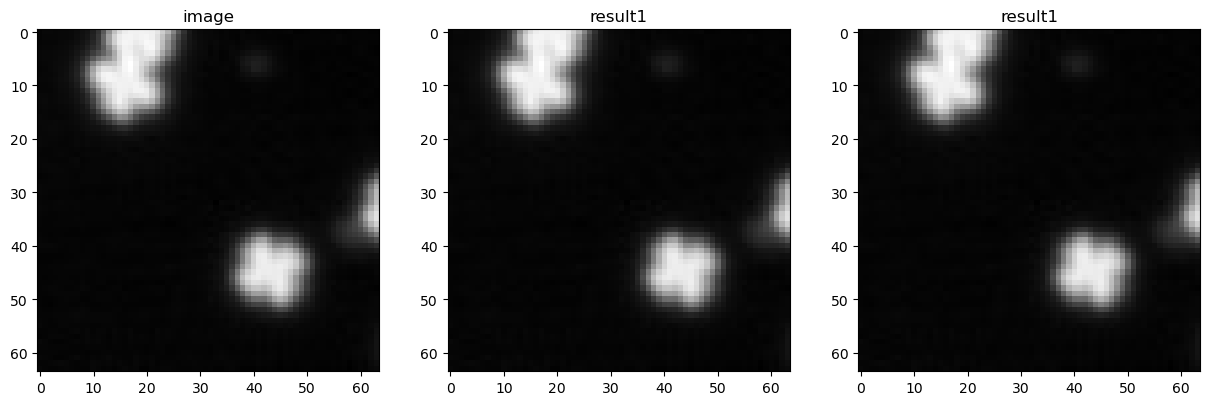

In [1]:
# Standard imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
image = cv2.imread(r'D:\exam\test\otsu.jpg')

# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()



detector = cv2.SimpleBlobDetector_create(params)


# Detect blobs.
keypoints = detector.detect(image)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
# the size of the circle corresponds to the size of blob

result1 = cv2.drawKeypoints(image, keypoints, np.array([]), (0,0,255))
result2 = cv2.drawKeypoints(image, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


plt.figure(figsize=[15,15])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("image");
plt.subplot(132);plt.imshow(result1[...,::-1]);plt.title("result1");
plt.subplot(133);plt.imshow(result2[...,::-1]);plt.title("result1");

In [8]:
for k in keypoints:
    print("point:", k.pt)
    print("point:", k.size)

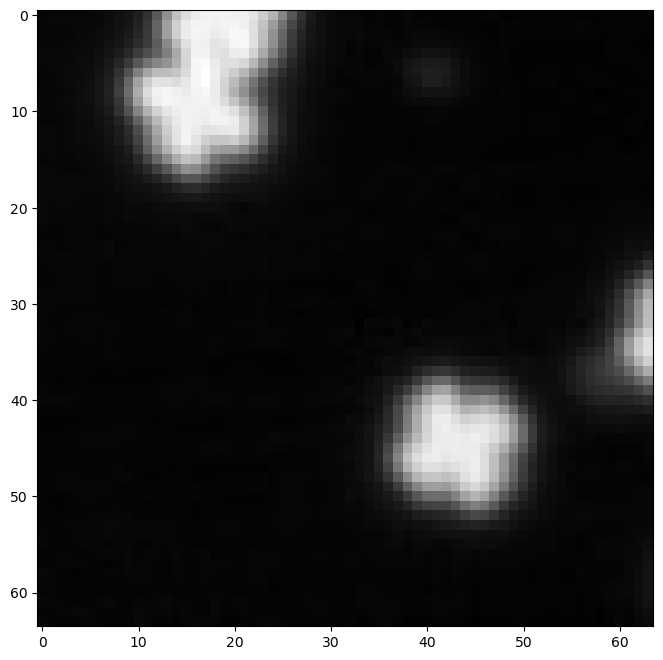

In [6]:
# Standard imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
image = cv2.imread(r'D:\exam\test\otsu.jpg')

# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Filter by Area.
params.filterByArea = True
params.minArea = 5000
params.maxArea = 20000


detector = cv2.SimpleBlobDetector_create(params)


# Detect blobs.
keypoints = detector.detect(image)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
# the size of the circle corresponds to the size of blob

result = cv2.drawKeypoints(image, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=[14,8])
plt.imshow(result[...,::-1])

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">فیلتر کردن با میزان دایره بودن</div>
<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">Circularity
 میزان نزدیک بودن شکل به شکل دایره را مشخص میکند.</div>

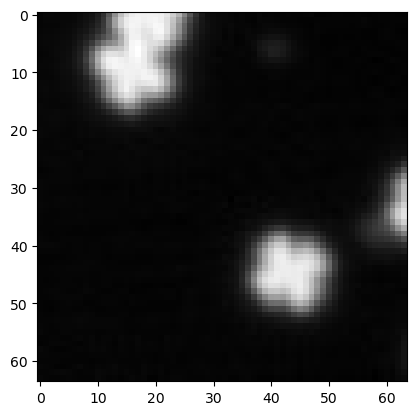

In [11]:
# Standard imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
image = cv2.imread(r'D:\exam\test\otsu.jpg')

# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.84

detector = cv2.SimpleBlobDetector_create(params)


# Detect blobs.
keypoints = detector.detect(image)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
# the size of the circle corresponds to the size of blob

result = cv2.drawKeypoints(image, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(result[...,::-1])

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">فیلتر کردن با میزان محدب بودن اشکال</div>
<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">Convexity
 میزان محدب بودن را مشخص میکند.</div>

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">فیلتر کردن با میزان محدب بودن اشکال</div>
<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">Convexity
 میزان محدب بودن را مشخص میکند.</div>

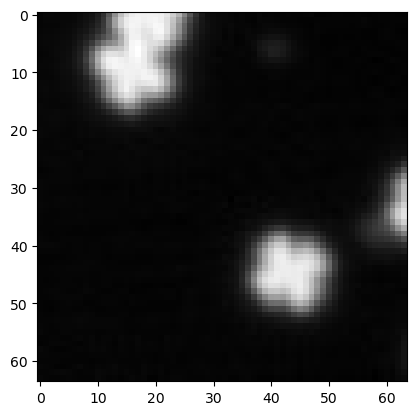

In [12]:
# Standard imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
image = cv2.imread(r'D:\exam\test\otsu.jpg')

# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.85

detector = cv2.SimpleBlobDetector_create(params)


# Detect blobs.
keypoints = detector.detect(image)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
# the size of the circle corresponds to the size of blob

result = cv2.drawKeypoints(image, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(result[...,::-1])

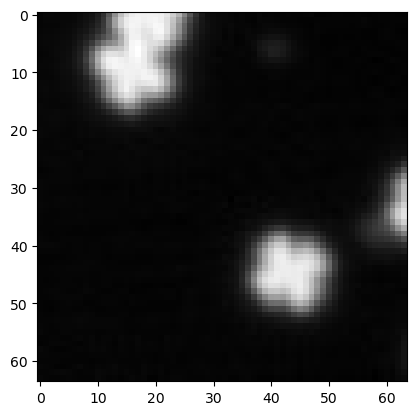

In [13]:
# Standard imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
image = cv2.imread(r'D:\exam\test\otsu.jpg')

# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.3
params.maxInertiaRatio = 0.7

detector = cv2.SimpleBlobDetector_create(params)


# Detect blobs.
keypoints = detector.detect(image)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
# the size of the circle corresponds to the size of blob

result = cv2.drawKeypoints(image, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(result[...,::-1])

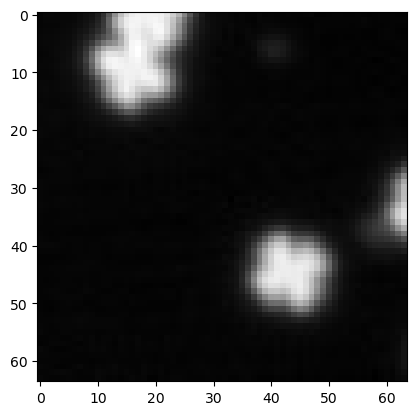

In [14]:
# Standard imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
image = cv2.imread(r'D:\exam\test\otsu.jpg')

# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.maxThreshold = 150

detector = cv2.SimpleBlobDetector_create(params)


# Detect blobs.
keypoints = detector.detect(image)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
# the size of the circle corresponds to the size of blob

result = cv2.drawKeypoints(image, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(result[...,::-1])

# Some Basic Morphological Algorithms
. Boundary extraction
· Region filling
. Extraction of connected components
· Convex Hull

· Thinning
· Skeletons

· Pruning

# اعمال فیلتر sharpening

[[-0.11111111 -0.11111111 -0.11111111]
 [-0.11111111  1.88888889 -0.11111111]
 [-0.11111111 -0.11111111 -0.11111111]]


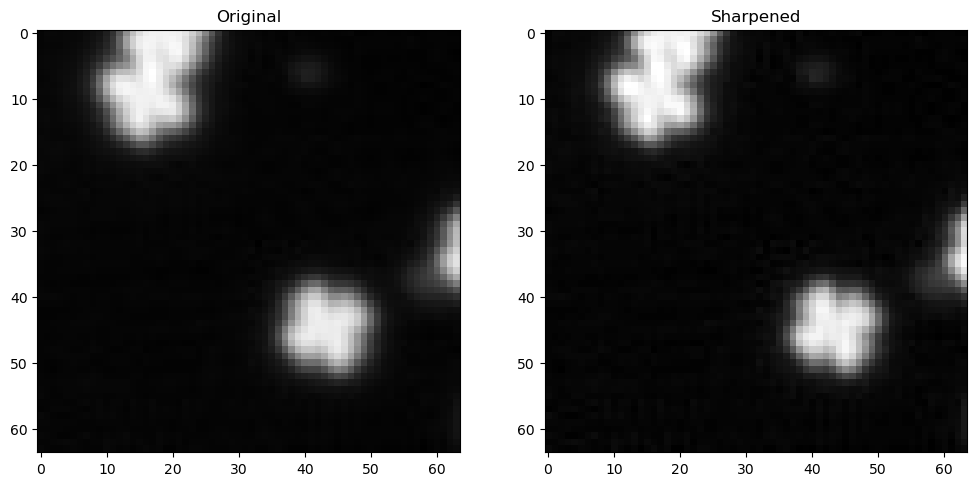

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(r'D:\exam\test\otsu.jpg')

kernel1 = np.array([[0,0,0], 
                              [0,2,0], 
                              [0,0,0]])

kernel2 = 1/9*np.array([[1,1,1], 
                              [1,1,1], 
                              [1,1,1]])

final_kernel = kernel1-kernel2
# applying different kernels to the input image
sharpened = cv2.filter2D(image, -1, final_kernel)

plt.figure(figsize=[12,7])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(122);plt.imshow(sharpened[...,::-1]);plt.title("Sharpened");
print(final_kernel)

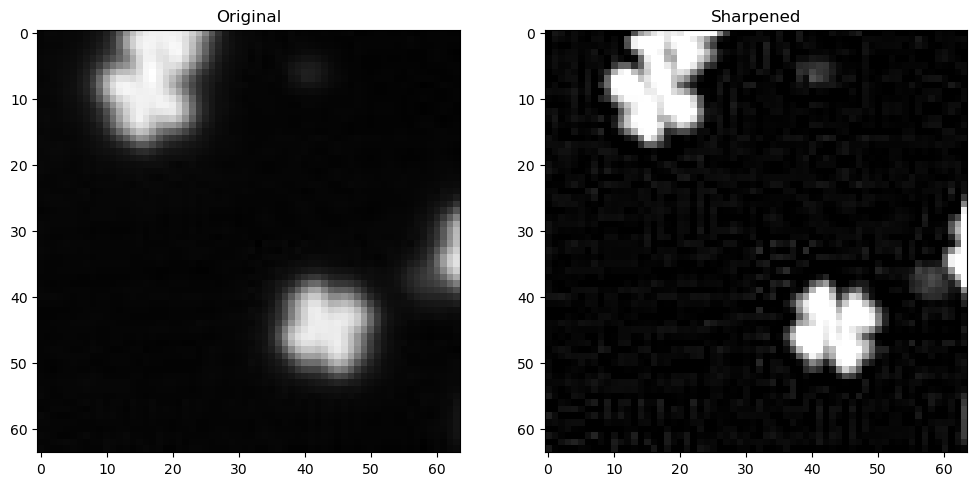

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(r'D:\exam\test\otsu.jpg')

kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1,9,-1], 
                              [-1,-1,-1]])

# applying different kernels to the input image
sharpened = cv2.filter2D(image, -1, kernel_sharpening)

plt.figure(figsize=[12,7])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(122);plt.imshow(sharpened[...,::-1]);plt.title("Sharpened");


# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">تشخیص لبه ها و گرادیان تصویر</div>

```cv2.filter2D(src, ddepth, kernel)```

The function does actually compute ``correlation``, ``not the convolution``

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">استفاده از قدر مطلق برای مثبت کردن مشتق منفی و نمایش تمامی تغییرات لبه های افقی</div>

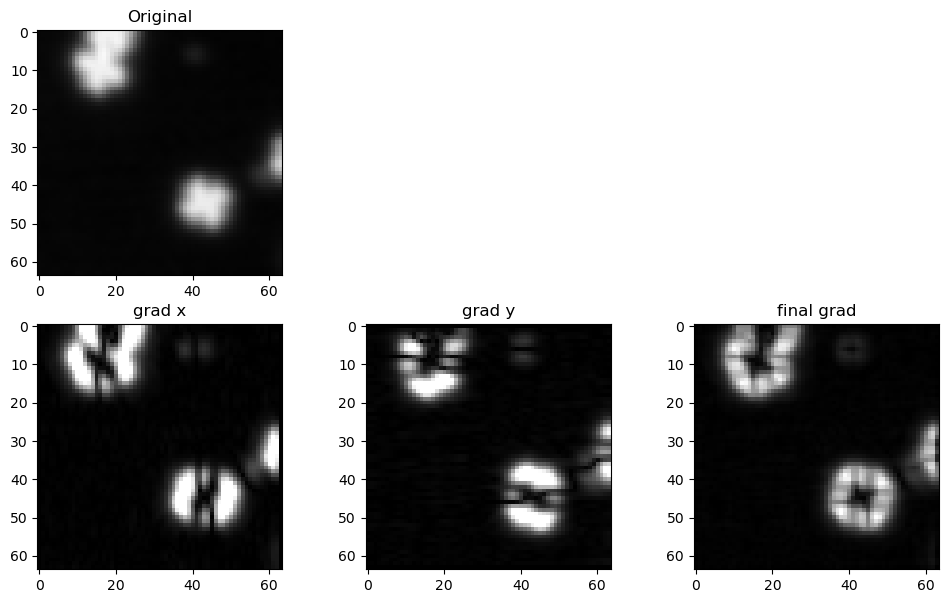

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


src = cv2.imread(r'D:\exam\test\otsu.jpg')

src = cv2.GaussianBlur(src, (3, 3), 0)

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)


grad_x = cv2.Sobel(gray, cv2.CV_16S, 1, 0, ksize=3)
grad_y = cv2.Sobel(gray, cv2.CV_16S, 0, 1, ksize=3)


abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)


plt.figure(figsize=[12,7])
plt.subplot(231);plt.imshow(src[...,::-1]);plt.title("Original");
plt.subplot(234);plt.imshow(abs_grad_x, cmap='gray');plt.title("grad x");
plt.subplot(235);plt.imshow(abs_grad_y, cmap='gray');plt.title("grad y");
plt.subplot(236);plt.imshow(grad, cmap='gray');plt.title("final grad");

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">استفاده از پارامتر دوم تابع filter2D برای نمایش قسمت منفی نتیجه فیلتر</div>

NameError: name 'print_min_and_max' is not defined

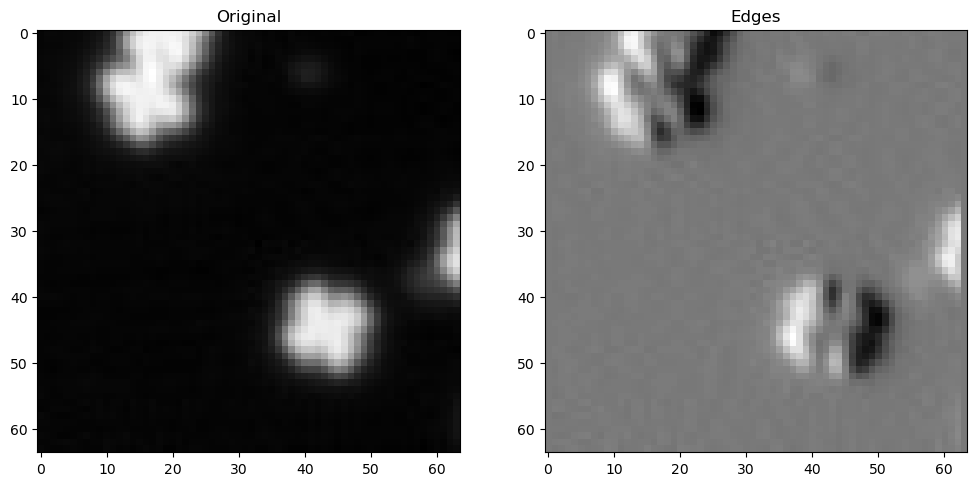

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread(r'D:\exam\test\otsu.jpg',0)

kernel = np.array([[0,0,0], 
                   [-1/2,0,1/2], 
                   [0,0,0]])


# Extract Sobl Edges
edges = cv2.filter2D(image, cv2.CV_64F , kernel)

plt.figure(figsize=[12,7])
plt.subplot(121);plt.imshow(image, cmap='gray');plt.title("Original");
plt.subplot(122);plt.imshow(edges, cmap='gray');plt.title("Edges");

print_min_and_max(image)
print_min_and_max(edges)

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لبه یابی با Sobel</div>
$$G_{x} = \begin{bmatrix} -1 & 0 & +1 \\ -2 & 0 & +2 \\ -1 & 0 & +1 \end{bmatrix} * I$$
$$G_{y} = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ +1 & +2 & +1 \end{bmatrix} * I$$

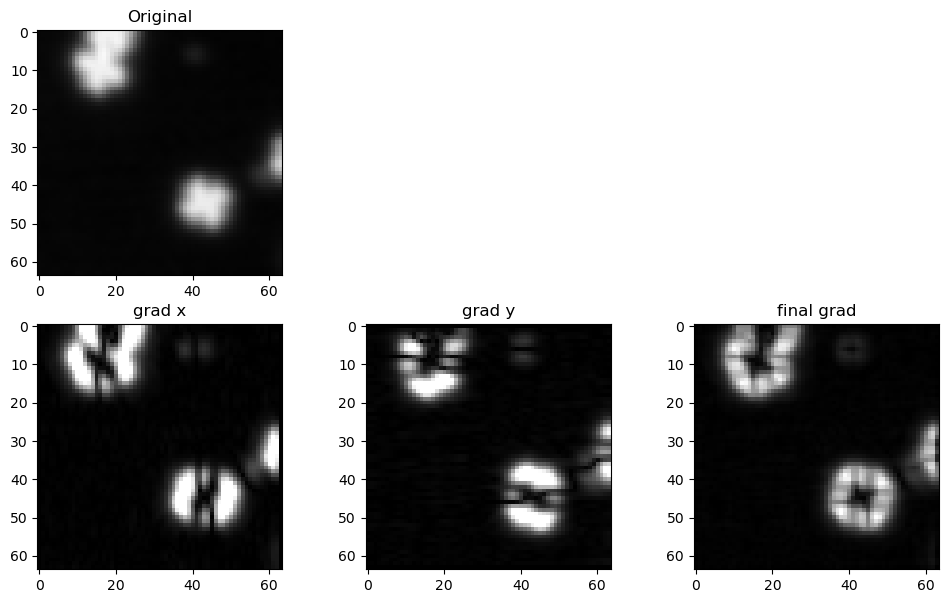

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


src = cv2.imread(r'D:\exam\test\otsu.jpg')

src = cv2.GaussianBlur(src, (3, 3), 0)

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)


grad_x = cv2.Sobel(gray, cv2.CV_16S, 1, 0, ksize=3)
grad_y = cv2.Sobel(gray, cv2.CV_16S, 0, 1, ksize=3)


abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)


plt.figure(figsize=[12,7])
plt.subplot(231);plt.imshow(src[...,::-1]);plt.title("Original");
plt.subplot(234);plt.imshow(abs_grad_x, cmap='gray');plt.title("grad x");
plt.subplot(235);plt.imshow(abs_grad_y, cmap='gray');plt.title("grad y");
plt.subplot(236);plt.imshow(grad, cmap='gray');plt.title("final grad");

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لبه یابی با Laplacian</div>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">
در نوت‌بوک قبلی از Sobel را دیدیم.
    <br/>
این روش بر مبنای این بود که در نواحی رخداد لبه، با تغییر ناگهانی در مقدار پیکسل های همجوار مواجه هستیم که با گرفتن مشتق اول، این تغییرات نمایان میشدند!
</div>

![sobel](lecture_images/Laplace_Operator_Tutorial_Theory_first_order.jpg "first order derivative")

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">
حالا اگر مشتق دوم را بگیریم چه اتفاقی می افتد؟
</div>

![sobel](lecture_images/Laplace_Operator_Tutorial_Theory_second-order.jpg "Second order derivative")

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">
مشاهده می‌شود که مشتق دوم صفر است!
<br />
بنابراین، می‌توانیم از این معیار هم برای شناسایی لبه‌ها در یک تصویر استفاده کنیم.
<br />
با این حال،  صفرها تنها در لبه ها ظاهر نمی‌شوند!
</div>

$$Laplace(f) = \dfrac{\partial^{2} f}{\partial x^{2}} + \dfrac{\partial^{2} f}{\partial y^{2}}$$

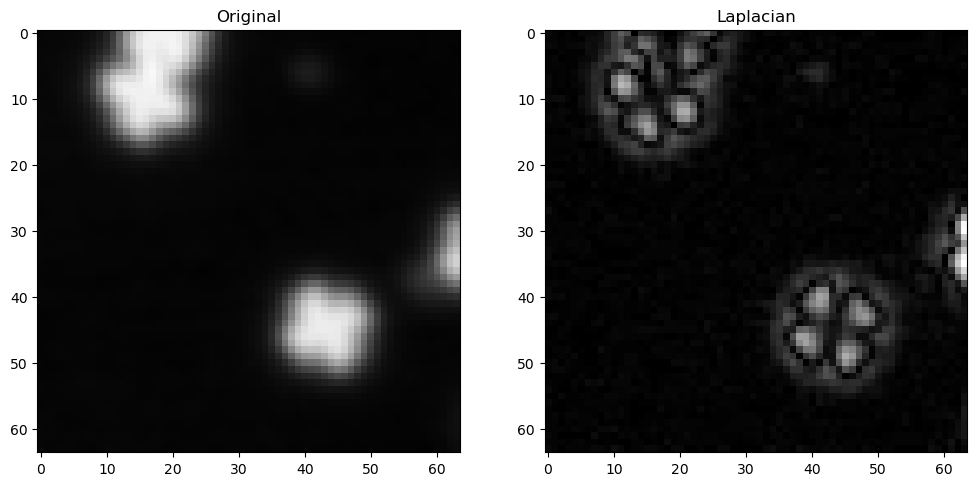

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


src = cv2.imread(r'D:\exam\test\otsu.jpg') 

# Remove noise by blurring with a Gaussian filter
src = cv2.GaussianBlur(src, (3, 3), 0)

src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

dst = cv2.Laplacian(src_gray, cv2.CV_16S, ksize=3)

abs_dst = cv2.convertScaleAbs(dst)


plt.figure(figsize=[12,7])
plt.subplot(121);plt.imshow(src[...,::-1]);plt.title("Original");
plt.subplot(122);plt.imshow(abs_dst, cmap='gray');plt.title("Laplacian");

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لبه یابی با Canny</div>

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">اعمال لبه یابی canny روی یک تصویر</div>

Text(0.5, 1.0, 'Edge Image')

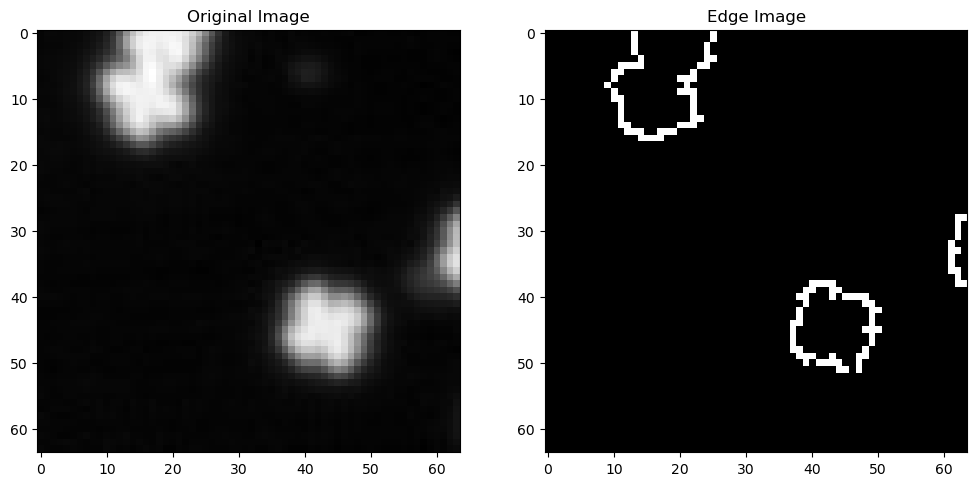

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=[12,7])
src = cv2.imread(r'D:\exam\test\otsu.jpg') 

edges = cv2.Canny(src,100,200)
plt.subplot(121),plt.imshow(src[...,::-1]);plt.title('Original Image')
plt.subplot(122),plt.imshow(edges,cmap = 'gray');plt.title('Edge Image')

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">تاثیر پارامتر ورودی تابع canny روی لبه ها</div>

# الگوریتم Canny

الگوریتم Canny علاوه بر استفاده از فیلترهای پردازش تصویر (مانند فیلتر گاوسی برای نرم‌سازی)، از روش‌های اضافی برای بهبود نتایج لبه‌یابی استفاده می‌کند. این مراحل شامل موارد زیر است:

## مراحل الگوریتم Canny برای بهبود لبه‌یابی:

### 1. حذف نویز (Noise Reduction)
- ابتدا تصویر با یک **فیلتر گاوسی** هموار می‌شود تا نویز کاهش یابد.

### 2. محاسبه گرادیان (Gradient Calculation)
- از عملگرهایی مانند **Sobel** (در جهت‌های x و y) برای محاسبه شدت و جهت گرادیان استفاده می‌کند.

### 3. سرکوب غیر بیشینه (Non-Maximum Suppression)
- لبه‌های ضخیم را به لبه‌های نازک تقلیل می‌دهد تا فقط پیکسل‌های با ماکزیمم گرادیان به عنوان لبه باقی بمانند.

### 4. آستانه‌گیری هیسترزیس (Hysteresis Thresholding)
- از **دو آستانه (بالا و پایین)** برای تفکیک لبه‌های قوی، ضعیف و نویز استفاده می‌کند:
  - پیکسل‌های با گرادیان بالاتر از آستانه بالا → لبه قطعی
  - پیکسل‌های بین دو آستانه → فقط اگر به لبه قطعی متصل باشند، حفظ می‌شوند
  - پیکسل‌های زیر آستانه پایین → حذف می‌شوند


## نتیجه‌گیری:
اگر به دنبال روشی هستید که **فراتر از فیلترهای ساده لبه‌یابی** عمل کند و از **الگوریتم‌های بهبود دهنده نتیجه** استفاده کند، **Canny** گزینه بهتری نسبت به Sobel و Prewitt است.

# Canny Edge Detection Algorithm

The Canny algorithm not only uses image processing filters (like Gaussian blur for smoothing) but also employs additional methods to improve edge detection results. The process includes the following steps:

## Steps of the Canny Algorithm for Enhanced Edge Detection:

### 1. Noise Reduction
- The image is first smoothed using a **Gaussian filter** to reduce noise.

### 2. Gradient Calculation
- Uses operators like **Sobel** (in x and y directions) to compute gradient magnitude and direction.

### 3. Non-Maximum Suppression
- Thins thick edges to retain only pixels with maximum gradient magnitude as potential edges.

### 4. Hysteresis Thresholding
- Applies **dual thresholds (high and low)** to classify edges:
  - Pixels with gradient > high threshold → Strong edges (kept)
  - Pixels between thresholds → Weak edges (kept only if connected to strong edges)
  - Pixels < low threshold → Suppressed (discarded)

## Comparison with Sobel and Prewitt:

- **Sobel** and **Prewitt** only use **derivative filters** (for gradient calculation) and lack additional steps like Non-Maximum Suppression or Hysteresis Thresholding.
- **Canny** produces **thinner, more accurate edges with less noise** due to these additional steps.

## Conclusion:
If you need an edge detection method that **goes beyond basic filters** and uses **result-enhancing algorithms**, **Canny** is superior to Sobel and Prewitt.

In [11]:
import cv2
import numpy as np

max_lowThreshold = 100
window_name = 'Edge Map'
title_trackbar = 'Min Threshold:'
ratio = 3
kernel_size = 3
def CannyThreshold(val):
    low_threshold = val
    img_blur = cv2.GaussianBlur(src_gray, (3,3), 0)
    detected_edges = cv2.Canny(img_blur, low_threshold, low_threshold*ratio, kernel_size)
    mask = detected_edges != 0
    dst = src * (mask[:,:,None].astype(src.dtype))
    cv2.imshow(window_name, dst)
    
src = cv2.imread(r'D:\exam\test\otsu.jpg')
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
cv2.namedWindow(window_name, cv2.WINDOW_GUI_EXPANDED)
cv2.createTrackbar(title_trackbar, window_name , 0, max_lowThreshold, CannyThreshold)
CannyThreshold(0)
cv2.waitKey()
cv2.destroyAllWindows()

In [13]:
def variance_of_laplacian(image):
    # compute the Laplacian of the image and then return the focus
    # measure, which is simply the variance of the Laplacian
    return cv2.Laplacian(image, cv2.CV_64F).var()

import cv2
import numpy as np
import matplotlib.pyplot as plt



image2 = cv2.imread(r'D:\exam\test\otsu.jpg',0)


metric_image2 = variance_of_laplacian(image2)

plt.figure(figsize=[12,7])

plt.subplot(122);plt.imshow(image2, cmap='gray');plt.title(metric_image2);


# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">تشخیص خط با Hough Transform</div>

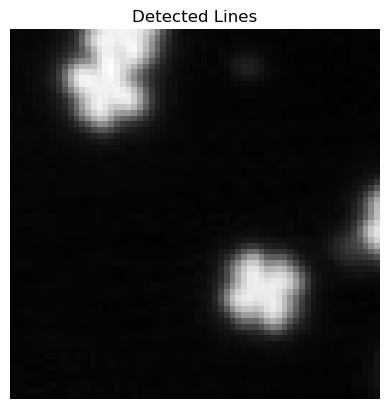

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread(r'D:\exam\test\otsu.jpg')
if img is None:
    raise FileNotFoundError("Image not found at the specified path")

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Edge detection with Canny
edges = cv2.Canny(gray, 50, 150)

# Line detection with Hough Transform
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

# Check if lines were detected
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        
        # Calculate line endpoints
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        
        # Draw the line on the original image
        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
else:
    print("Warning: No lines were detected")
    # Optional: You can display the edges instead
    # plt.imshow(edges, cmap='gray')
    # plt.title("Edge Map (No Lines Detected)")
    # plt.show()

# Display the result
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Proper conversion for matplotlib
plt.title("Detected Lines")
plt.axis('off')
plt.show()

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">در ابتدا تصویر را باینری میکنیم</div>

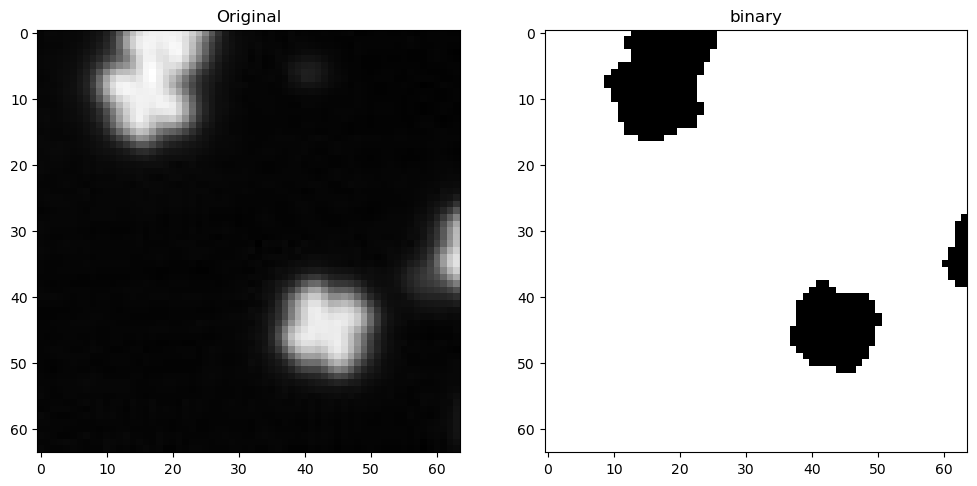

In [1]:
# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
image = cv2.imread(r'D:\exam\test\otsu.jpg')


# Convert BGR back to grayscale:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold via Otsu:
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.figure(figsize=[12,7])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(122);plt.imshow(binary, cmap='gray');plt.title("binary");

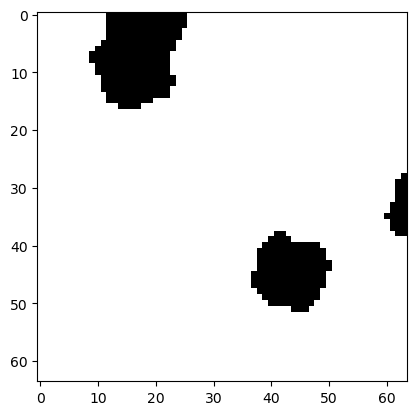

In [4]:
# Get the structuring element:
structuringElement = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, structuringElement)
plt.imshow(opening, cmap='gray')

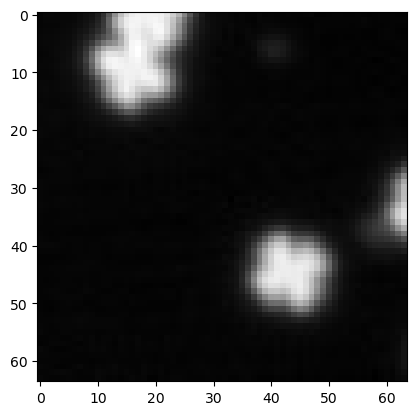

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Loads an image
src = cv2.imread(r'D:\exam\test\otsu.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 5)

rows = gray.shape[0]
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, rows / 8, param1=100, param2=30)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for c in circles[0, :]:
        center_x,center_y, radius = c
        center = (center_x,center_y)
        cv2.circle(src, center, radius, (255, 0, 255), 3) #outline
plt.imshow(src[...,::-1])

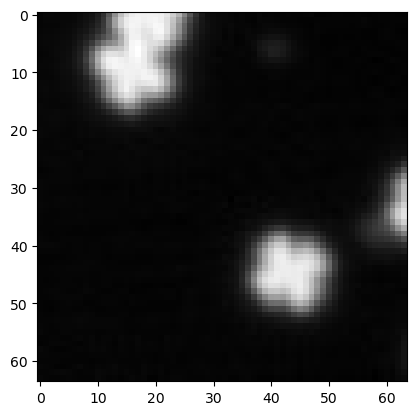

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Loads an image
src = cv2.imread(r'D:\exam\test\otsu.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 5)

rows = gray.shape[0]
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, rows / 8,
                           param1=100, param2=30)


if circles is not None:
    print("Number of coins:",len(circles[0,:]))
    circles = np.uint16(np.around(circles))
    for c in circles[0, :]:
        center_x,center_y, radius = c
        center = (center_x,center_y)
        cv2.circle(src, center, 1, (0, 100, 100), 3) #center
        cv2.circle(src, center, radius, (255, 0, 255), 3) #outline
plt.imshow(src[...,::-1]);

TypeError: 'NoneType' object is not subscriptable

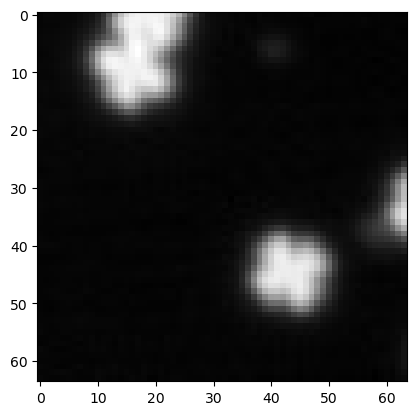

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Loads an image
src = cv2.imread(r'D:\exam\test\otsu.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 5)

rows = gray.shape[0]
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, rows / 8,
                           param1=100, param2=30,
                           minRadius=50, maxRadius=100)


if circles is not None:
    circles = np.uint16(np.around(circles))
    for c in circles[0, :]:
        center_x,center_y, radius = c
        center = (center_x,center_y)
        cv2.circle(src, center, 1, (0, 100, 100), 3) #center
        cv2.circle(src, center, radius, (255, 0, 255), 3) #outline
plt.imshow(src[...,::-1])
print("Number of coins:",len(circles[0,:]))

In [10]:
def generalized_Hough():
    img = cv2.imread(r'D:\exam\test\otsu.jpg')
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    template = cv2.imread("template.png")
    height, width = template.shape[:2]

    edges = cv2.Canny(template, 200, 250)
    ght = cv2.createGeneralizedHoughGuil()
    ght.setTemplate(edges)

    ght.setMinDist(100)
    ght.setMinAngle(0)
    ght.setMaxAngle(360)
    ght.setAngleStep(1)
    ght.setLevels(360)
    ght.setMinScale(1)
    ght.setMaxScale(1.3)
    ght.setScaleStep(0.05)
    ght.setAngleThresh(100)
    ght.setScaleThresh(100)
    ght.setPosThresh(100)
    ght.setAngleEpsilon(1)
    ght.setLevels(360)
    ght.setXi(90)

    positions = ght.detect(img_gray)[0][0]

    for position in positions:
        center_col = int(position[0])
        center_row = int(position[1])
        scale = position[2]
        angle = int(position[3])

        found_height = int(height * scale)
        found_width = int(width * scale)

        rectangle = ((center_col, center_row),
                     (found_width, found_height),
                     angle)

        box = cv2.boxPoints(rectangle)
        box = np.int0(box)
        cv2.drawContours(img, [box], 0, (0, 0, 255), 2)

        for i in range(-2, 3):
            for j in range(-2, 3):
                img[center_row + i, center_col + j] = 0, 0, 255

    cv2.imwrite("results.png", img)

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">پیدا کردن گوشه‌ها با روش Harris</div>

OpenCV has the function ``cv.cornerHarris()`` for this purpose. Its arguments are:

    img - Input image. It should be grayscale and float32 type.
    blockSize - It is the size of neighbourhood considered for corner detection
    ksize - Aperture parameter of the Sobel derivative used.
    k - Harris detector free parameter in the equation.

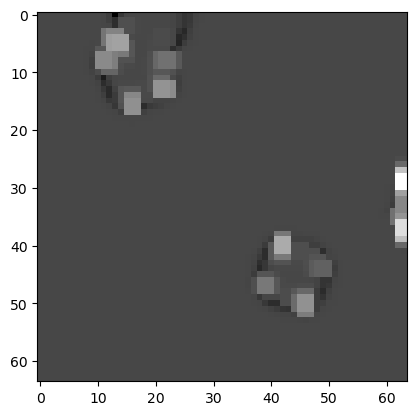

In [23]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

img = cv2.imread(r'D:\exam\test\otsu.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None, iterations=5)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
plt.imshow(img, cmap='gray');

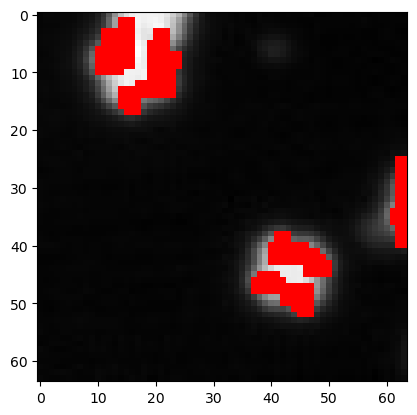

In [2]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

img = cv2.imread(r'D:\exam\test\otsu.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None, iterations=1)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
plt.imshow(img[...,::-1]);

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">پیدا کردن گوشه‌ها با روش Shi-Tomasi</div>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">در نوت‌بوک قبلی روش Harris برای پیدا کردن گوشه ها را مشاهده کردیم، بعد از معرفی این روش، چند سال بعد در سال 1994 میلادی دو محقق با نامهای  Shi و Tomasi به کمی تغییرات در روش Harris در مقاله ای تحت عنوان Good Features to Track  به دقت بهتر دست یافتند.
<br/>
تابع امتیاز دهی در آشکارساز گوشه هریس توسط:
</div>

$$R = \lambda_1 \lambda_2 - k(\lambda_1+\lambda_2)^2$$

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">که این دو محقق با بازنگری در این تابع امتیاز دهی به جای فرمول بالا از فرول زیر استفاده کردند:
</div>

$$R = \min(\lambda_1, \lambda_2)$$

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">که مثل سابق، اگر مقدار این تابع بیشتر از حد آستانه باشد، گوشه محسوب می شود.
</div>

<img src="./lecture_images/shitomasi_space.png" />

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">
که طبق تصویر ناحیه‌ی سبز رنگ به معنای این است که هم 
$\lambda_1$
و هم
$\lambda_2$
بالای حد آستانه هستند که به معنی وجود گوشه است!
</div>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">
در OpenCV این روش در تابع goodFeaturesToTrack پیاده سازی شده است. <br/>
این تابع به عنوان پارامتر ورودی روش گوشه یابی را از شما دریافت کرده (Shi-Tomasi  یا تشخیص گوشه هریس، اگر مشخص کنید) و سپس N گوشه قوی تر(بزرگترین اعداد متریک بالا) را پیدا می کند. 
طبق معمول، تصویر باید یک تصویر سطح-خاکستری باشد. 
سپس تعداد گوشه هایی را که می خواهید پیدا کنید مشخص می کنید. 
سپس سطح کیفیت را مشخص می‌کنید که مقداری بین 0-1 است که نشان‌دهنده حداقل کیفیت گوشه‌ای است که زیر آن همه رد می‌شوند. 
سپس حداقل فاصله اقلیدسی بین گوشه های شناسایی شده را ارائه می کنیم.
</div>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">
برای مثال در کد زیر تلاش میکنیم که 25 گوشه برتر را پیدا کنیم:
</div>

C:\Users\Matin\AppData\Local\Temp\ipykernel_15940\680088907.py:8: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


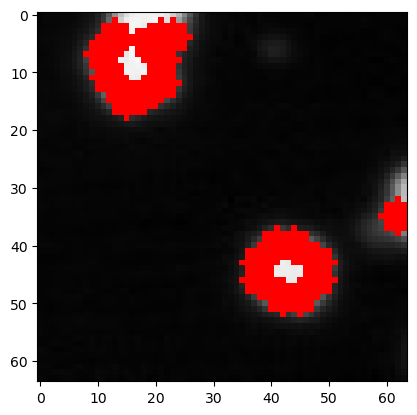

In [31]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(r'D:\exam\test\otsu.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
corners = cv2.goodFeaturesToTrack(gray,25,0.09,1)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,255,-1)
plt.imshow(img),plt.show();

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">تفاوت گاوسی یا Difference of Gaussians</div>

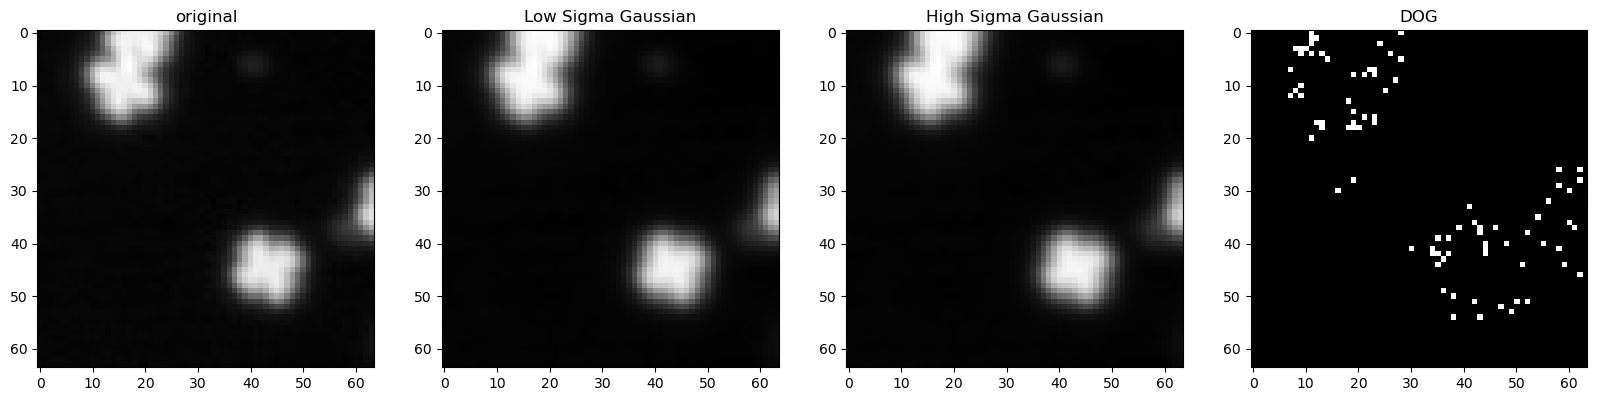

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread(r'D:\exam\test\otsu.jpg', 0)

# Apply Gaussian blur with different Sigma
low_sigma = cv2.GaussianBlur(img,(3,3),2)
high_sigma = cv2.GaussianBlur(img,(3,3),6)

# Calculate the DoG by subtracting
dog = low_sigma - high_sigma


plt.figure(figsize=[20,5])
plt.subplot(141),plt.imshow(img, cmap='gray'),plt.title('original');
plt.subplot(142),plt.imshow(low_sigma, cmap='gray'),plt.title('Low Sigma Gaussian');
plt.subplot(143),plt.imshow(high_sigma, cmap='gray'),plt.title('High Sigma Gaussian');
plt.subplot(144),plt.imshow(dog, cmap='gray'),plt.title('DOG');

In [3]:
import numpy as np
data = np.load(r'D:\exam\Datrix\assignmnet\stm-data\stm-data\Train\0006_molecules1.npy')
print(data.shape)  # بررسی ابعاد آرایه
print(data)        # نمایش داده‌ها

(64, 64)
[[-2.63650083e-12 -6.15175093e-12 -7.61353253e-12 ... -4.64909445e-13
  -1.57141967e-12 -4.53955187e-12]
 [ 7.94982027e-13 -3.43791624e-12 -6.90342835e-12 ... -3.13698869e-12
  -5.08193934e-12 -7.92927927e-12]
 [ 2.80537941e-12 -2.62123065e-12 -5.49699229e-12 ... -6.10039045e-12
  -7.61901547e-12 -9.52133356e-12]
 ...
 [ 1.23259131e-10  1.16759601e-10  1.07233160e-10 ... -5.09597828e-12
  -5.17930697e-12 -3.65680907e-12]
 [ 1.15932997e-10  1.08495551e-10  9.88198951e-11 ... -6.34697205e-12
  -6.46582788e-12 -5.42649904e-12]
 [ 1.12777748e-10  1.07287190e-10  9.78246967e-11 ... -7.22848360e-12
  -5.96178109e-12 -5.78931439e-12]]


In [7]:
import numpy as np

data = np.load(r'D:\exam\Datrix\assignmnet\stm-data\stm-data\Train\0006_molecules1.npy', allow_pickle=True)

# بررسی ابعاد و نوع داده
print("Shape:", data.shape)  # ابعاد آرایه
print("Data Type:", data.dtype)  # نوع داده (مثلاً float32, int64, object و...)

Shape: (64, 64)
Data Type: float64


In [8]:
# اگر داده یک دیکشنری باشد (مثلاً ذخیره‌شده با np.save روی یک dict)
if isinstance(data, np.ndarray) and data.dtype == object:
    try:
        data_dict = data.item()  # تبدیل به دیکشنری پایتون (اگر امکان‌پذیر باشد)
        print("Keys in the dictionary:", data_dict.keys())  # نمایش کلیدها
    except:
        print("Data is not a dictionary or structured object.")

# اگر داده یک آرایه ساختاریافته (structured array) باشد
elif data.dtype.names is not None:
    print("Structured array fields:", data.dtype.names)  # نام فیلدها
else:
    print("Data is a plain NumPy array with no keys/fields.")

Data is a plain NumPy array with no keys/fields.


In [9]:
# اگر داده یک دیکشنری باشد (مثلاً ذخیره‌شده با np.save روی یک dict)
if isinstance(data, np.ndarray) and data.dtype == object:
    try:
        data_dict = data.item()  # تبدیل به دیکشنری پایتون (اگر امکان‌پذیر باشد)
        print("Keys in the dictionary:", data_dict.keys())  # نمایش کلیدها
    except:
        print("Data is not a dictionary or structured object.")

# اگر داده یک آرایه ساختاریافته (structured array) باشد
elif data.dtype.names is not None:
    print("Structured array fields:", data.dtype.names)  # نام فیلدها
else:
    print("Data is a plain NumPy array with no keys/fields.")

Data is a plain NumPy array with no keys/fields.


In [10]:
# نمایش ۵ عنصر اول (اگر آرایه ۱بعدی باشد)
if len(data.shape) == 1:
    print("First 5 elements:", data[:5])
# نمایش ۲ سطر و ۲ ستون اول (اگر آرایه ۲بعدی باشد)
elif len(data.shape) == 2:
    print("First 2x2 slice:\n", data[:2, :2])

First 2x2 slice:
 [[-2.63650083e-12 -6.15175093e-12]
 [ 7.94982027e-13 -3.43791624e-12]]


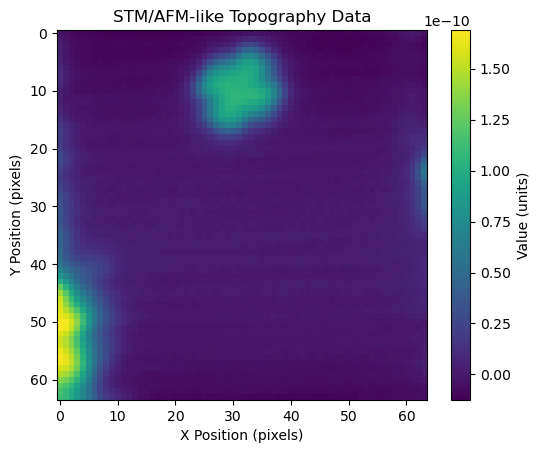

In [11]:
import matplotlib.pyplot as plt

# بارگذاری داده
data = np.load(r'D:\exam\Datrix\assignmnet\stm-data\stm-data\Train\0006_molecules1.npy')

# رسم داده‌ها با برچسب محورها
plt.imshow(data, cmap='viridis')  # یا cmap='hot' برای داده‌های STM
plt.colorbar(label='Value (units)')  # واحد داده‌ها (مثلاً nm, mV, etc.)
plt.xlabel('X Position (pixels)')
plt.ylabel('Y Position (pixels)')
plt.title('STM/AFM-like Topography Data')
plt.show()

In [12]:
print("Min value:", np.min(data))
print("Max value:", np.max(data))
print("Mean:", np.mean(data))
print("Standard Deviation:", np.std(data))

Min value: -1.2408430758246066e-11
Max value: 1.6889948359077394e-10
Mean: 7.325466811400674e-12
Standard Deviation: 2.6388732160252754e-11


In [13]:
# پیدا کردن موقعیت پیک‌ها (نقاط با بیشترین مقدار)
peaks = np.where(data > np.mean(data) + 2 * np.std(data))  # آستانه‌گیری
print("Peak positions (Y, X):", list(zip(peaks[0], peaks[1])))

Peak positions (Y, X): [(4, 32), (4, 33), (4, 34), (5, 30), (5, 31), (5, 32), (5, 33), (5, 34), (5, 35), (6, 27), (6, 28), (6, 29), (6, 30), (6, 31), (6, 32), (6, 33), (6, 34), (6, 35), (7, 26), (7, 27), (7, 28), (7, 29), (7, 30), (7, 31), (7, 32), (7, 33), (7, 34), (7, 35), (8, 25), (8, 26), (8, 27), (8, 28), (8, 29), (8, 30), (8, 31), (8, 32), (8, 33), (8, 34), (8, 35), (8, 36), (9, 25), (9, 26), (9, 27), (9, 28), (9, 29), (9, 30), (9, 31), (9, 32), (9, 33), (9, 34), (9, 35), (9, 36), (10, 25), (10, 26), (10, 27), (10, 28), (10, 29), (10, 30), (10, 31), (10, 32), (10, 33), (10, 34), (10, 35), (10, 36), (10, 37), (11, 26), (11, 27), (11, 28), (11, 29), (11, 30), (11, 31), (11, 32), (11, 33), (11, 34), (11, 35), (11, 36), (11, 37), (12, 26), (12, 27), (12, 28), (12, 29), (12, 30), (12, 31), (12, 32), (12, 33), (12, 34), (12, 35), (12, 36), (13, 26), (13, 27), (13, 28), (13, 29), (13, 30), (13, 31), (13, 32), (13, 33), (13, 34), (13, 35), (13, 36), (14, 27), (14, 28), (14, 29), (14, 30)

In [15]:
np.savez(
    'labeled_data.npz',
    topography=data,
    description="STM Topography Data (64x64), units: arbitrary",
    x_axis="X Position (nm)",
    y_axis="Y Position (nm)"
)

In [16]:
np.savez(
    'labeled_data.npz',
    topography=data,
    description="STM Topography Data (64x64), units: arbitrary",
    x_axis="X Position (nm)",
    y_axis="Y Position (nm)"
)

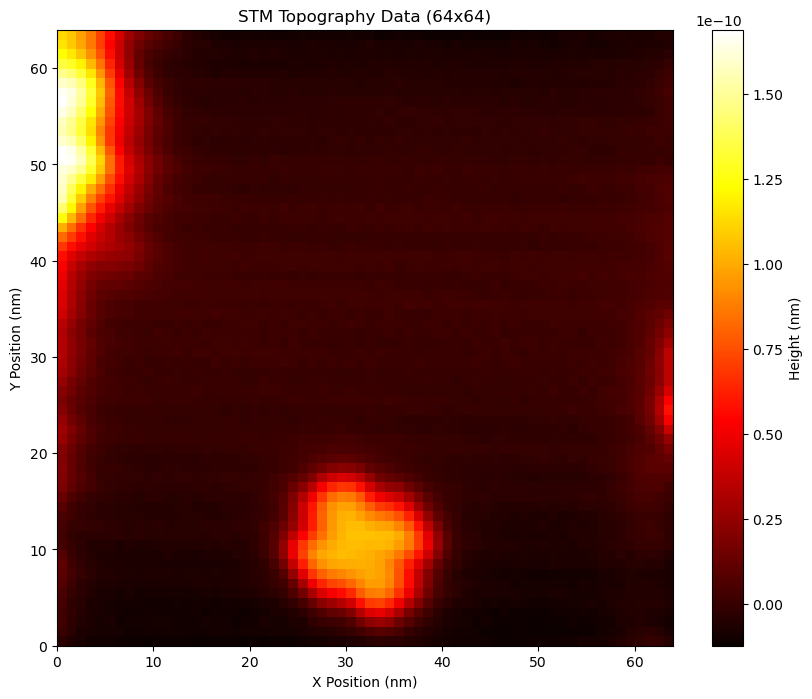

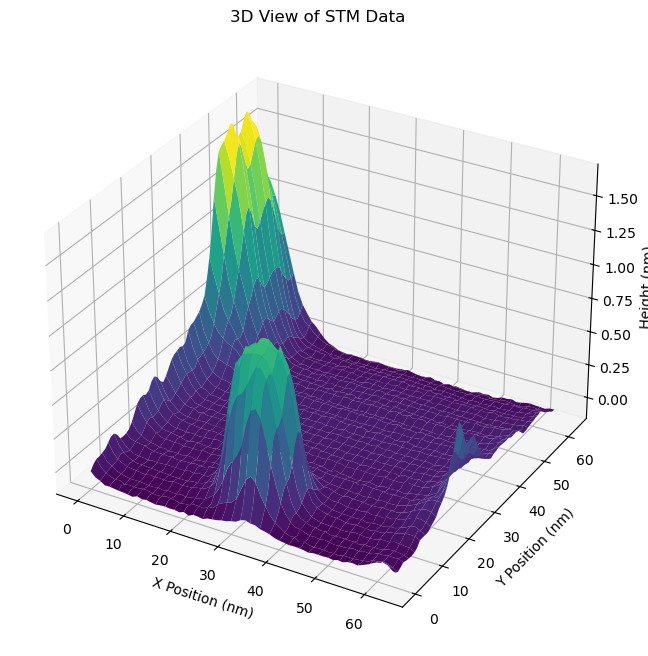

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = np.load(r'D:\exam\Datrix\assignmnet\stm-data\stm-data\Train\0006_molecules1.npy')

# Heatmap با جزئیات بیشتر
plt.figure(figsize=(10, 8))
plt.imshow(data, cmap='hot', origin='lower', extent=[0, 64, 0, 64])
plt.colorbar(label='Height (nm)')
plt.xlabel('X Position (nm)')
plt.ylabel('Y Position (nm)')
plt.title('STM Topography Data (64x64)')
plt.show()

# نمودار 3D برای مشاهده برجستگی‌ها
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
x, y = np.meshgrid(np.arange(64), np.arange(64))
ax.plot_surface(x, y, data, cmap='viridis')
ax.set_xlabel('X Position (nm)')
ax.set_ylabel('Y Position (nm)')
ax.set_zlabel('Height (nm)')
plt.title('3D View of STM Data')
plt.show()

C:\Users\Matin\AppData\Local\Temp\ipykernel_31960\378160133.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


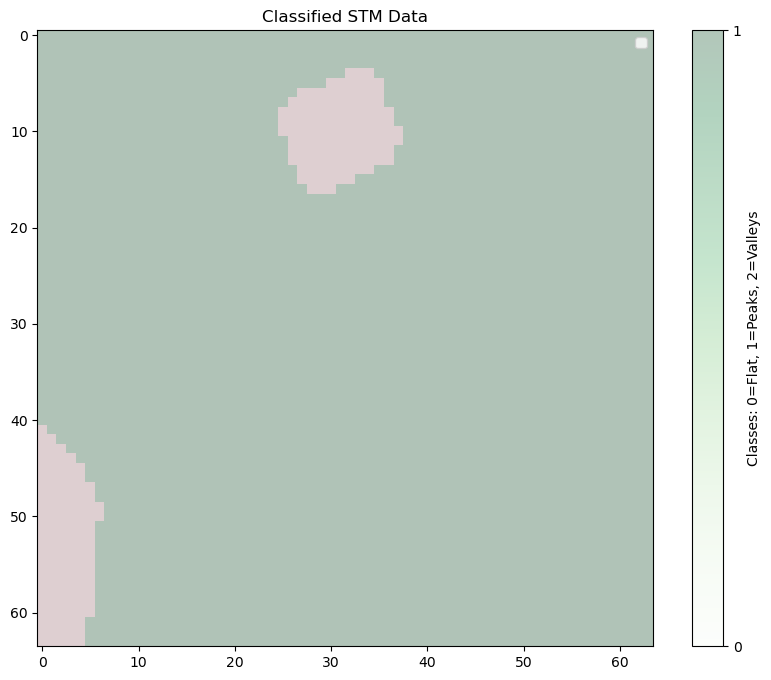

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# بارگذاری داده (اگر قبلاً انجام نشده)
data = np.load(r'D:\exam\Datrix\assignmnet\stm-data\stm-data\Train\0006_molecules1.npy')

# آستانه‌گذاری برای کلاسبندی
threshold_high = np.mean(data) + 2 * np.std(data)  # پیک‌ها
threshold_low = np.mean(data) - 2 * np.std(data)  # دره‌ها

# ایجاد ماسک برای کلاس‌ها
peaks = data > threshold_high
valleys = data < threshold_low
flat = ~peaks & ~valleys

# نمایش کلاس‌ها
plt.figure(figsize=(10, 8))
plt.imshow(peaks, cmap='Reds', alpha=0.5, label='Peaks')
plt.imshow(valleys, cmap='Blues', alpha=0.5, label='Valleys')
plt.imshow(flat, cmap='Greens', alpha=0.3, label='Flat')
plt.colorbar(ticks=[0, 1, 2], label='Classes: 0=Flat, 1=Peaks, 2=Valleys')
plt.title('Classified STM Data')
plt.legend()
plt.show()

In [26]:
pip install numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


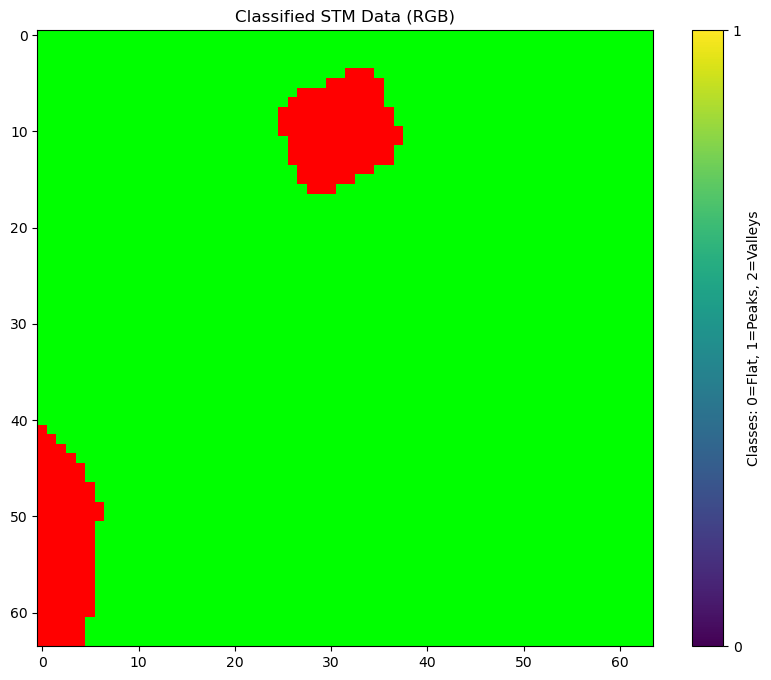

In [27]:
# ایجاد تصویر ترکیبی RGB
classified_image = np.zeros((data.shape[0], data.shape[1], 3))  # تصویر سیاه
classified_image[peaks] = [1, 0, 0]  # قرمز برای پیک‌ها
classified_image[valleys] = [0, 0, 1]  # آبی برای دره‌ها
classified_image[flat] = [0, 1, 0]  # سبز برای مناطق مسطح

plt.figure(figsize=(10, 8))
plt.imshow(classified_image)
plt.colorbar(ticks=[0, 1, 2], label='Classes: 0=Flat, 1=Peaks, 2=Valleys')
plt.title('Classified STM Data (RGB)')
plt.show()

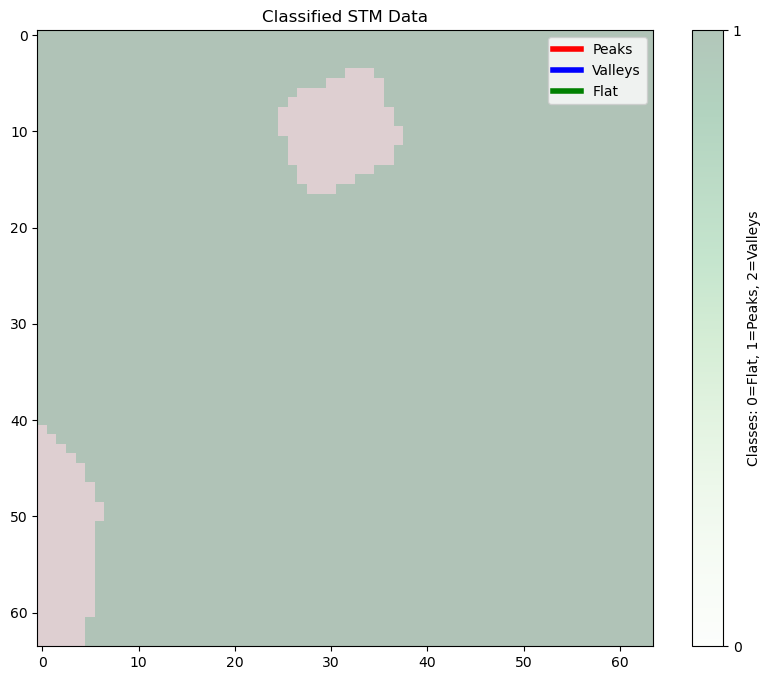

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# بارگذاری داده (اگر قبلاً انجام نشده)
data = np.load(r'D:\exam\Datrix\assignmnet\stm-data\stm-data\Train\0006_molecules1.npy')

# آستانه‌گذاری برای کلاسبندی
threshold_high = np.mean(data) + 2 * np.std(data)  # پیک‌ها
threshold_low = np.mean(data) - 2 * np.std(data)  # دره‌ها

# ایجاد ماسک برای کلاس‌ها
peaks = data > threshold_high
valleys = data < threshold_low
flat = ~peaks & ~valleys

# نمایش کلاس‌ها
plt.figure(figsize=(10, 8))
plt.imshow(peaks, cmap='Reds', alpha=0.5)
plt.imshow(valleys, cmap='Blues', alpha=0.5)
plt.imshow(flat, cmap='Greens', alpha=0.3)

# اضافه کردن لegend به صورت دستی
legend_elements = [
    Line2D([0], [0], color='red', lw=4, label='Peaks'),
    Line2D([0], [0], color='blue', lw=4, label='Valleys'),
    Line2D([0], [0], color='green', lw=4, label='Flat')
]
plt.legend(handles=legend_elements, loc='upper right')

plt.colorbar(ticks=[0, 1, 2], label='Classes: 0=Flat, 1=Peaks, 2=Valleys')
plt.title('Classified STM Data')
plt.show()

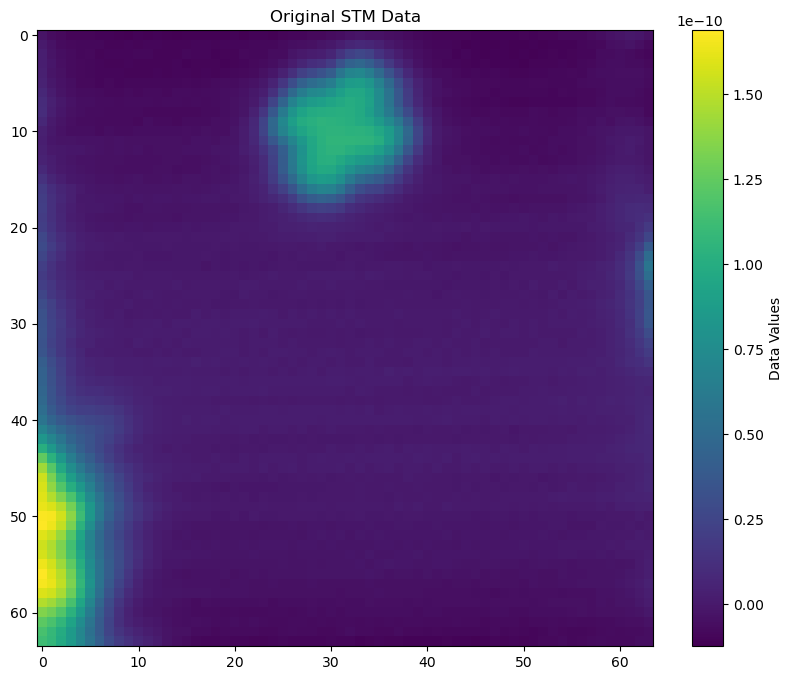

Mean: 7.325466811400674e-12
Standard Deviation: 2.6388732160252754e-11
Threshold High: 6.010293113190619e-11
Threshold Low: -4.545199750910483e-11


In [33]:
# نمایش داده‌های اصلی
plt.figure(figsize=(10, 8))
plt.imshow(data, cmap='viridis')
plt.colorbar(label='Data Values')
plt.title('Original STM Data')
plt.show()

# نمایش میانگین و انحراف معیار
print("Mean:", np.mean(data))
print("Standard Deviation:", np.std(data))
print("Threshold High:", threshold_high)
print("Threshold Low:", threshold_low)

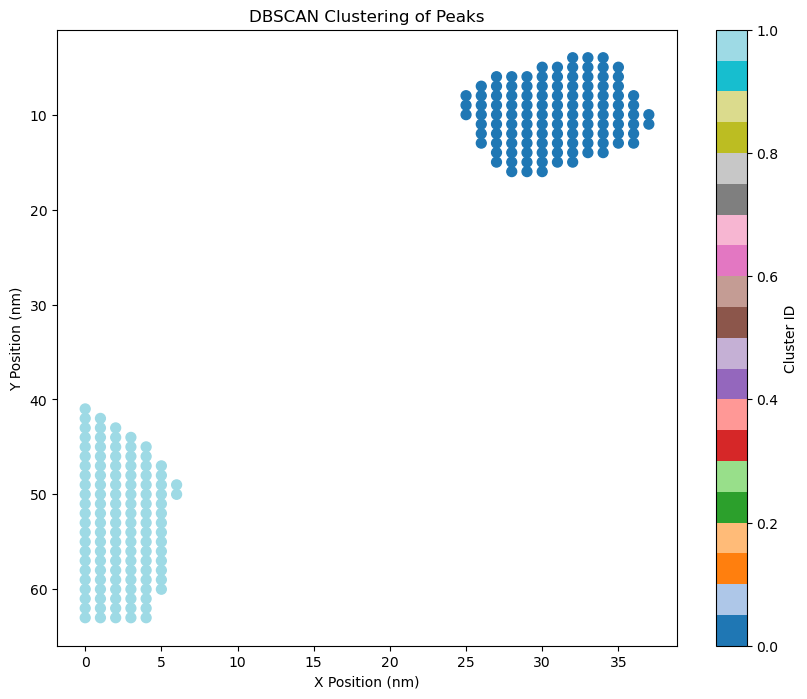

In [31]:
from sklearn.cluster import DBSCAN

# پیدا کردن مختصات پیک‌ها
peak_coords = np.column_stack(np.where(peaks))

# خوشه‌بندی
clustering = DBSCAN(eps=2, min_samples=3).fit(peak_coords)
labels = clustering.labels_

# نمایش خوشه‌ها
plt.figure(figsize=(10, 8))
plt.scatter(peak_coords[:, 1], peak_coords[:, 0], c=labels, cmap='tab20', s=50)
plt.colorbar(label='Cluster ID')
plt.gca().invert_yaxis()  # برای تطابق با تصویر STM
plt.xlabel('X Position (nm)')
plt.ylabel('Y Position (nm)')
plt.title('DBSCAN Clustering of Peaks')
plt.show()

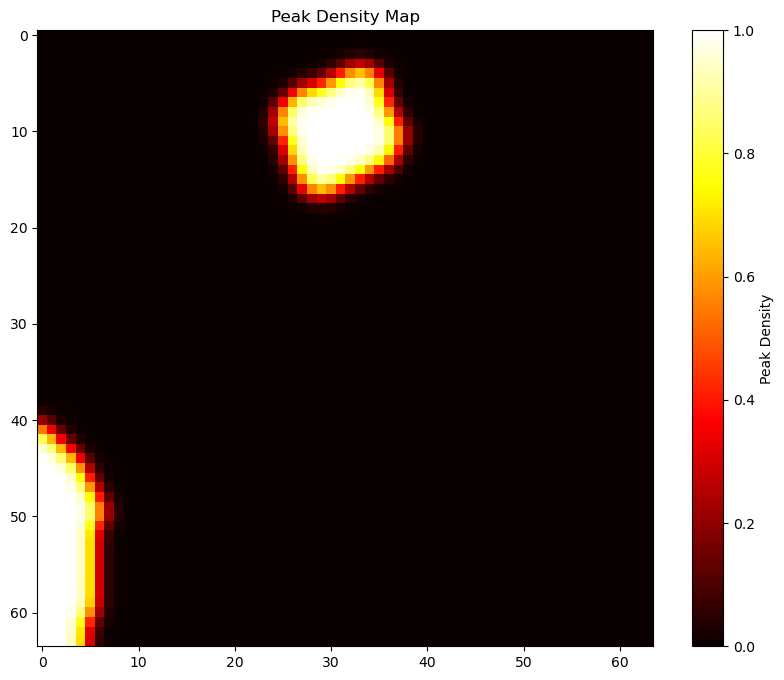

In [29]:
from scipy.ndimage import gaussian_filter

# محاسبه چگالی پیک‌ها
density = np.zeros_like(data, dtype=float)
density[peaks] = 1
density_smoothed = gaussian_filter(density, sigma=1)

plt.figure(figsize=(10, 8))
plt.imshow(density_smoothed, cmap='hot', interpolation='nearest')
plt.colorbar(label='Peak Density')
plt.title('Peak Density Map')
plt.show()

In [25]:
# تعداد پیک‌ها
n_peaks = np.sum(peaks)
# میانگین ارتفاع پیک‌ها
mean_peak_height = np.mean(data[peaks])
# مساحت مناطق پرتراکم
dense_area = np.sum(density_smoothed > 0.5)

print(f"""
Analysis Report:
- Total Peaks: {n_peaks}
- Mean Peak Height: {mean_peak_height:.2e} nm
- Dense Area: {dense_area} pixels
""")


Analysis Report:
- Total Peaks: 237
- Mean Peak Height: 1.02e-10 nm
- Dense Area: 237 pixels



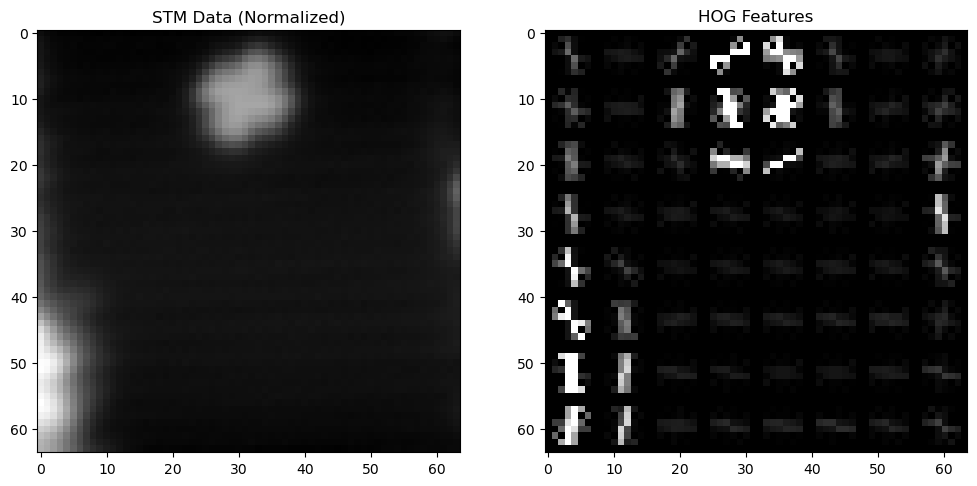

تعداد ویژگی‌های استخراج‌شده: 1568
مقدار نمونه ویژگی‌ها (5 مورد اول): [0.18813661 0.02804575 0.         0.         0.28949381]


In [58]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure

# بارگذاری داده
data = np.load(r'D:\exam\Datrix\assignmnet\stm-data\stm-data\Train\0006_molecules1.npy')

# نرمال‌سازی داده‌ها برای محدوده [0, 255] (الزامی برای HOG)
data_normalized = ((data - np.min(data)) / (np.max(data) - np.min(data))) * 255
data_normalized = data_normalized.astype(np.uint8)  # تبدیل به uint8 برای HOG

# محاسبه HOG
features, hog_image = hog(
    data_normalized,
    orientations=8,           # تعداد جهت‌گرادیان‌ها (مثلاً 8 جهت)
    pixels_per_cell=(8, 8),    # اندازه سلول‌ها (پیکسل)
    cells_per_block=(2, 2),    # اندازه بلوک‌ها (سلول)
    visualize=True,            # خروجی تصویر HOG
    channel_axis=None          # چون داده تک‌کاناله است
)

# بهبود کنتراست تصویر HOG برای نمایش بهتر
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# نمایش نتایج
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(data_normalized, cmap='gray')
ax1.set_title('STM Data (Normalized)')
ax2.imshow(hog_image_rescaled, cmap='gray')
ax2.set_title('HOG Features')
plt.show()

print(f"تعداد ویژگی‌های استخراج‌شده: {len(features)}")
print(f"مقدار نمونه ویژگی‌ها (5 مورد اول): {features[:5]}")

In [59]:
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt

param_grid = {
    'orientations': [6, 8, 9, 12],
    'pixels_per_cell': [(6,6), (8,8), (12,12)],
    'cells_per_block': [(1,1), (2,2), (3,3)]
}

best_params = None
best_contrast = -1

for params in ParameterGrid(param_grid):
    features, hog_img = hog(
        data_normalized,
        orientations=params['orientations'],
        pixels_per_cell=params['pixels_per_cell'],
        cells_per_block=params['cells_per_block'],
        visualize=True,
        channel_axis=None
    )
    
    # معیار ارزیابی: کنتراست تصویر HOG (هرچه بالاتر بهتر)
    current_contrast = np.std(hog_img)
    
    if current_contrast > best_contrast:
        best_contrast = current_contrast
        best_params = params

print("بهترین پارامترها:", best_params)

بهترین پارامترها: {'cells_per_block': (1, 1), 'orientations': 6, 'pixels_per_cell': (6, 6)}


In [64]:
import numpy as np
from skimage.feature import hog
from skimage.transform import rescale  # اضافه کردن این import
from skimage import exposure

# بارگذاری و نرمال‌سازی داده (اگر قبلاً انجام نشده)
data = np.load(r'D:\exam\Datrix\assignmnet\stm-data\stm-data\Train\0006_molecules1.npy')
data_normalized = ((data - np.min(data)) / (np.max(data) - np.min(data))) * 255
data_normalized = data_normalized.astype(np.uint8)

# تنظیم پارامترهای چندمقیاسی
scales = [0.8, 1.0, 1.2]  # مقیاس‌های مختلف
hog_features = []

for scale in scales:
    # تغییر اندازه تصویر با تابع rescale
    resized = rescale(data_normalized, scale, mode='reflect', anti_aliasing=True)
    
    # محاسبه HOG برای تصویر تغییر اندازه یافته
    features = hog(
        resized,
        orientations=9,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        visualize=False,
        channel_axis=None
    )
    hog_features.append(features)

# ادغام ویژگی‌های تمام مقیاس‌ها
final_features = np.concatenate(hog_features)
print(f"تعداد کل ویژگی‌های استخراج‌شده: {len(final_features)}")

تعداد کل ویژگی‌های استخراج‌شده: 4968


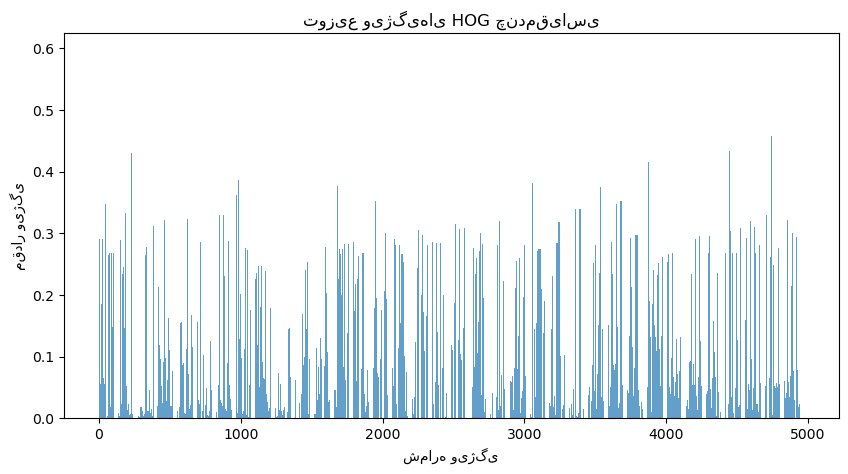

In [65]:
# نمایش ویژگی‌های استخراج‌شده
plt.figure(figsize=(10, 5))
plt.bar(range(len(final_features)), final_features, alpha=0.7)
plt.xlabel('شماره ویژگی')
plt.ylabel('مقدار ویژگی')
plt.title('توزیع ویژگی‌های HOG چندمقیاسی')
plt.show()

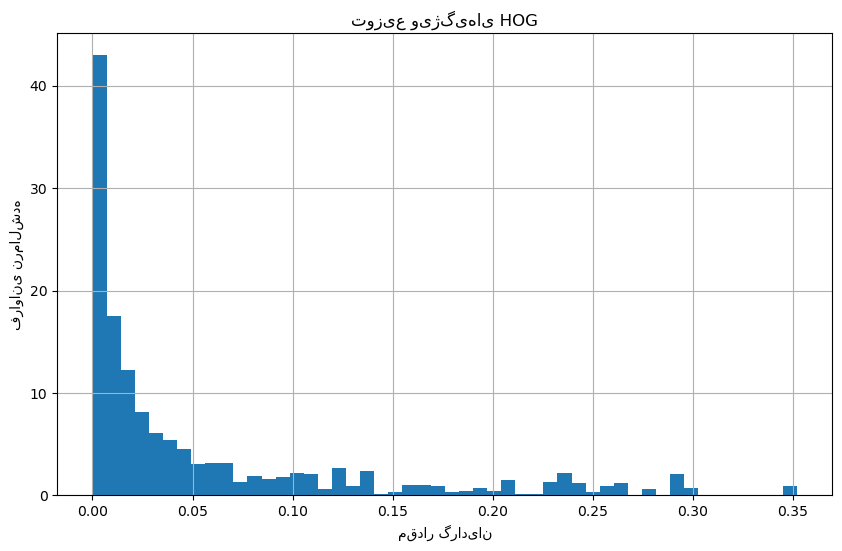

In [62]:
plt.figure(figsize=(10,6))
plt.hist(features, bins=50, density=True)
plt.xlabel('مقدار گرادیان')
plt.ylabel('فراوانی نرمال‌شده')
plt.title('توزیع ویژگی‌های HOG')
plt.grid(True)
plt.show()

In [68]:
from skimage.feature import local_binary_pattern
import numpy as np

# استخراج ویژگی LBP
radius = 3
n_points = 8 * radius
lbp = local_binary_pattern(data_normalized, n_points, radius, method='uniform')

# ترکیب با HOG (حذف پرانتز اضافی)
combined_features = np.concatenate([features, lbp.ravel()])  # فقط یک ) در انتها

In [69]:
from skimage.feature import hog, local_binary_pattern
import numpy as np

# محاسبه HOG (اگر قبلاً انجام نشده)
features, hog_image = hog(
    data_normalized,
    orientations=9,
    pixels_per_cell=(8, 8),
    cells_per_block=(2, 2),
    visualize=True,
    channel_axis=None
)

# محاسبه LBP
radius = 3
n_points = 8 * radius
lbp = local_binary_pattern(data_normalized, n_points, radius, method='uniform')

# ترکیب ویژگی‌ها
combined_features = np.concatenate([features, lbp.ravel()])  # بدون پرانتز اضافی

print(f"تعداد ویژگی‌های HOG: {len(features)}")
print(f"تعداد ویژگی‌های LBP: {len(lbp.ravel())}")
print(f"تعداد کل ویژگی‌های ترکیبی: {len(combined_features)}")

تعداد ویژگی‌های HOG: 1764
تعداد ویژگی‌های LBP: 4096
تعداد کل ویژگی‌های ترکیبی: 5860


In [80]:
import numpy as np

# مثال: ایجاد یک مجموعه داده آموزشی با 100 نمونه و 20 ویژگی
train_features = np.random.rand(100, 20)  # 100 نمونه و 20 ویژگی

In [82]:
n_components = min(50, train_features.shape[1])  # اطمینان از معتبر بودن n_components
pca = PCA(n_components=n_components)

In [83]:
import numpy as np

# تعریف داده‌های آموزشی
train_features = np.random.rand(100, 20)  # 100 نمونه و 20 ویژگی

In [84]:
import numpy as np

# تعریف داده‌های آموزشی
train_features = np.random.rand(100, 20)  # 100 نمونه و 20 ویژگی

In [85]:
train_features = np.random.rand(100, 20)  # 100 نمونه و 20 ویژگی

In [86]:
import numpy as np
from sklearn.decomposition import PCA

# 1. تعریف داده‌های آموزشی
train_features = np.random.rand(100, 20)  # 100 نمونه و 20 ویژگی

# 2. ایجاد و فیت کردن مدل PCA
n_components = min(50, train_features.shape[1])  # اطمینان از معتبر بودن n_components
pca = PCA(n_components=n_components)
pca.fit(train_features)

# 3. تعریف یک نمونه جدید
sample_features = np.random.rand(20)  # یک نمونه جدید با 20 ویژگی
sample_features = sample_features.reshape(1, -1)  # تبدیل به شکل (1, 20)

# 4. کاهش ابعاد نمونه جدید
reduced_sample = pca.transform(sample_features)

# 5. چاپ نتایج
print("Train Features Shape:", train_features.shape)
print("Sample Features Shape:", sample_features.shape)
print("Reduced Sample Shape:", reduced_sample.shape)

Train Features Shape: (100, 20)
Sample Features Shape: (1, 20)
Reduced Sample Shape: (1, 20)


In [78]:
import numpy as np
from sklearn.decomposition import PCA

# 1. تعریف داده‌های آموزشی
train_features = np.random.rand(100, 20)  # 100 نمونه و 20 ویژگی

# 2. ایجاد و فیت کردن مدل PCA
n_components = min(50, train_features.shape[1])  # اطمینان از معتبر بودن n_components
pca = PCA(n_components=n_components)
pca.fit(train_features)

# 3. تعریف یک نمونه جدید
sample_features = np.random.rand(1, 20)  # یک نمونه جدید با 20 ویژگی

# 4. کاهش ابعاد نمونه جدید
reduced_sample = pca.transform(sample_features)

# 5. چاپ نتایج
print("Reduced Sample Shape:", reduced_sample.shape)

Reduced Sample Shape: (1, 20)


In [89]:
print("Features Shape:", features.shape)

Features Shape: (1764,)


In [91]:
features = features.reshape(1, -1)  # تبدیل به شکل (1, n_features)

In [92]:
features = features.reshape(-1, 1)  # تبدیل به شکل (n_samples, 1)

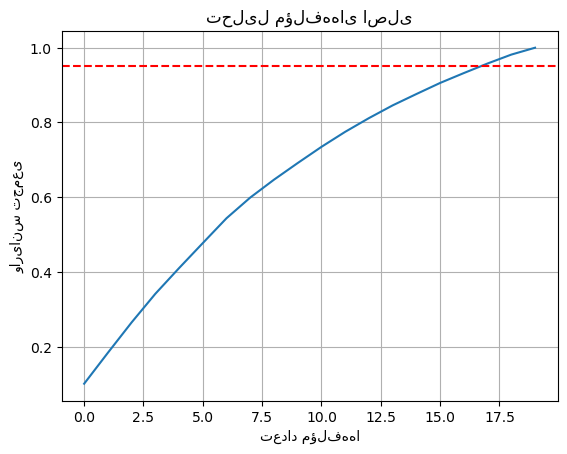

مؤلفه‌های مورد نیاز برای 95% واریانس: 18


In [93]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# فرض کنید features داده‌های شما باشد
# مثال: 100 نمونه و 20 ویژگی
features = np.random.rand(100, 20)

# اگر features یک آرایه یک بعدی باشد، آن را به دو بعدی تبدیل کنید
if len(features.shape) == 1:
    features = features.reshape(1, -1)  # برای یک نمونه با چندین ویژگی
    # یا
    # features = features.reshape(-1, 1)  # برای چندین نمونه با یک ویژگی

# اجرای PCA بدون تعیین n_components
pca = PCA().fit(features)

# رسم نمودار واریانس تجمعی
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('تعداد مؤلفه‌ها')
plt.ylabel('واریانس تجمعی')
plt.title('تحلیل مؤلفه‌های اصلی')
plt.axhline(y=0.95, color='r', linestyle='--')  # خط 95% واریانس
plt.grid()
plt.show()

# تعداد مؤلفه‌های مورد نیاز برای 95% واریانس
n_components_95 = np.where(np.cumsum(pca.explained_variance_ratio_) >= 0.95)[0][0] + 1
print(f"مؤلفه‌های مورد نیاز برای 95% واریانس: {n_components_95}")

In [98]:
print("Features Shape:", features.shape)

Features Shape: (1, 20)


In [99]:
pca = PCA(n_components=1)

In [103]:
n_components = min(50, features.shape[0])  # اطمینان از معتبر بودن n_components
pca = PCA(n_components=n_components)

In [104]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# فرض کنید features داده‌های شما باشد
# مثال: یک نمونه و 20 ویژگی
features = np.random.rand(20)

# تغییر شکل داده‌ها به (1, n_features)
features = features.reshape(1, -1)

# تنظیم صحیح n_components
n_components = min(50, features.shape[0])  # اطمینان از معتبر بودن n_components
print(f"تعداد مؤلفه‌های مجاز: {n_components}")
pca = PCA(n_components=n_components)

# اجرای PCA
reduced_features = pca.fit_transform(features)

# رسم نمودار واریانس تجمعی
if n_components > 1:  # فقط اگر بیش از یک مؤلفه وجود داشته باشد
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('تعداد مؤلفه‌ها')
    plt.ylabel('واریانس تجمعی')
    plt.title('تحلیل مؤلفه‌های اصلی')
    plt.show()
else:
    print("فقط یک مؤلفه وجود دارد. نمودار قابل رسم نیست.")

تعداد مؤلفه‌های مجاز: 1
فقط یک مؤلفه وجود دارد. نمودار قابل رسم نیست.


C:\Users\Matin\anaconda3\Lib\site-packages\sklearn\decomposition\_pca.py:591: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)


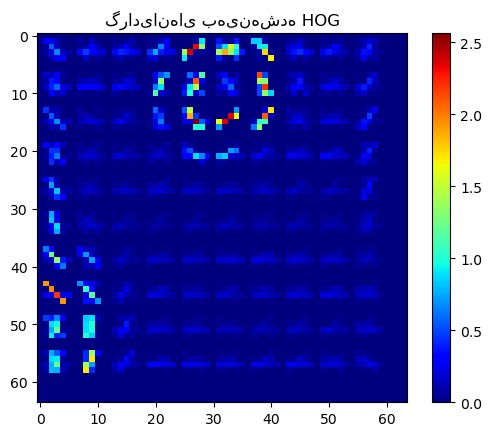

In [67]:
optimal_hog = hog(
    data_normalized,
    orientations=9,
    pixels_per_cell=(6,6),
    cells_per_block=(2,2),
    transform_sqrt=True,
    block_norm='L2-Hys',
    visualize=True,
    channel_axis=None
)

# نمایش گرادیان‌های جهت‌دار
plt.imshow(optimal_hog[1], cmap='jet')
plt.colorbar()
plt.title('گرادیان‌های بهینه‌شده HOG')
plt.show()

# ایجاد یک طبقه بند با استفاده از SVM

In [105]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# 1. تولید داده‌های ساختگی
X, y = make_classification(
    n_samples=500,       # تعداد نمونه‌ها
    n_features=20,       # تعداد ویژگی‌ها
    n_informative=15,    # تعداد ویژگی‌های مؤثر
    n_redundant=5,       # تعداد ویژگی‌های غیرمؤثر
    n_classes=2,         # تعداد کلاس‌ها (طبقه‌بندی دوکلاسی)
    random_state=42
)

# 2. تقسیم داده‌ها به داده‌های آموزشی و آزمایشی
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. مقیاس‌بندی داده‌ها (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. آموزش مدل SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=42)  # استفاده از هسته خطی
svm_model.fit(X_train, y_train)

# 5. پیش‌بینی روی داده‌های آزمایشی
y_pred = svm_model.predict(X_test)

# 6. ارزیابی مدل
accuracy = accuracy_score(y_test, y_pred)
print(f"دقت مدل: {accuracy:.2f}")

# گزارش جامع طبقه‌بندی
print("\nگزارش جامع طبقه‌بندی:")
print(classification_report(y_test, y_pred))

دقت مدل: 0.86

گزارش جامع طبقه‌بندی:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87        52
           1       0.90      0.79      0.84        48

    accuracy                           0.86       100
   macro avg       0.87      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



# آموزش طبقه بند 

In [106]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. تولید داده‌های ساختگی
X, y = make_classification(
    n_samples=500,       # تعداد نمونه‌ها
    n_features=20,       # تعداد ویژگی‌ها
    n_informative=15,    # تعداد ویژگی‌های مؤثر
    n_redundant=5,       # تعداد ویژگی‌های غیرمؤثر
    n_classes=2,         # تعداد کلاس‌ها (طبقه‌بندی دوکلاسی)
    random_state=42
)

# 2. تقسیم داده‌ها به داده‌های آموزشی و آزمایشی
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. مقیاس‌بندی داده‌ها (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. ایجاد و آموزش مدل SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=42)  # استفاده از هسته خطی
svm_model.fit(X_train, y_train)  # آموزش مدل

# 5. پیش‌بینی روی داده‌های آزمایشی
y_pred = svm_model.predict(X_test)

# 6. ارزیابی مدل
accuracy = accuracy_score(y_test, y_pred)
print(f"دقت مدل: {accuracy:.2f}")

# گزارش جامع طبقه‌بندی
print("\nگزارش جامع طبقه‌بندی:")
print(classification_report(y_test, y_pred))

# ماتریس درهم‌ریختگی
print("\nماتریس درهم‌ریختگی:")
print(confusion_matrix(y_test, y_pred))

دقت مدل: 0.86

گزارش جامع طبقه‌بندی:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87        52
           1       0.90      0.79      0.84        48

    accuracy                           0.86       100
   macro avg       0.87      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100


ماتریس درهم‌ریختگی:
[[48  4]
 [10 38]]


#  کد کامل تشخیص مولکول ها و شمارش تعداد آن ها با  HOG 

In [107]:
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. بارگذاری تصویر
image = cv2.imread('molecules_image.jpg')  # تصویر حاوی مولکول‌ها
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # تبدیل به سطح خاکستری

# 2. پیش‌پردازش تصویر (بلورسازی)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# 3. استخراج ویژگی‌های HOG
def extract_hog_features(image):
    features, hog_image = hog(
        image,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        visualize=True,
        feature_vector=True
    )
    return features, hog_image

hog_features, hog_image = extract_hog_features(blurred)

# 4. آماده‌سازی داده‌ها برای آموزش
# فرض کنید داده‌های آموزشی و برچسب‌ها را دارید
# X_train: ویژگی‌های HOG، y_train: برچسب‌های کلاس‌ها
X, y = [], []  # اینجا باید داده‌های واقعی خود را وارد کنید

# تقسیم داده‌ها به داده‌های آموزشی و آزمایشی
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# مقیاس‌بندی داده‌ها
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. آموزش طبقه‌بند SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# 6. ارزیابی مدل
y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"دقت مدل: {accuracy:.2f}")

# 7. شناسایی و شمارش مولکول‌ها
def detect_and_count_molecules(model, image, scaler):
    # تقسیم تصویر به بخش‌های کوچک (Region Proposal)
    detected_molecules = 0
    regions = []  # ذخیره مناطق شناسایی‌شده

    # مثال: تقسیم تصویر به بلوک‌های 32x32
    step_size = 32
    for y in range(0, image.shape[0] - step_size, step_size):
        for x in range(0, image.shape[1] - step_size, step_size):
            region = image[y:y + step_size, x:x + step_size]
            region_gray = cv2.cvtColor(region, cv2.COLOR_BGR2GRAY)
            region_blurred = cv2.GaussianBlur(region_gray, (5, 5), 0)
            region_features, _ = extract_hog_features(region_blurred)
            region_features_scaled = scaler.transform([region_features])

            # پیش‌بینی با مدل
            prediction = model.predict(region_features_scaled)
            if prediction == 1:  # فرض کنید کلاس 1 نشان‌دهنده مولکول است
                detected_molecules += 1
                regions.append((x, y, x + step_size, y + step_size))

    # رسم مستطیل‌ها حول مولکول‌های شناسایی‌شده
    for (x1, y1, x2, y2) in regions:
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    print(f"تعداد مولکول‌های شناسایی‌شده: {detected_molecules}")
    return image

# شناسایی و شمارش مولکول‌ها
detected_image = detect_and_count_molecules(svm_model, image, scaler)

# نمایش تصویر
plt.imshow(cv2.cvtColor(detected_image, cv2.COLOR_BGR2RGB))
plt.title("Detected Molecules")
plt.axis('off')
plt.show()

error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [108]:
import os

# بررسی وجود فایل
image_path = 'D:\\exam\\Datrix\\assignmnet\\stm-data\\stm-data\\Train\\0006_molecules1.npy'
if os.path.exists(image_path):
    print("فایل وجود دارد.")
else:
    print("فایل وجود ندارد یا مسیر اشتباه است.")

فایل وجود دارد.


In [111]:
for file_path in file_paths:
    print(file_path)

D:\exam\Datrix\assignmnet\stm-data\stm-data\Train\0001_molecules2.npy
D:\exam\Datrix\assignmnet\stm-data\stm-data\Train\0002_molecules2.npy
D:\exam\Datrix\assignmnet\stm-data\stm-data\Train\0003_molecules1.npy
D:\exam\Datrix\assignmnet\stm-data\stm-data\Train\0004_molecules2.npy
D:\exam\Datrix\assignmnet\stm-data\stm-data\Train\0005_molecules4.npy
D:\exam\Datrix\assignmnet\stm-data\stm-data\Train\0006_molecules1.npy
D:\exam\Datrix\assignmnet\stm-data\stm-data\Train\0007_molecules7.npy
D:\exam\Datrix\assignmnet\stm-data\stm-data\Train\0008_molecules2.npy
D:\exam\Datrix\assignmnet\stm-data\stm-data\Train\0009_molecules3.npy
D:\exam\Datrix\assignmnet\stm-data\stm-data\Train\0010_molecules1.npy
D:\exam\Datrix\assignmnet\stm-data\stm-data\Train\0011_molecules7.npy
D:\exam\Datrix\assignmnet\stm-data\stm-data\Train\0012_molecules1.npy
D:\exam\Datrix\assignmnet\stm-data\stm-data\Train\0013_molecules1.npy
D:\exam\Datrix\assignmnet\stm-data\stm-data\Train\0014_molecules2.npy
D:\exam\Datrix\assig

In [112]:
import re

# فیلتر کردن فایل‌هایی که نام آن‌ها شامل عدد بعد از "molecules" است
file_paths = [f for f in file_paths if re.match(r".*molecules\d+\.npy$", f)]

In [118]:
match = re.search(r"molecules(\d+)\.npy", r'D:\exam\Datrix\assignmnet\stm-data\stm-data\Train')
if match:
    label = int(match.group(1))
else:
    print(f"فایل {file_path} دارای الگوی مورد نظر نیست و رد می‌شود.")
    continue

SyntaxError: 'continue' not properly in loop (358142006.py, line 6)

In [113]:
label = int(re.search(r"molecules(\d+)\.npy", file_path).group(1))

AttributeError: 'NoneType' object has no attribute 'group'

In [116]:
def extract_hog_features(image):
    features = hog(
        image,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        visualize=False,
        feature_vector=True
    )
    return features

In [37]:
import os
import re

# آدرس دایرکتوری حاوی فایل‌ها
data_dir = r'D:\exam\test\stm-data\Train'

# لیست تمام فایل‌های موجود در دایرکتوری
file_paths = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.npy')]

# فیلتر کردن فایل‌ها و استخراج برچسب‌ها
X, y = [], []
for file_path in file_paths:
    # بررسی الگوی "molecules(\d+)\.npy"
    if re.search(r"molecules(\d+)\.npy", file_path):
        label = int(re.search(r"molecules(\d+)\.npy", file_path).group(1))
    elif re.search(r"other_pattern(\d+)\.npy", file_path):
        label = int(re.search(r"other_pattern(\d+)\.npy", file_path).group(1))
    else:
        print(f"فایل {file_path} دارای الگوی مورد نظر نیست و رد می‌شود.")
        continue  # رد کردن فایل‌های نامعتبر
    
    # بارگذاری تصویر
    data = np.load(file_path)
    
    # پیش‌پردازش: تبدیل به خاکستری و بلورسازی
    gray = data.astype(np.uint8)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # استخراج ویژگی HOG
    def extract_hog_features(image):
        features = hog(
            image,
            pixels_per_cell=(8, 8),
            cells_per_block=(2, 2),
            visualize=False,
            feature_vector=True
        )
        return features
    
    hog_features = extract_hog_features(blurred)
    
    # ذخیره ویژگی‌ها و برچسب‌ها
    X.append(hog_features)
    y.append(label)

# تبدیل لیست‌ها به آرایه‌های NumPy
X = np.array(X)
y = np.array(y)

# ادامه کد...

NameError: name 'cv2' is not defined

In [117]:
import numpy as np
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import cv2
import os
import re

# 1. بارگذاری داده‌ها
data_dir = r'D:\exam\Datrix\assignmnet\stm-data\stm-data\Train'
file_paths = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.npy')]

# فیلتر کردن فایل‌هایی که نام آن‌ها شامل عدد بعد از "molecules" است
file_paths = [f for f in file_paths if re.match(r".*molecules\d+\.npy$", f)]

# استخراج ویژگی‌ها و برچسب‌ها
X, y = [], []
for file_path in file_paths:
    # بارگذاری تصویر
    data = np.load(file_path)
    
    # استخراج برچسب از نام فایل
    match = re.search(r"molecules(\d+)\.npy", file_path)
    if match:
        label = int(match.group(1))
    else:
        print(f"فایل {file_path} دارای الگوی مورد نظر نیست و رد می‌شود.")
        continue
    
    # پیش‌پردازش: تبدیل به خاکستری و بلورسازی
    gray = data.astype(np.uint8)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # استخراج ویژگی HOG
    def extract_hog_features(image):
        features = hog(
            image,
            pixels_per_cell=(8, 8),
            cells_per_block=(2, 2),
            visualize=False,
            feature_vector=True
        )
        return features
    
    hog_features = extract_hog_features(blurred)
    
    # ذخیره ویژگی‌ها و برچسب‌ها
    X.append(hog_features)
    y.append(label)

# 2. تبدیل لیست‌ها به آرایه‌های NumPy
X = np.array(X)
y = np.array(y)

# 3. تقسیم داده‌ها به داده‌های آموزشی و آزمایشی
if len(X) > 0:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    raise ValueError("داده‌ها خالی هستند. لطفاً مطمئن شوید که فایل‌های داده وجود دارند.")

# 4. مقیاس‌بندی داده‌ها
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. آموزش طبقه‌بند SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# 6. ارزیابی مدل
y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"دقت مدل: {accuracy:.2f}")

# 7. شناسایی و شمارش مولکول‌ها
def detect_and_count_molecules(model, data, scaler):
    detected_molecules = 0
    regions = []  # ذخیره مناطق شناسایی‌شده

    # مثال: تقسیم تصویر به بلوک‌های 32x32
    step_size = 32
    for y in range(0, data.shape[0] - step_size, step_size):
        for x in range(0, data.shape[1] - step_size, step_size):
            region = data[y:y + step_size, x:x + step_size]
            region_blurred = cv2.GaussianBlur(region.astype(np.uint8), (5, 5), 0)
            
            # استخراج ویژگی HOG
            def extract_hog_features(image):
                features = hog(
                    image,
                    pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2),
                    visualize=False,
                    feature_vector=True
                )
                return features
            
            region_features = extract_hog_features(region_blurred)
            region_features_scaled = scaler.transform([region_features])

            # پیش‌بینی با مدل
            prediction = model.predict(region_features_scaled)
            if prediction == 1:  # فرض کنید کلاس 1 نشان‌دهنده مولکول است
                detected_molecules += 1
                regions.append((x, y, x + step_size, y + step_size))

    print(f"تعداد مولکول‌های شناسایی‌شده: {detected_molecules}")
    return regions

# شناسایی و شمارش مولکول‌ها
test_data = np.load(r'D:\exam\Datrix\assignmnet\stm-data\stm-data\Train\0006_molecules1.npy')
test_gray = test_data.astype(np.uint8)
test_blurred = cv2.GaussianBlur(test_gray, (5, 5), 0)
regions = detect_and_count_molecules(svm_model, test_blurred, scaler)

# نمایش تصویر و مناطق شناسایی‌شده
plt.figure(figsize=(10, 8))
plt.imshow(test_blurred, cmap='gray')
for (x1, y1, x2, y2) in regions:
    plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='green', facecolor='none', linewidth=2))
plt.title("Detected Molecules")
plt.axis('off')
plt.show()

دقت مدل: 0.50


ValueError: X has 324 features, but StandardScaler is expecting 1764 features as input.

In [114]:
import numpy as np
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import cv2
import os
import re

# 1. بارگذاری داده‌ها
data_dir = r'D:\exam\Datrix\assignmnet\stm-data\stm-data\Train'
file_paths = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.npy')]

# فیلتر کردن فایل‌هایی که نام آن‌ها شامل عدد بعد از "molecules" است
file_paths = [f for f in file_paths if re.match(r".*molecules\d+\.npy$", f)]

# استخراج ویژگی‌ها و برچسب‌ها
X, y = [], []
for file_path in file_paths:
    # بارگذاری تصویر
    data = np.load(file_path)
    
    # استخراج برچسب از نام فایل
    label = int(re.search(r"molecules(\d+)\.npy", file_path).group(1))  # تعداد مولکول‌ها
    
    # پیش‌پردازش: تبدیل به خاکستری و بلورسازی
    gray = data.astype(np.uint8)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # استخراج ویژگی HOG
    def extract_hog_features(image):
        features, _ = hog(
            image,
            pixels_per_cell=(8, 8),
            cells_per_block=(2, 2),
            visualize=False,
            feature_vector=True
        )
        return features
    
    hog_features = extract_hog_features(blurred)
    
    # ذخیره ویژگی‌ها و برچسب‌ها
    X.append(hog_features)
    y.append(label)

# 2. تبدیل لیست‌ها به آرایه‌های NumPy
X = np.array(X)
y = np.array(y)

# 3. تقسیم داده‌ها به داده‌های آموزشی و آزمایشی
if len(X) > 0:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    raise ValueError("داده‌ها خالی هستند. لطفاً مطمئن شوید که فایل‌های داده وجود دارند.")

# 4. مقیاس‌بندی داده‌ها
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. آموزش طبقه‌بند SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# 6. ارزیابی مدل
y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"دقت مدل: {accuracy:.2f}")

# 7. شناسایی و شمارش مولکول‌ها
def detect_and_count_molecules(model, data, scaler):
    detected_molecules = 0
    regions = []  # ذخیره مناطق شناسایی‌شده

    # مثال: تقسیم تصویر به بلوک‌های 32x32
    step_size = 32
    for y in range(0, data.shape[0] - step_size, step_size):
        for x in range(0, data.shape[1] - step_size, step_size):
            region = data[y:y + step_size, x:x + step_size]
            region_blurred = cv2.GaussianBlur(region.astype(np.uint8), (5, 5), 0)
            
            # استخراج ویژگی HOG
            def extract_hog_features(image):
                features, _ = hog(
                    image,
                    pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2),
                    visualize=False,
                    feature_vector=True
                )
                return features
            
            region_features = extract_hog_features(region_blurred)
            region_features_scaled = scaler.transform([region_features])

            # پیش‌بینی با مدل
            prediction = model.predict(region_features_scaled)
            if prediction == 1:  # فرض کنید کلاس 1 نشان‌دهنده مولکول است
                detected_molecules += 1
                regions.append((x, y, x + step_size, y + step_size))

    print(f"تعداد مولکول‌های شناسایی‌شده: {detected_molecules}")
    return regions

# شناسایی و شمارش مولکول‌ها
test_data = np.load(r'D:\exam\Datrix\assignmnet\stm-data\stm-data\Train\0006_molecules1.npy')
test_gray = test_data.astype(np.uint8)
test_blurred = cv2.GaussianBlur(test_gray, (5, 5), 0)
regions = detect_and_count_molecules(svm_model, test_blurred, scaler)

# نمایش تصویر و مناطق شناسایی‌شده
plt.figure(figsize=(10, 8))
plt.imshow(test_blurred, cmap='gray')
for (x1, y1, x2, y2) in regions:
    plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='green', facecolor='none', linewidth=2))
plt.title("Detected Molecules")
plt.axis('off')
plt.show()

ValueError: too many values to unpack (expected 2)

In [110]:
import numpy as np
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import cv2
import os

# 1. بارگذاری داده‌ها
data_dir = r'D:\exam\Datrix\assignmnet\stm-data\stm-data\Train'
file_paths = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.npy')]

# استخراج ویژگی‌ها و برچسب‌ها
X, y = [], []
for file_path in file_paths:
    # بارگذاری تصویر
    data = np.load(file_path)
    
    # استخراج برچسب از نام فایل
    label = int(file_path.split('_')[-1].split('.')[0])  # تعداد مولکول‌ها از نام فایل
    
    # پیش‌پردازش: تبدیل به خاکستری و بلورسازی
    gray = data.astype(np.uint8)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # استخراج ویژگی HOG
    def extract_hog_features(image):
        features, _ = hog(
            image,
            pixels_per_cell=(8, 8),
            cells_per_block=(2, 2),
            visualize=False,
            feature_vector=True
        )
        return features
    
    hog_features = extract_hog_features(blurred)
    
    # ذخیره ویژگی‌ها و برچسب‌ها
    X.append(hog_features)
    y.append(label)

# 2. تبدیل لیست‌ها به آرایه‌های NumPy
X = np.array(X)
y = np.array(y)

# 3. تقسیم داده‌ها به داده‌های آموزشی و آزمایشی
if len(X) > 0:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    raise ValueError("داده‌ها خالی هستند. لطفاً مطمئن شوید که فایل‌های داده وجود دارند.")

# 4. مقیاس‌بندی داده‌ها
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. آموزش طبقه‌بند SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# 6. ارزیابی مدل
y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"دقت مدل: {accuracy:.2f}")

# 7. شناسایی و شمارش مولکول‌ها
def detect_and_count_molecules(model, data, scaler):
    detected_molecules = 0
    regions = []  # ذخیره مناطق شناسایی‌شده

    # مثال: تقسیم تصویر به بلوک‌های 32x32
    step_size = 32
    for y in range(0, data.shape[0] - step_size, step_size):
        for x in range(0, data.shape[1] - step_size, step_size):
            region = data[y:y + step_size, x:x + step_size]
            region_blurred = cv2.GaussianBlur(region.astype(np.uint8), (5, 5), 0)
            
            # استخراج ویژگی HOG
            def extract_hog_features(image):
                features, _ = hog(
                    image,
                    pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2),
                    visualize=False,
                    feature_vector=True
                )
                return features
            
            region_features = extract_hog_features(region_blurred)
            region_features_scaled = scaler.transform([region_features])

            # پیش‌بینی با مدل
            prediction = model.predict(region_features_scaled)
            if prediction == 1:  # فرض کنید کلاس 1 نشان‌دهنده مولکول است
                detected_molecules += 1
                regions.append((x, y, x + step_size, y + step_size))

    print(f"تعداد مولکول‌های شناسایی‌شده: {detected_molecules}")
    return regions

# شناسایی و شمارش مولکول‌ها
test_data = np.load(r'D:\exam\Datrix\assignmnet\stm-data\stm-data\Train\0006_molecules1.npy')
test_gray = test_data.astype(np.uint8)
test_blurred = cv2.GaussianBlur(test_gray, (5, 5), 0)
regions = detect_and_count_molecules(svm_model, test_blurred, scaler)

# نمایش تصویر و مناطق شناسایی‌شده
plt.figure(figsize=(10, 8))
plt.imshow(test_blurred, cmap='gray')
for (x1, y1, x2, y2) in regions:
    plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='green', facecolor='none', linewidth=2))
plt.title("Detected Molecules")
plt.axis('off')
plt.show()

ValueError: invalid literal for int() with base 10: 'molecules2'

In [109]:
import numpy as np
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. بارگذاری داده‌ها
data = np.load(r'D:\exam\Datrix\assignmnet\stm-data\stm-data\Train\0006_molecules1.npy')

# 2. پیش‌پردازش داده‌ها
# تبدیل داده‌ها به سطح خاکستری (اگر لازم باشد)
gray = data.astype(np.uint8)

# بلورسازی برای کاهش نویز
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# 3. استخراج ویژگی‌های HOG
def extract_hog_features(image):
    features, hog_image = hog(
        image,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        visualize=True,
        feature_vector=True
    )
    return features, hog_image

hog_features, hog_image = extract_hog_features(blurred)

# 4. آماده‌سازی داده‌ها برای آموزش
# فرض کنید داده‌های آموزشی و برچسب‌ها را دارید
# X_train: ویژگی‌های HOG، y_train: برچسب‌های کلاس‌ها
X, y = [], []  # اینجا باید داده‌های واقعی خود را وارد کنید

# تقسیم داده‌ها به داده‌های آموزشی و آزمایشی
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# مقیاس‌بندی داده‌ها
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. آموزش طبقه‌بند SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# 6. ارزیابی مدل
y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"دقت مدل: {accuracy:.2f}")

# 7. شناسایی و شمارش مولکول‌ها
def detect_and_count_molecules(model, data, scaler):
    detected_molecules = 0
    regions = []  # ذخیره مناطق شناسایی‌شده

    # مثال: تقسیم تصویر به بلوک‌های 32x32
    step_size = 32
    for y in range(0, data.shape[0] - step_size, step_size):
        for x in range(0, data.shape[1] - step_size, step_size):
            region = data[y:y + step_size, x:x + step_size]
            region_blurred = cv2.GaussianBlur(region.astype(np.uint8), (5, 5), 0)
            region_features, _ = extract_hog_features(region_blurred)
            region_features_scaled = scaler.transform([region_features])

            # پیش‌بینی با مدل
            prediction = model.predict(region_features_scaled)
            if prediction == 1:  # فرض کنید کلاس 1 نشان‌دهنده مولکول است
                detected_molecules += 1
                regions.append((x, y, x + step_size, y + step_size))

    print(f"تعداد مولکول‌های شناسایی‌شده: {detected_molecules}")
    return regions

# شناسایی و شمارش مولکول‌ها
regions = detect_and_count_molecules(svm_model, blurred, scaler)

# نمایش تصویر و مناطق شناسایی‌شده
plt.figure(figsize=(10, 8))
plt.imshow(blurred, cmap='gray')
for (x1, y1, x2, y2) in regions:
    plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='green', facecolor='none', linewidth=2))
plt.title("Detected Molecules")
plt.axis('off')
plt.show()

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [34]:
import os

# مسیر داده‌ها
data_path = r'D:\exam\Datrix\assignmnet\stm-data\stm-data\Train'

# لیست تمام فایل‌ها در مسیر
all_files = os.listdir(data_path)

# فیلتر کردن فایل‌های با پسوند '0006_molecules1.npy'
matching_files = [file for file in all_files if file.endswith('0006_molecules1.npy')]

# تعداد فایل‌های مطابق
num_matching_files = len(matching_files)

print(f"Number of matching files: {num_matching_files}")

Number of matching files: 1


In [35]:
import os
import glob

# مسیر داده‌ها
data_path = r'D:\exam\Datrix\assignmnet\stm-data\stm-data\Train'

# الگوی جستجو برای فایل‌های مشابه
pattern = os.path.join(data_path, '*_molecules*.npy')

# پیدا کردن تمام فایل‌هایی که با الگوی بالا مطابقت دارند
matching_files = glob.glob(pattern)

# شمارش تعداد فایل‌ها
num_matching_files = len(matching_files)

# نمایش نتیجه
print(f"Number of files matching the pattern '*_molecules*.npy': {num_matching_files}")

# نمایش نام فایل‌ها (اختیاری)
for file in matching_files:
    print(os.path.basename(file))

Number of files matching the pattern '*_molecules*.npy': 50
0001_molecules2.npy
0002_molecules2.npy
0003_molecules1.npy
0004_molecules2.npy
0005_molecules4.npy
0006_molecules1.npy
0007_molecules7.npy
0008_molecules2.npy
0009_molecules3.npy
0010_molecules1.npy
0011_molecules7.npy
0012_molecules1.npy
0013_molecules1.npy
0014_molecules2.npy
0015_molecules0.npy
0016_molecules1.npy
0017_molecules4.npy
0018_molecules7.npy
0019_molecules2.npy
0020_molecules1.npy
0021_molecules1.npy
0022_molecules5.npy
0023_molecules2.npy
0024_molecules3.npy
0025_molecules3.npy
0026_molecules1.npy
0027_molecules5.npy
0028_molecules1.npy
0029_molecules1.npy
0030_molecules4.npy
0031_molecules1.npy
0032_molecules1.npy
0033_molecules1.npy
0034_molecules4.npy
0035_molecules0.npy
0036_molecules1.npy
0037_molecules7.npy
0038_molecules3.npy
0039_molecules4.npy
0040_molecules1.npy
0041_molecules3.npy
0042_molecules2.npy
0043_molecules10.npy
0044_molecules0.npy
0045_molecules12.npy
0046_molecules0.npy
0047_molecules1.np

In [36]:
import numpy as np

# بارگذاری یک نمونه داده
sample_file = matching_files[0]  # اولین فایل پیدا شده
data = np.load(sample_file)

# نمایش اطلاعات داده
print("Shape of the data:", data.shape)
print("Data type:", data.dtype)
print("Minimum value:", np.min(data))
print("Maximum value:", np.max(data))
print("Mean value:", np.mean(data))
print("Standard deviation:", np.std(data))

Shape of the data: (64, 64)
Data type: float64
Minimum value: -3.038070950810517e-12
Maximum value: 1.25925311202952e-10
Mean value: 1.0474582436124234e-11
Standard deviation: 2.783005989184597e-11


In [42]:
import os
import glob
import numpy as np

# مسیر داده‌ها
data_path = r'D:\exam\Datrix\assignmnet\stm-data\stm-data\Train'

# الگوی جستجو برای فایل‌های مشابه
pattern = os.path.join(data_path, '*_molecules*.npy')

# پیدا کردن تمام فایل‌هایی که با الگوی بالا مطابقت دارند
matching_files = glob.glob(pattern)

# لیست‌های ذخیره داده‌ها و برچسب‌ها
data_list = []
labels = []

# خواندن داده‌ها و استخراج برچسب‌ها
for file in matching_files:
    # بارگذاری داده
    data = np.load(file)
    
    # استخراج برچسب از نام فایل
    base_name = os.path.basename(file)  # نام فایل را استخراج کنید
    label_part = base_name.split('_')[1]  # بخش مربوط به molecules را جدا کنید
    label_str = label_part.replace('molecules', '')  # کلمه molecules را حذف کنید
    label = int(os.path.splitext(label_str)[0])  # پسوند فایل (مانند .npy) را حذف کنید و به عدد تبدیل کنید
    
    # اضافه کردن داده و برچسب به لیست‌ها
    data_list.append(data)
    labels.append(label)

# تبدیل لیست‌ها به آرایه‌های NumPy
data_array = np.array(data_list)
labels_array = np.array(labels)

# نمایش اطلاعات
print("Number of samples:", len(data_array))
print("Shape of each sample:", data_array[0].shape)
print("Labels:", labels_array)

Number of samples: 50
Shape of each sample: (64, 64)
Labels: [ 2  2  1  2  4  1  7  2  3  1  7  1  1  2  0  1  4  7  2  1  1  5  2  3
  3  1  5  1  1  4  1  1  1  4  0  1  7  3  4  1  3  2 10  0 12  0  1  2
  0  2]


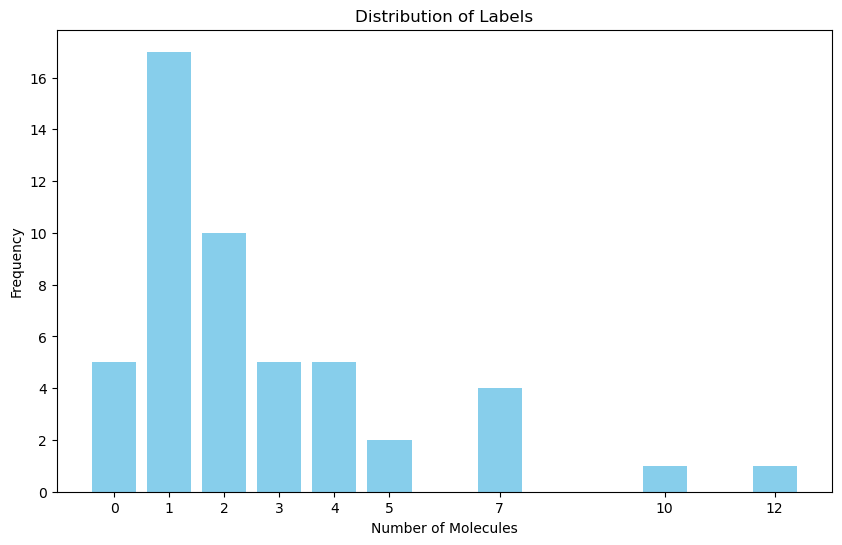

In [44]:
import matplotlib.pyplot as plt

# توزیع برچسب‌ها
unique_labels, counts = np.unique(labels_array, return_counts=True)

# نمودار توزیع برچسب‌ها
plt.figure(figsize=(10, 6))
plt.bar(unique_labels, counts, color='skyblue')
plt.xlabel('Number of Molecules')
plt.ylabel('Frequency')
plt.title('Distribution of Labels')
plt.xticks(unique_labels)
plt.show()

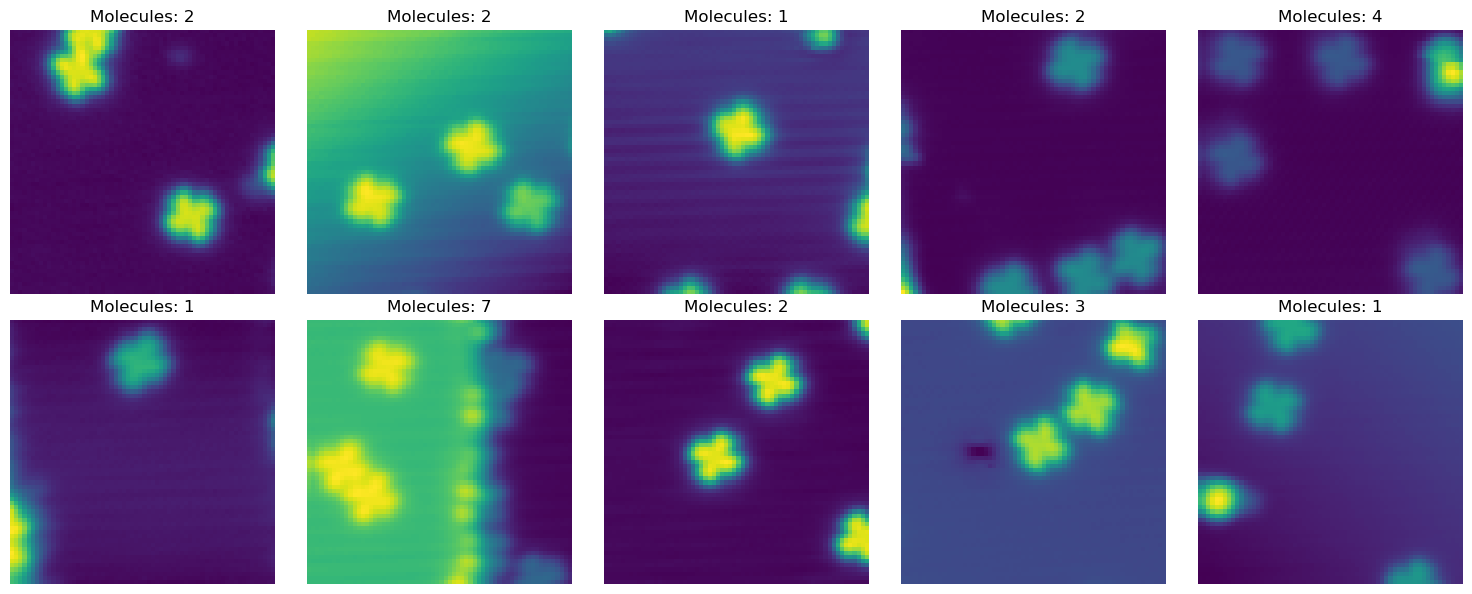

In [46]:
import matplotlib.pyplot as plt

# نمایش تصویر نمونه‌ها
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(data_array[i], cmap='viridis')
    axes[i].set_title(f"Molecules: {labels_array[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# تغییر شکل داده‌ها
X = data_array.reshape(len(data_array), -1)  # تبدیل تصاویر به بردار
y = labels_array

# تقسیم داده‌ها به داده‌های آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# آموزش مدل SVM
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# پیش‌بینی روی داده‌های تست
y_pred = model.predict(X_test)

# گزارش نتایج
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[0 2 0 0 0]
 [0 5 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1

    accuracy                           0.50        10
   macro avg       0.10      0.20      0.13        10
weighted avg       0.25      0.50      0.33        10



C:\Users\Matin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Matin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Matin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


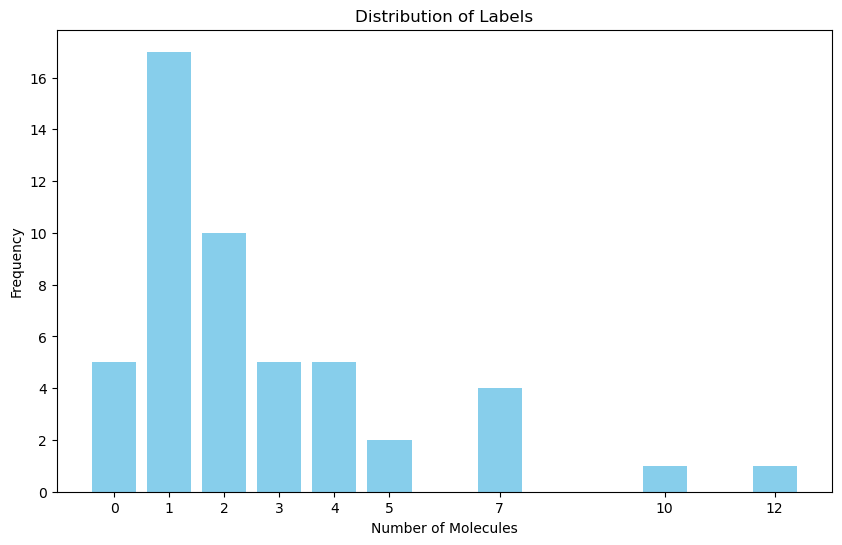

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# توزیع برچسب‌ها
unique_labels, counts = np.unique(labels_array, return_counts=True)

# نمودار توزیع برچسب‌ها
plt.figure(figsize=(10, 6))
plt.bar(unique_labels, counts, color='skyblue')
plt.xlabel('Number of Molecules')
plt.ylabel('Frequency')
plt.title('Distribution of Labels')
plt.xticks(unique_labels)
plt.show()

In [49]:
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)

SVC()

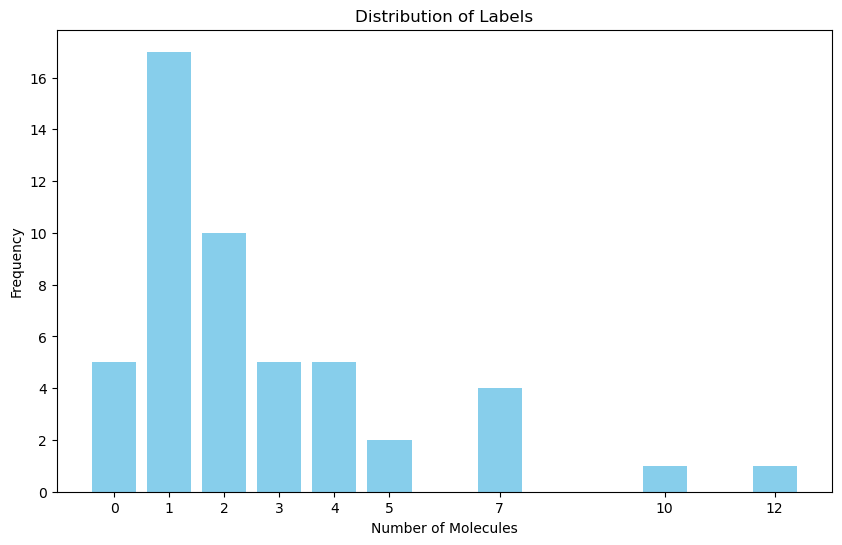

Confusion Matrix:
 [[0 2 0 0 0]
 [0 3 2 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.38      0.60      0.46         5
           2       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1

    accuracy                           0.30        10
   macro avg       0.07      0.12      0.09        10
weighted avg       0.19      0.30      0.23        10



C:\Users\Matin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Matin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Matin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# بررسی تعادل داده‌ها
unique_labels, counts = np.unique(labels_array, return_counts=True)
plt.figure(figsize=(10, 6))
plt.bar(unique_labels, counts, color='skyblue')
plt.xlabel('Number of Molecules')
plt.ylabel('Frequency')
plt.title('Distribution of Labels')
plt.xticks(unique_labels)
plt.show()

# تغییر شکل داده‌ها
X = data_array.reshape(len(data_array), -1)  # تبدیل تصاویر به بردار
y = labels_array

# تقسیم داده‌ها به داده‌های آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# آموزش مدل SVM با هسته RBF
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)

# پیش‌بینی روی داده‌های تست
y_pred = model.predict(X_test)

# گزارش نتایج
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

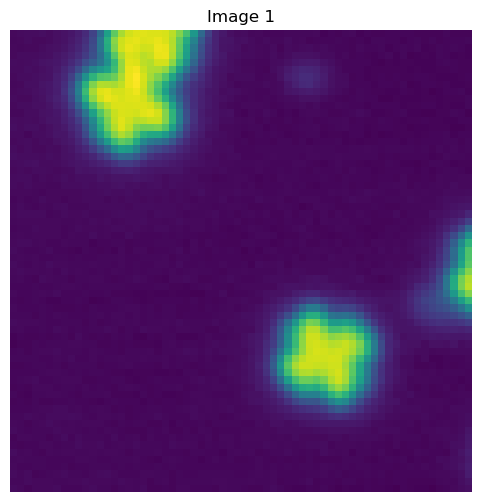

Enter the number of fully visible molecules for image 1:  2


Label for image 1: 2


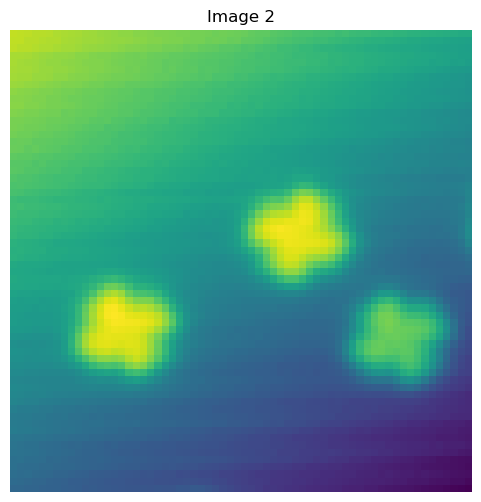

Enter the number of fully visible molecules for image 2:  3


Label for image 2: 3


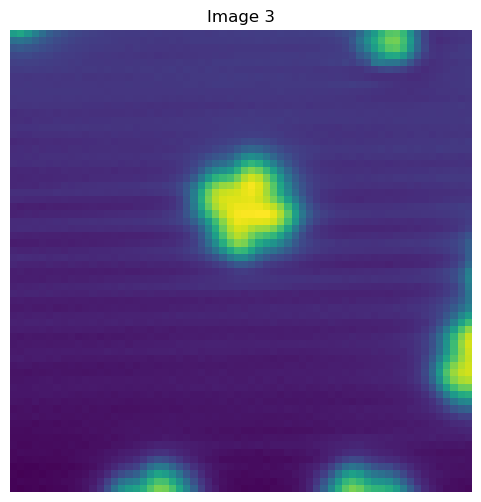

Enter the number of fully visible molecules for image 3:  1


Label for image 3: 1


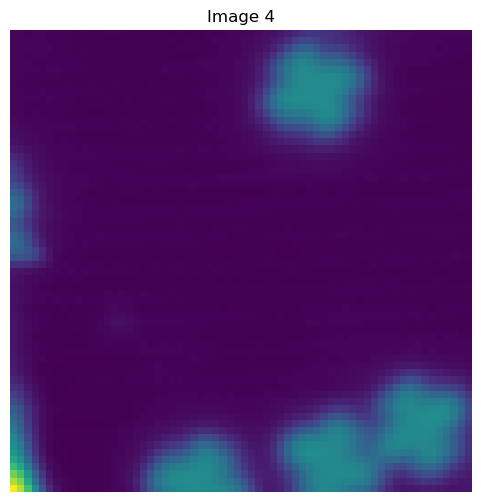

Enter the number of fully visible molecules for image 4:  2


Label for image 4: 2


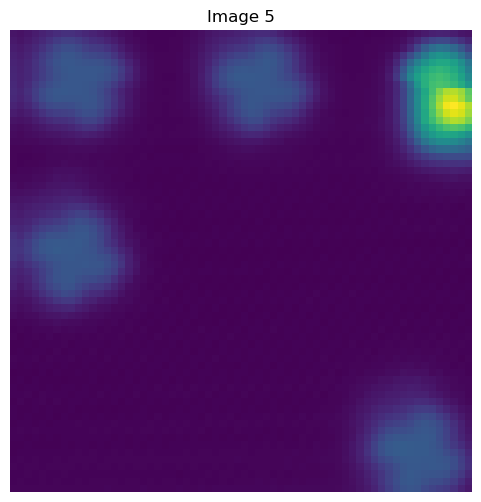

Enter the number of fully visible molecules for image 5:  3


Label for image 5: 3


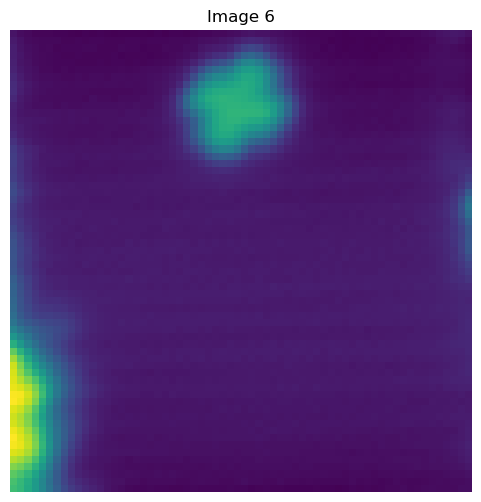

Enter the number of fully visible molecules for image 6:  1


Label for image 6: 1


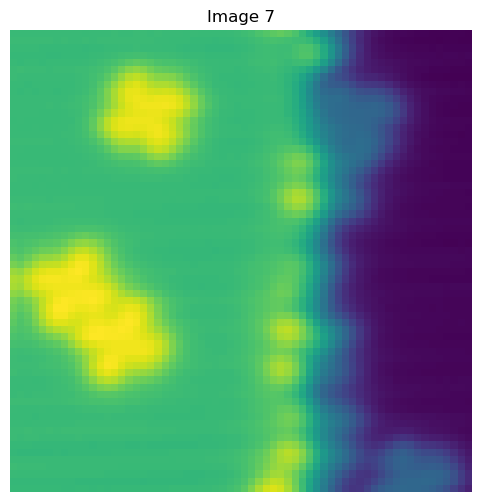

Enter the number of fully visible molecules for image 7:  4


Label for image 7: 4


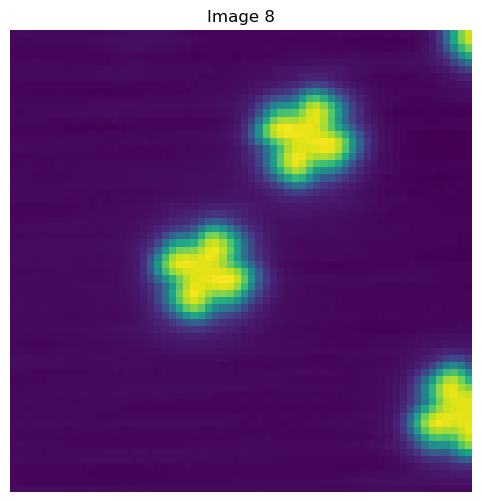

Enter the number of fully visible molecules for image 8:  2


Label for image 8: 2


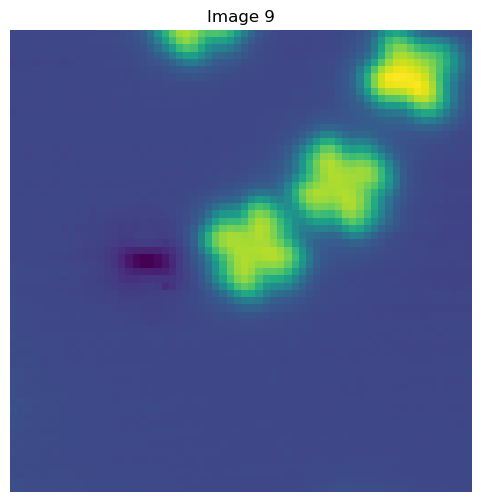

Enter the number of fully visible molecules for image 9:  3


Label for image 9: 3


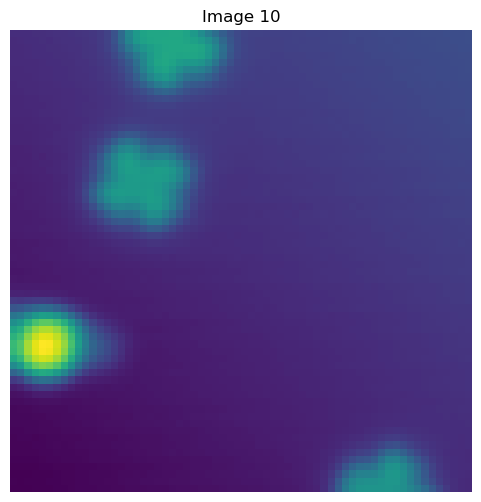

Enter the number of fully visible molecules for image 10:  1


Label for image 10: 1


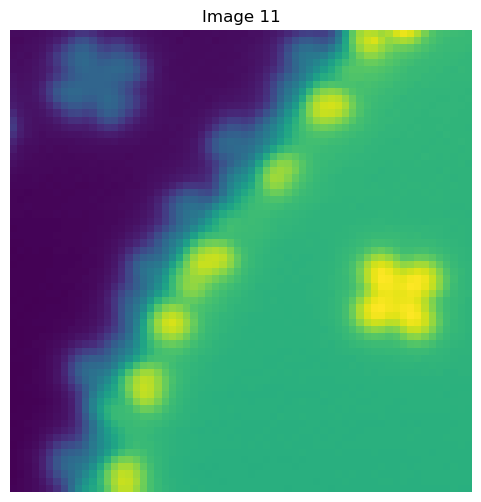

Enter the number of fully visible molecules for image 11:  2


Label for image 11: 2


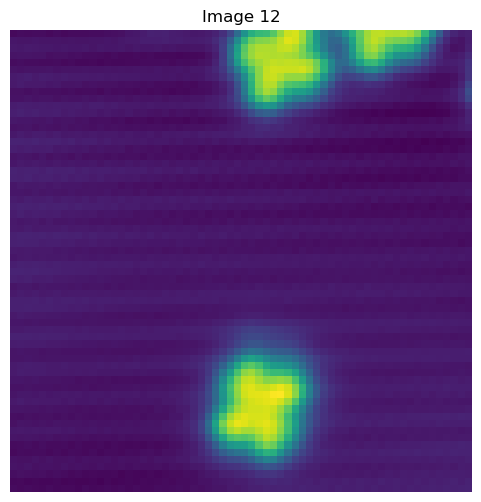

Enter the number of fully visible molecules for image 12:  1


Label for image 12: 1


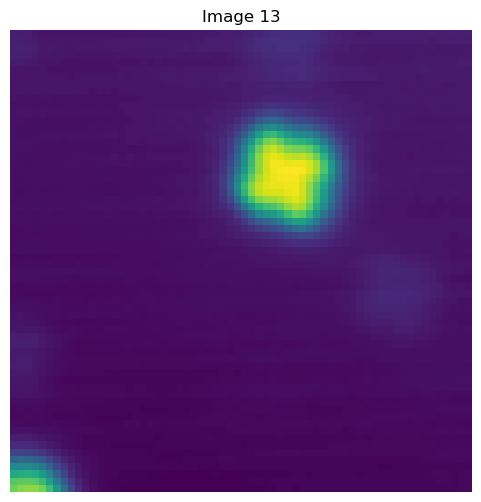

Enter the number of fully visible molecules for image 13:  1


Label for image 13: 1


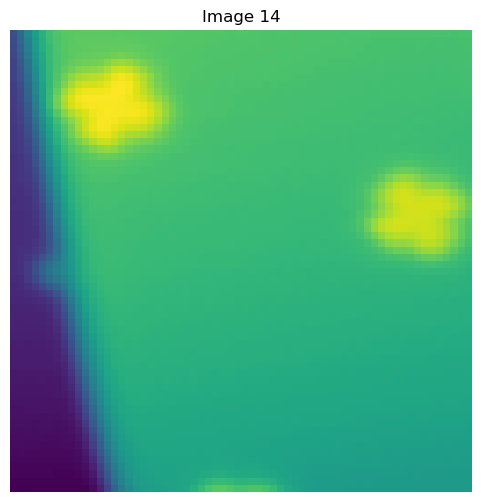

Enter the number of fully visible molecules for image 14:  2


Label for image 14: 2


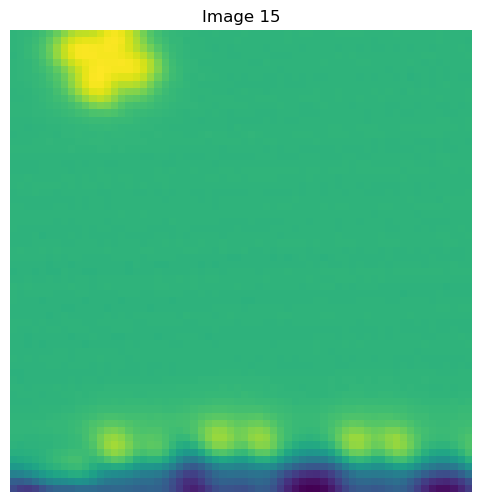

Enter the number of fully visible molecules for image 15:  0


Label for image 15: 0


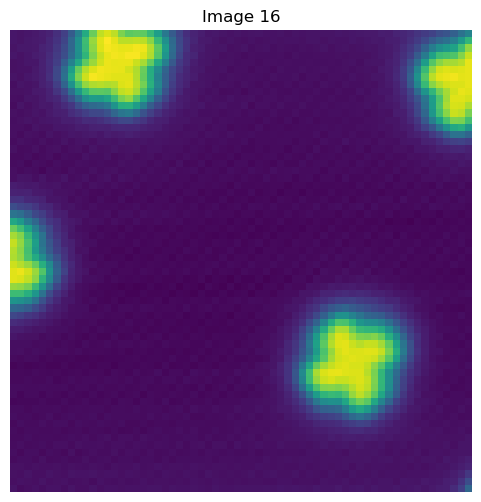

Enter the number of fully visible molecules for image 16:  2


Label for image 16: 2


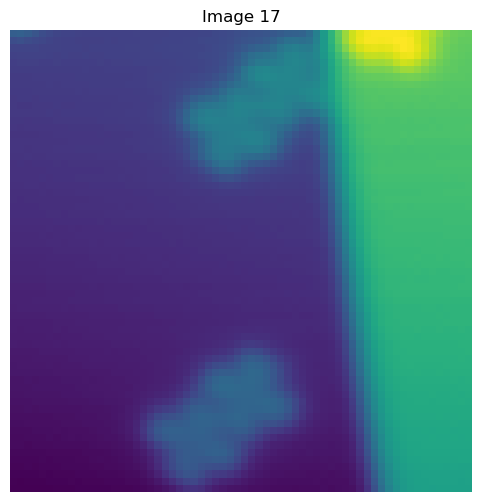

Enter the number of fully visible molecules for image 17:  4


Label for image 17: 4


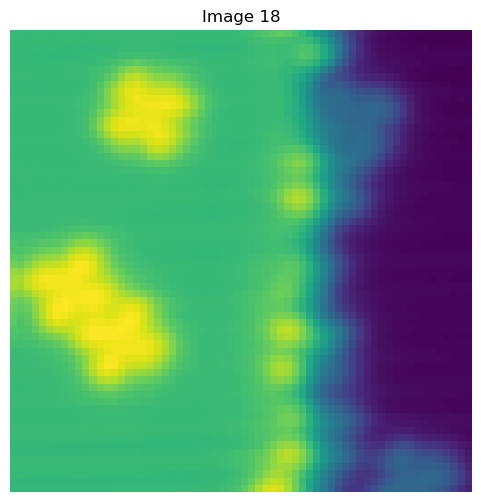

Enter the number of fully visible molecules for image 18:  5


Label for image 18: 5


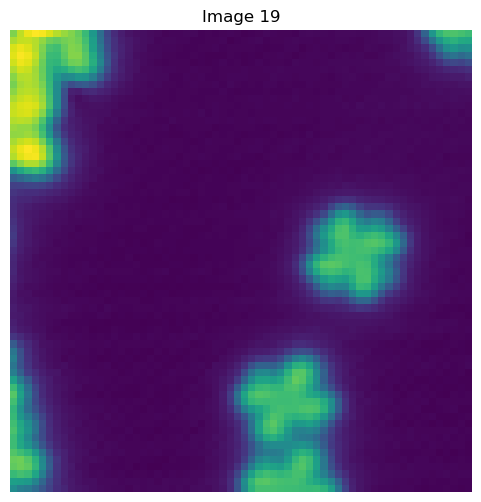

Enter the number of fully visible molecules for image 19:  2


Label for image 19: 2


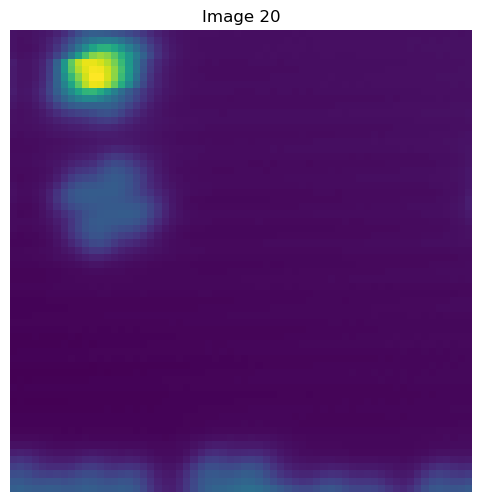

Enter the number of fully visible molecules for image 20:  2


Label for image 20: 2


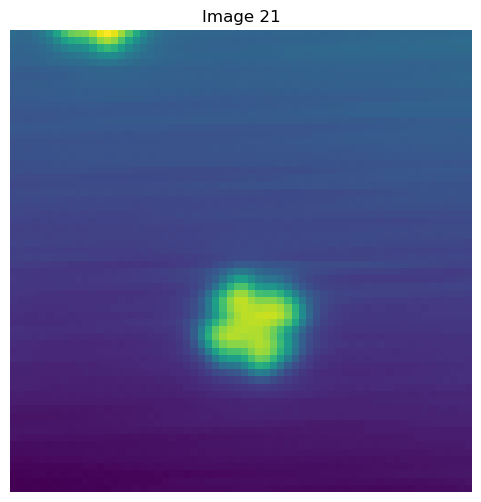

Enter the number of fully visible molecules for image 21:  1


Label for image 21: 1


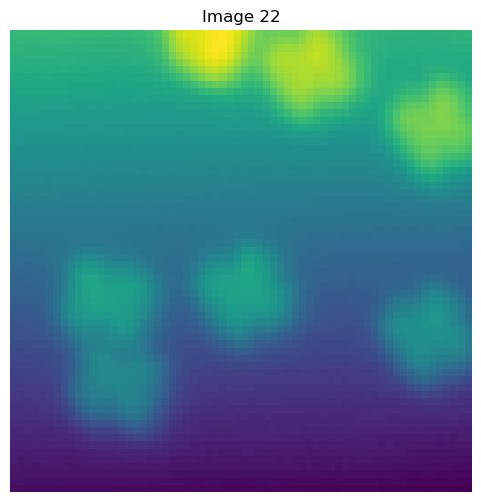

Enter the number of fully visible molecules for image 22:  6


Label for image 22: 6


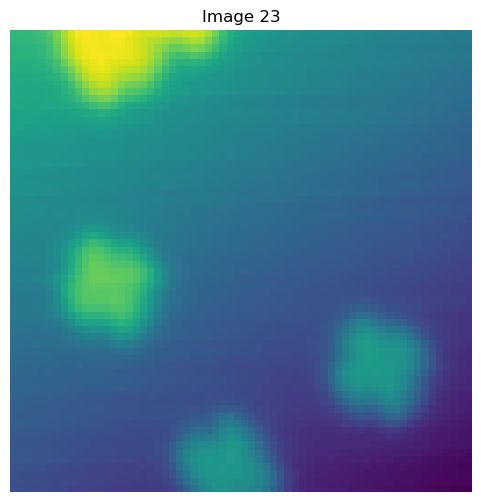

Enter the number of fully visible molecules for image 23:  2


Label for image 23: 2


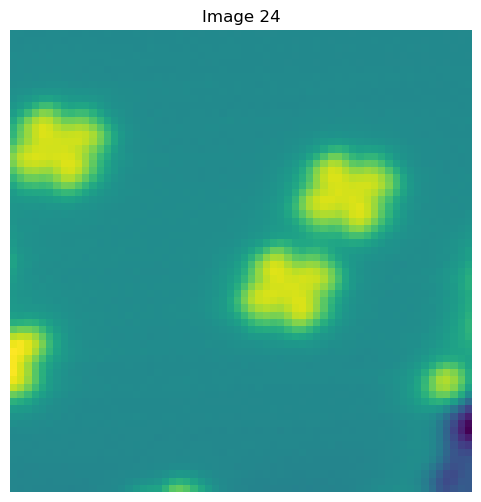

Enter the number of fully visible molecules for image 24:  3


Label for image 24: 3


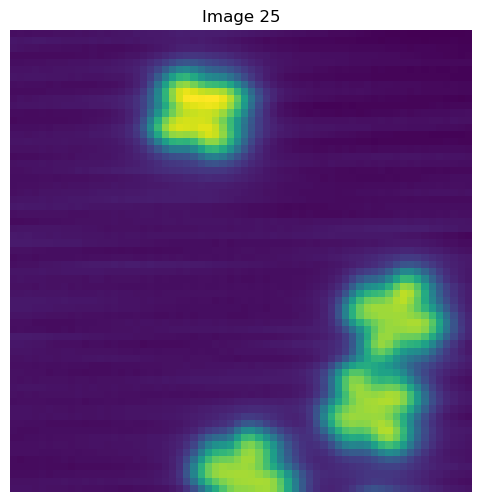

Enter the number of fully visible molecules for image 25:  3


Label for image 25: 3


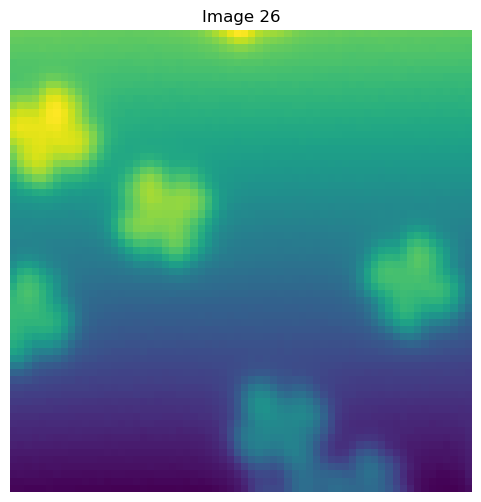

Enter the number of fully visible molecules for image 26:  4


Label for image 26: 4


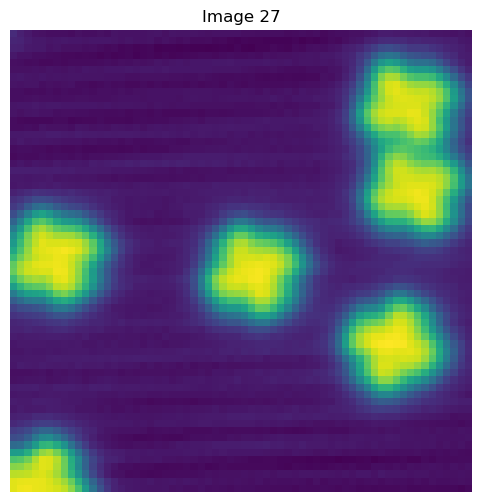

Enter the number of fully visible molecules for image 27:  5


Label for image 27: 5


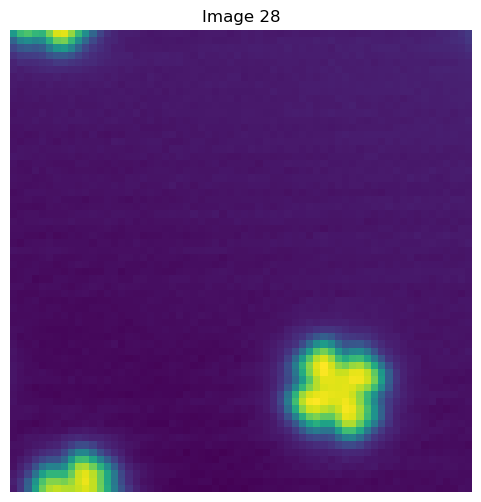

Enter the number of fully visible molecules for image 28:  1


Label for image 28: 1


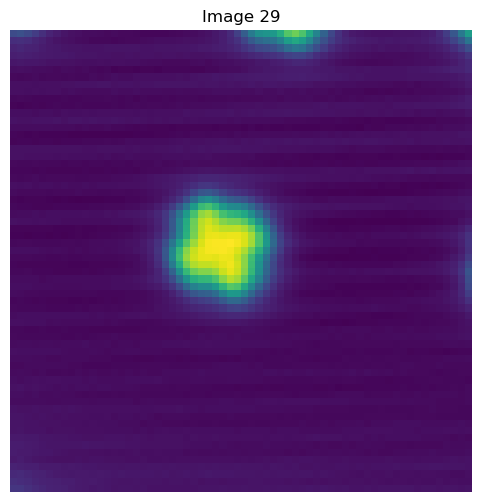

Enter the number of fully visible molecules for image 29:  1


Label for image 29: 1


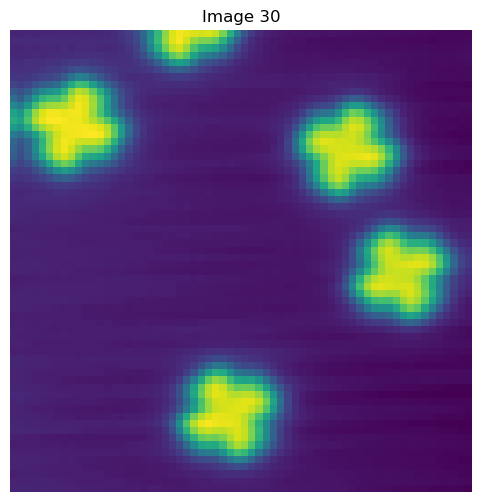

Enter the number of fully visible molecules for image 30:  4


Label for image 30: 4


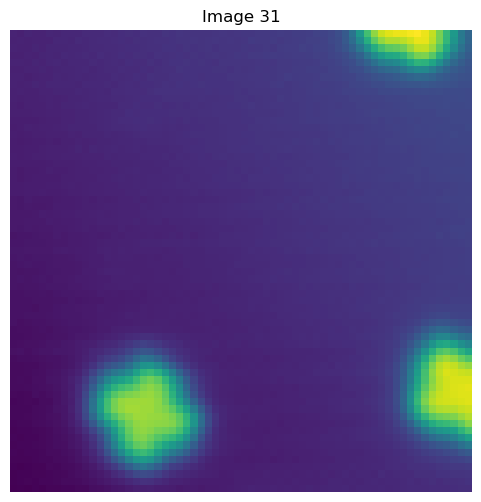

Enter the number of fully visible molecules for image 31:  1


Label for image 31: 1


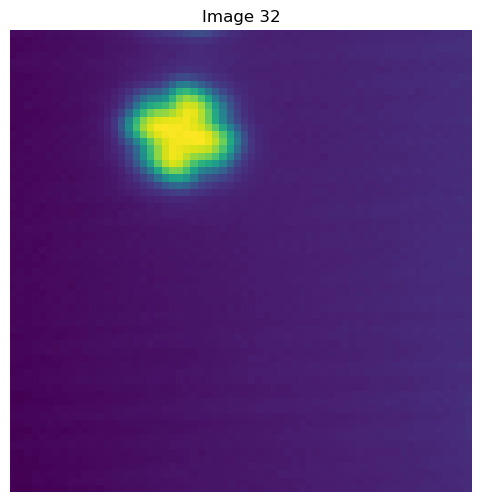

Enter the number of fully visible molecules for image 32:  1


Label for image 32: 1


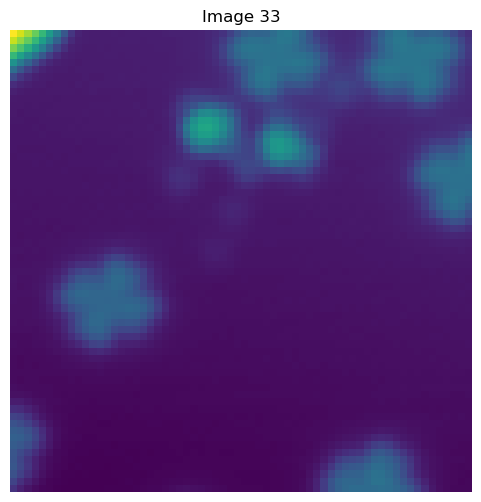

Enter the number of fully visible molecules for image 33:  2


Label for image 33: 2


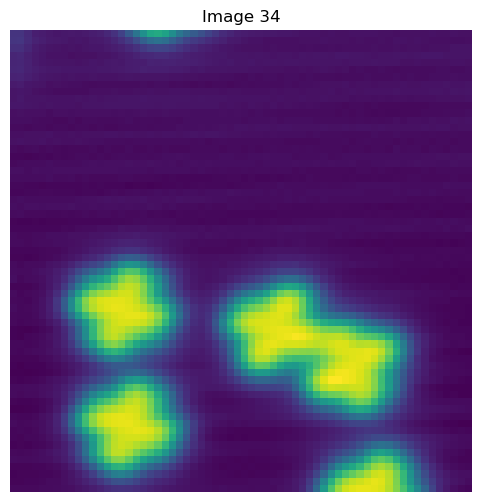

Enter the number of fully visible molecules for image 34:  4


Label for image 34: 4


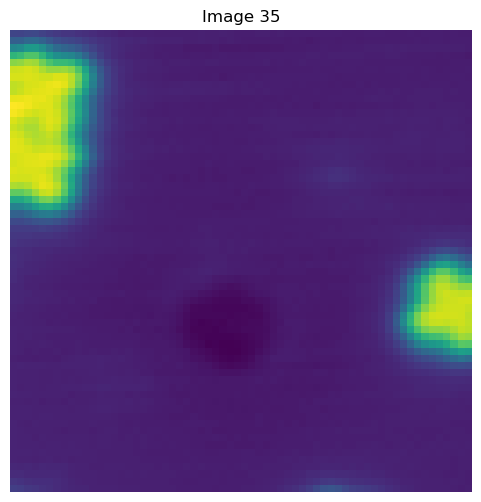

Enter the number of fully visible molecules for image 35:  1


Label for image 35: 1


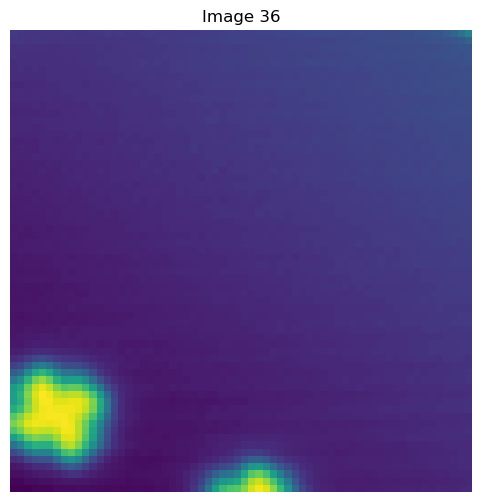

Enter the number of fully visible molecules for image 36:  1


Label for image 36: 1


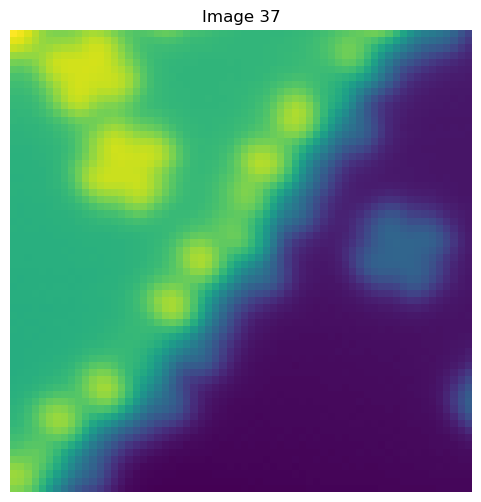

Enter the number of fully visible molecules for image 37:  3


Label for image 37: 3


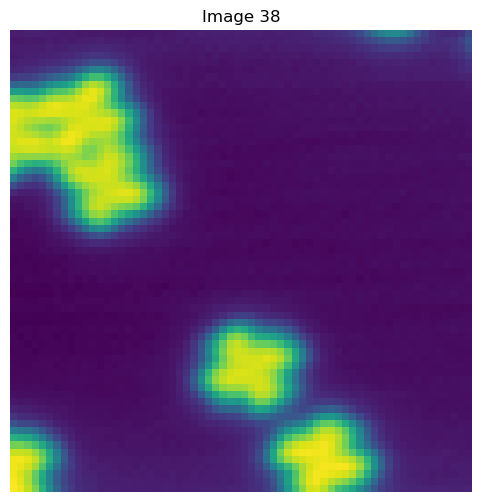

Enter the number of fully visible molecules for image 38:  4


Label for image 38: 4


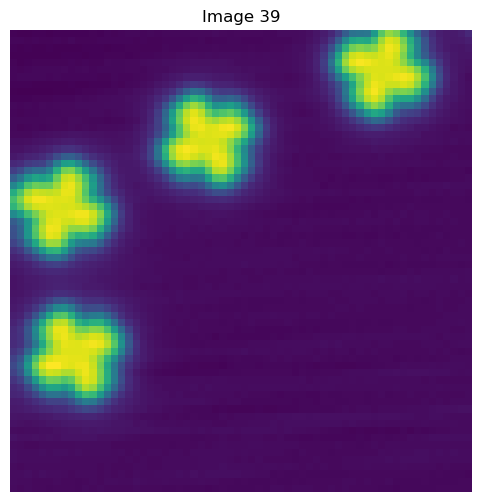

Enter the number of fully visible molecules for image 39:  4


Label for image 39: 4


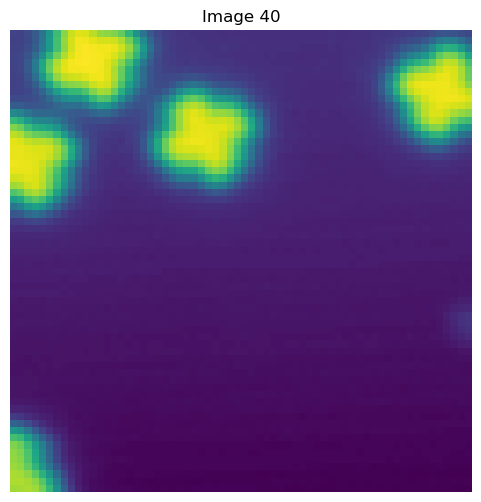

Enter the number of fully visible molecules for image 40:  3


Label for image 40: 3


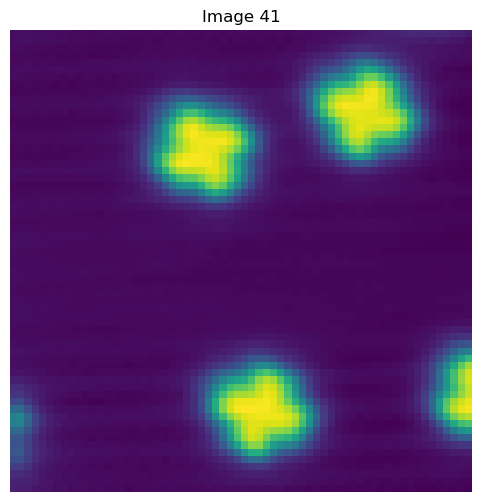

Enter the number of fully visible molecules for image 41:  3


Label for image 41: 3


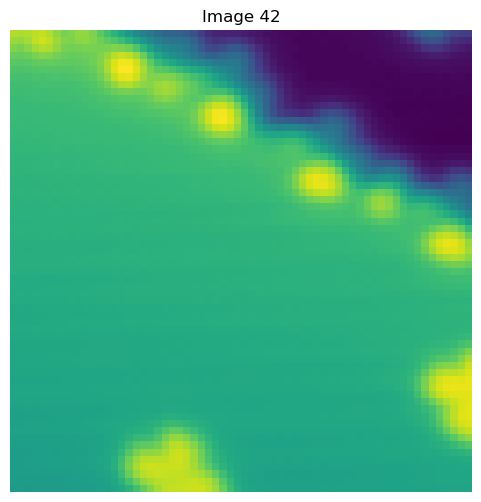

Enter the number of fully visible molecules for image 42:  0


Label for image 42: 0


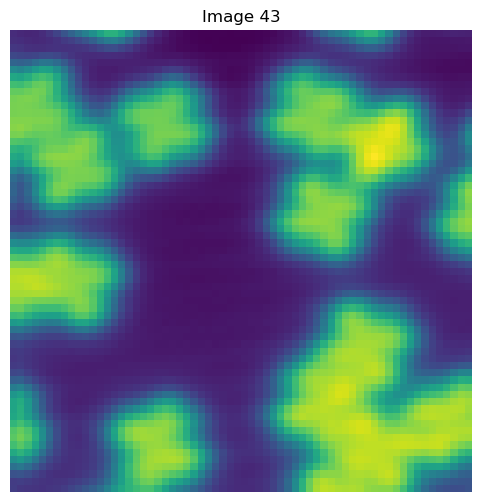

Enter the number of fully visible molecules for image 43:  10


Label for image 43: 10


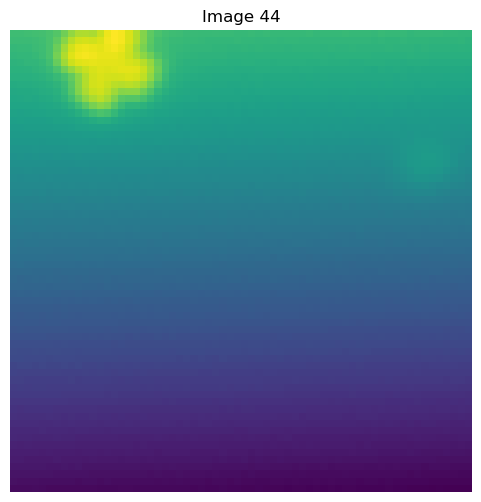

Enter the number of fully visible molecules for image 44:  0


Label for image 44: 0


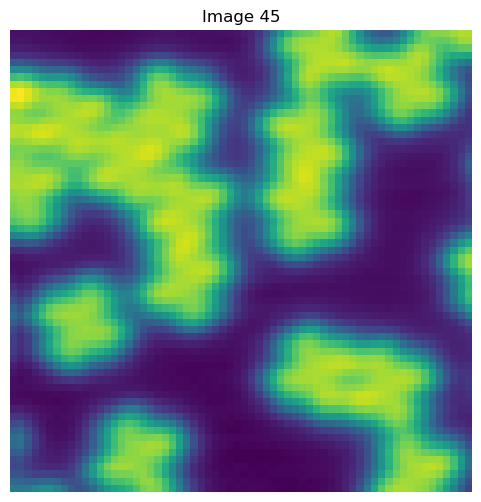

Enter the number of fully visible molecules for image 45:  12


Label for image 45: 12


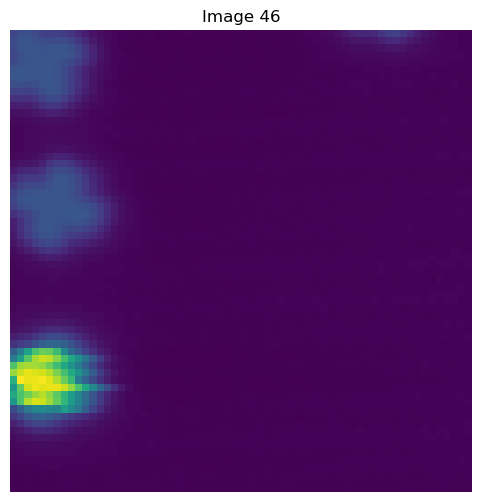

Enter the number of fully visible molecules for image 46:  1


Label for image 46: 1


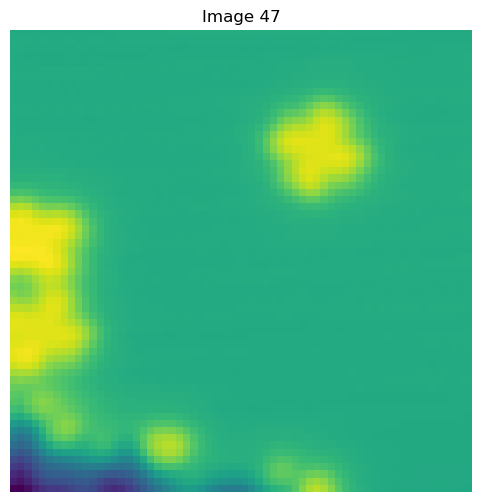

Enter the number of fully visible molecules for image 47:  1


Label for image 47: 1


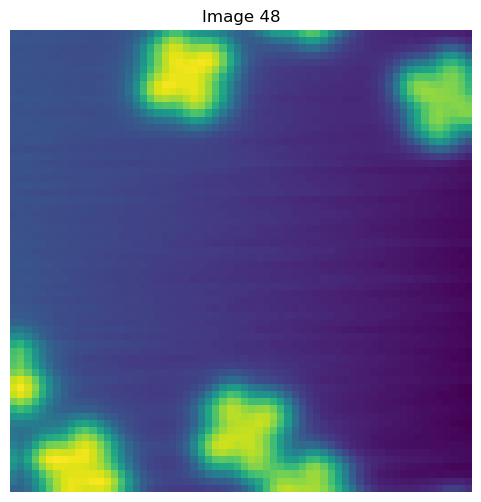

Enter the number of fully visible molecules for image 48:  2


Label for image 48: 2


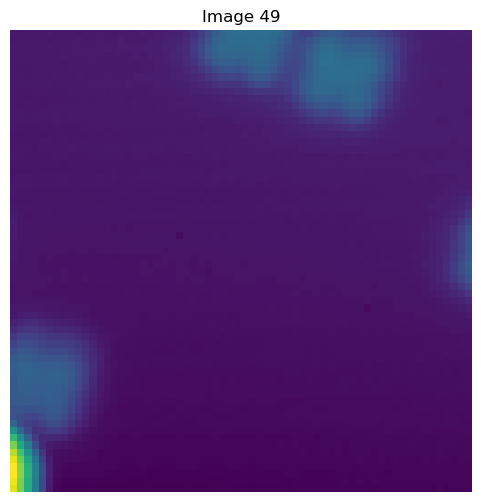

Enter the number of fully visible molecules for image 49:  1


Label for image 49: 1


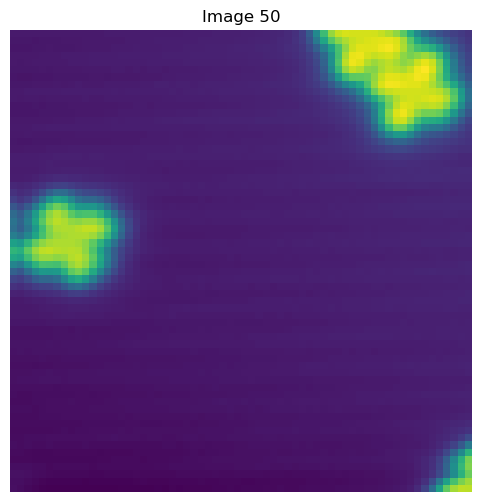

Enter the number of fully visible molecules for image 50:  2


Label for image 50: 2


In [55]:
### import os
import glob
import numpy as np
import matplotlib.pyplot as plt

# Path to the dataset
data_path = r'D:\exam\Datrix\assignmnet\stm-data\stm-data\Train'

# Find all matching files using glob
pattern = os.path.join(data_path, '*_molecules*.npy')
matching_files = glob.glob(pattern)

# Sort files to ensure consistent ordering
matching_files.sort()

# Load and display images for manual labeling
for i in range(min(50, len(matching_files))):  # Ensure we don't exceed available files
    file = matching_files[i]
    data = np.load(file)
    
    plt.figure(figsize=(6, 6))
    plt.imshow(data, cmap='viridis')
    plt.title(f"Image {i+1}")
    plt.axis('off')
    plt.show()
    
    # Manually input the label
    label = int(input(f"Enter the number of fully visible molecules for image {i+1}: "))
    print(f"Label for image {i+1}: {label}")

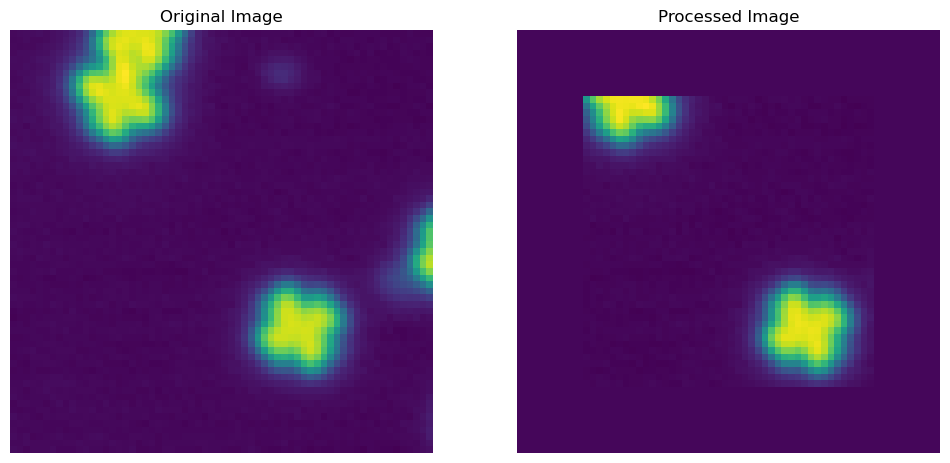

In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def remove_partial_molecules(image, edge_margin=5):
    """
    Removes partial molecules near the edges of the image.
    :param image: Input STM image (2D numpy array)
    :param edge_margin: Margin from the edges to consider as partial molecule region
    :return: Processed image with partial molecules removed
    """
    height, width = image.shape
    mask = np.ones_like(image, dtype=np.uint8)
    
    # Mask out the edge regions
    mask[:edge_margin, :] = 0  # Top edge
    mask[-edge_margin:, :] = 0  # Bottom edge
    mask[:, :edge_margin] = 0  # Left edge
    mask[:, -edge_margin:] = 0  # Right edge
    
    # Apply the mask to the image
    processed_image = image * mask
    return processed_image

# Example usage
file = os.path.join(data_path, '0001_molecules2.npy')
data = np.load(file)

processed_data = remove_partial_molecules(data, edge_margin=10)

# Display original and processed images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(data, cmap='viridis')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(processed_data, cmap='viridis')
plt.title("Processed Image")
plt.axis('off')
plt.show()

In [56]:
from skimage.measure import label, regionprops

def count_molecules(image, threshold_value=0.5):
    """
    Counts the number of fully visible molecules in the image.
    :param image: Input STM image (2D numpy array)
    :param threshold_value: Threshold value for segmentation
    :return: Number of molecules
    """
    # Apply thresholding
    binary_image = image > threshold_value
    
    # Label connected components
    labeled_image = label(binary_image)
    regions = regionprops(labeled_image)
    
    # Count regions (molecules)
    return len(regions)

# Example usage
file = os.path.join(data_path, '0001_molecules2.npy')
data = np.load(file)

num_molecules = count_molecules(data, threshold_value=0.5)
print(f"Number of molecules in the image: {num_molecules}")

Number of molecules in the image: 0


In [57]:
from sklearn.decomposition import PCA

def estimate_orientation(image, threshold_value=0.5):
    """
    Estimates the orientation of molecules in the image.
    :param image: Input STM image (2D numpy array)
    :param threshold_value: Threshold value for segmentation
    :return: List of angles (in degrees) for each molecule
    """
    # Apply thresholding
    binary_image = image > threshold_value
    
    # Label connected components
    labeled_image = label(binary_image)
    regions = regionprops(labeled_image)
    
    angles = []
    for region in regions:
        coords = region.coords  # Coordinates of the molecule
        pca = PCA(n_components=2)
        pca.fit(coords)
        
        # Angle of the major principal axis
        angle = np.arctan2(pca.components_[0, 1], pca.components_[0, 0]) * (180 / np.pi)
        angle = angle % 90  # Normalize to [0, 89]
        angles.append(angle)
    
    return angles

# Example usage
file = os.path.join(data_path, '0001_molecules2.npy')
data = np.load(file)

angles = estimate_orientation(data, threshold_value=0.5)
print(f"Estimated angles: {angles}")

Estimated angles: []


# Segmentation of objects>Label image regions

Label image regions
This example shows how to segment an image with image labelling. The following steps are applied:

Thresholding with automatic Otsu method

Close small holes with binary closing

Remove artifacts touching image border

Measure image regions to filter small objects

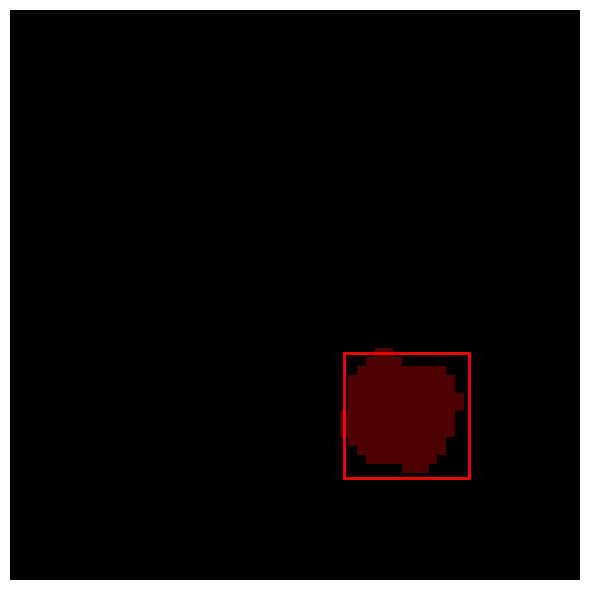

Number of molecules fully inside FoV (area >= 100): 1


In [46]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, footprint_rectangle
from skimage.color import label2rgb

# Step 1: Define the dataset path
data_path = r"D:\exam\test\stm-data\Train"
image_files = [f for f in os.listdir(data_path) if f.endswith(".npy")]

# Process the first image as an example
img_file = image_files[0]
img_path = os.path.join(data_path, img_file)
image = np.load(img_path)

# Step 2: Normalize the image to [0, 1] range
image = np.clip(image, 0, 1)  # Ensure values are within [0, 1]

# Step 3: Preprocess the image
# Apply Otsu's thresholding
thresh = threshold_otsu(image)
bw = closing(image > thresh, footprint_rectangle((3, 3)))  # Binary closing with a 3x3 rectangle footprint

# Step 4: Remove artifacts connected to the image border
cleared = clear_border(bw)

# Step 5: Label image regions
label_image = label(cleared)
# Create an overlay of labeled regions on the original image
image_label_overlay = label2rgb(label_image, image=image, bg_label=0)

# Step 6: Filter regions based on area and visualize
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # Take regions with large enough areas (adjust the threshold as needed)
    if region.area >= 100:
        # Draw a rectangle around segmented molecules
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle(
            (minc, minr),
            maxc - minc,
            maxr - minr,
            fill=False,
            edgecolor='red',
            linewidth=2,
        )
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

# Print the number of filtered molecules
filtered_molecules = [region for region in regionprops(label_image) if region.area >= 100]
print(f"Number of molecules fully inside FoV (area >= 100): {len(filtered_molecules)}")

In [48]:
import os
import numpy as np
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, footprint_rectangle

# Step 1: Define the dataset path
data_path = r"D:\exam\test\stm-data\Train"
image_files = [f for f in os.listdir(data_path) if f.endswith(".npy")]

# Initialize results storage
results = []

# Process the first 50 images
for img_file in image_files[:50]:
    img_path = os.path.join(data_path, img_file)
    image = np.load(img_path)

    # Step 2: Apply Otsu's thresholding
    thresh = threshold_otsu(image)
    bw = closing(image > thresh, footprint_rectangle((3, 3)))  # Use footprint_rectangle with a tuple

    # Step 3: Remove artifacts connected to the image border
    cleared = clear_border(bw)

    # Step 4: Label image regions
    label_image = label(cleared)

    # Step 5: Filter regions based on area
    filtered_molecules = [region for region in regionprops(label_image) if region.area >= 100]

    # Store the result
    results.append((img_file, len(filtered_molecules)))

# Step 6: Print the results
print("Molecule Counts (Fully Inside FoV, Area >= 100):")
for img_file, count in results:
    print(f"Image: {img_file} -> Number of Molecules: {count}")

Molecule Counts (Fully Inside FoV, Area >= 100):
Image: 0001_molecules2.npy -> Number of Molecules: 1
Image: 0002_molecules2.npy -> Number of Molecules: 1
Image: 0003_molecules1.npy -> Number of Molecules: 1
Image: 0004_molecules2.npy -> Number of Molecules: 0
Image: 0005_molecules4.npy -> Number of Molecules: 1
Image: 0006_molecules1.npy -> Number of Molecules: 1
Image: 0007_molecules7.npy -> Number of Molecules: 0
Image: 0008_molecules2.npy -> Number of Molecules: 2
Image: 0009_molecules3.npy -> Number of Molecules: 1
Image: 0010_molecules1.npy -> Number of Molecules: 1
Image: 0011_molecules7.npy -> Number of Molecules: 0
Image: 0012_molecules1.npy -> Number of Molecules: 1
Image: 0013_molecules1.npy -> Number of Molecules: 1
Image: 0014_molecules2.npy -> Number of Molecules: 0
Image: 0015_molecules0.npy -> Number of Molecules: 0
Image: 0016_molecules1.npy -> Number of Molecules: 1
Image: 0017_molecules4.npy -> Number of Molecules: 0
Image: 0018_molecules7.npy -> Number of Molecules:

# Image Processing Pipeline for Molecule Detection

## Explanation of Key Components

### 1. Thresholding
- The `threshold_otsu` function is used to automatically determine the optimal threshold value for binarizing the image.
- Pixels with intensity values above the threshold are considered foreground (molecules), while others are background.

### 2. Binary Closing
- The closing operation with a 3×3 square footprint fills small holes in the binary image, ensuring that molecules are not fragmented.

### 3. Remove Artifacts Touching Image Border
- The `clear_border` function removes any binary regions that touch the edges of the image, ensuring that only fully inside molecules are retained.

### 4. Label Image Regions
- The `label` function assigns unique labels to each connected component (molecule) in the binary image.

### 5. Filter Small Objects
- Using `regionprops`, we compute properties like the area of each labeled region.
- Only regions with an area greater than or equal to a specified threshold (e.g., 100 pixels) are considered valid molecules.

### 6. Visualization
- The `label2rgb` function creates an overlay of labeled regions on the original image.
- Rectangles are drawn around valid molecules to highlight them.

---

## Example Output
For an input image from your dataset, the script will produce the following:

### Visualization
- A labeled overlay of the image, where each molecule is highlighted with a unique color.
- Red rectangles are drawn around molecules with an area greater than or equal to the threshold (e.g., 100 pixels).

### Console Output
```plaintext
Number of molecules fully inside FoV (area >= 100): 12

#  Segmentation of objects > Find the intersection of two segmentations
https://scikit-image.org/docs/0.25.x/auto_examples/segmentation/plot_join_segmentations.html

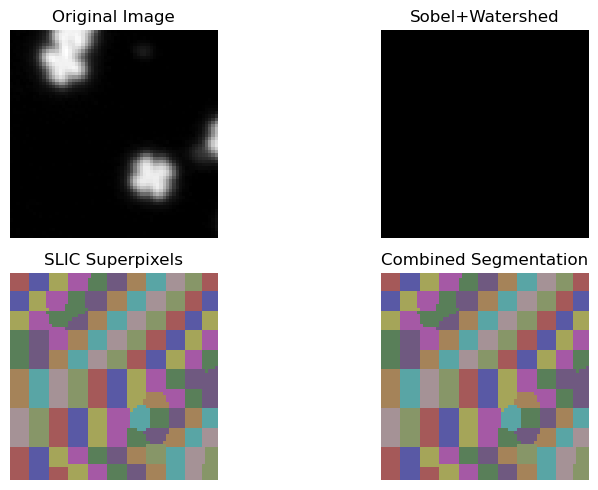

In [52]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import sobel
from skimage.measure import label
from skimage.segmentation import slic, join_segmentations, watershed
from skimage.color import label2rgb

# Step 1: Define the dataset path
data_path = r"D:\exam\test\stm-data\Train"
image_files = [f for f in os.listdir(data_path) if f.endswith(".npy")]

# Process the first image as an example
img_file = image_files[0]
img_path = os.path.join(data_path, img_file)
coins = np.load(img_path)

# Normalize the image to [0, 1] range
coins = np.clip(coins, 0, 1)

# Step 2: Make segmentation using edge-detection and watershed
edges = sobel(coins)  # Compute edges using Sobel filter

# Identify some background and foreground pixels from the intensity values.
# These pixels are used as seeds for watershed.
markers = np.zeros_like(coins, dtype=np.int32)  # Ensure markers are integers
foreground, background = 1, 2
markers[coins < 0.3] = background  # Adjust threshold for background
markers[coins > 0.7] = foreground  # Adjust threshold for foreground

# Ensure markers and edges have compatible data types
ws = watershed(edges.astype(float), markers)

seg1 = label(ws == foreground)

# Step 3: Make segmentation using SLIC superpixels
seg2 = slic(
    coins,
    n_segments=117,
    max_num_iter=160,
    sigma=1,
    compactness=0.75,
    channel_axis=None,
    start_label=0,
)

# Step 4: Combine the two segmentations
segj = join_segmentations(seg1, seg2)

# Step 5: Show the segmentations
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(9, 5), sharex=True, sharey=True)
ax = axes.ravel()

# Original image
ax[0].imshow(coins, cmap='gray')
ax[0].set_title('Original Image')

# Sobel + Watershed segmentation
color1 = label2rgb(seg1, image=coins, bg_label=0)
ax[1].imshow(color1)
ax[1].set_title('Sobel+Watershed')

# SLIC superpixels segmentation
color2 = label2rgb(seg2, image=coins, image_alpha=0.5, bg_label=-1)
ax[2].imshow(color2)
ax[2].set_title('SLIC Superpixels')

# Combined segmentation
color3 = label2rgb(segj, image=coins, image_alpha=0.5, bg_label=-1)
ax[3].imshow(color3)
ax[3].set_title('Combined Segmentation')

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

In [53]:
for img_file in image_files[:50]:  # Process the first 50 images
    img_path = os.path.join(data_path, img_file)
    coins = np.load(img_path)
    coins = np.clip(coins, 0, 1)

    # Repeat the same steps as above...

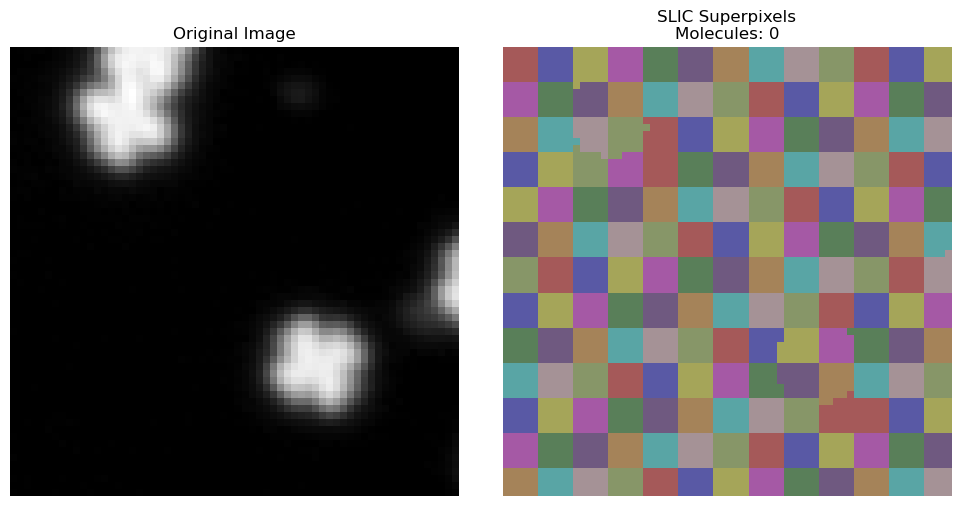

Molecule Counts (SLIC Superpixels):
Image: 0001_molecules2.npy -> Number of Molecules: 0
Image: 0002_molecules2.npy -> Number of Molecules: 0
Image: 0003_molecules1.npy -> Number of Molecules: 0
Image: 0004_molecules2.npy -> Number of Molecules: 0
Image: 0005_molecules4.npy -> Number of Molecules: 0
Image: 0006_molecules1.npy -> Number of Molecules: 0
Image: 0007_molecules7.npy -> Number of Molecules: 0
Image: 0008_molecules2.npy -> Number of Molecules: 0
Image: 0009_molecules3.npy -> Number of Molecules: 0
Image: 0010_molecules1.npy -> Number of Molecules: 0
Image: 0011_molecules7.npy -> Number of Molecules: 0
Image: 0012_molecules1.npy -> Number of Molecules: 0
Image: 0013_molecules1.npy -> Number of Molecules: 0
Image: 0014_molecules2.npy -> Number of Molecules: 0
Image: 0015_molecules0.npy -> Number of Molecules: 0
Image: 0016_molecules1.npy -> Number of Molecules: 0
Image: 0017_molecules4.npy -> Number of Molecules: 0
Image: 0018_molecules7.npy -> Number of Molecules: 0
Image: 001

In [57]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import slic
from skimage.measure import label, regionprops
from skimage.color import label2rgb

# Step 1: Define the dataset path
data_path = r"D:\exam\test\stm-data\Train"
image_files = [f for f in os.listdir(data_path) if f.endswith(".npy")]

# Initialize results storage
results = []

# Process all images in the dataset
for img_file in image_files[:50]:  # Process the first 50 images
    img_path = os.path.join(data_path, img_file)
    coins = np.load(img_path)

    # Normalize the image to [0, 1] range
    coins = np.clip(coins, 0, 1)

    # Step 2: Apply SLIC Superpixels segmentation
    seg2 = slic(
        coins,
        n_segments=150,  # Number of superpixels (adjust based on image complexity)
        max_num_iter=160,
        sigma=1,         # Smoothing factor
        compactness=0.75,  # Balance between color proximity and spatial proximity
        channel_axis=None,
        start_label=0,
    )

    # Step 3: Filter regions based on area
    filtered_regions = []
    for region in regionprops(seg2):
        if region.area >= 50:  # Minimum area threshold (adjust based on molecule size)
            filtered_regions.append(region)

    # Count the number of molecules
    molecule_count = len(filtered_regions)

    # Store the result
    results.append((img_file, molecule_count))

    # Optional: Visualize one example image
    if img_file == image_files[0]:
        fig, axes = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)
        ax = axes.ravel()

        # Original Image
        ax[0].imshow(coins, cmap='gray')
        ax[0].set_title('Original Image')

        # SLIC Superpixels with Molecule Count
        color2 = label2rgb(seg2, image=coins, image_alpha=0.5, bg_label=-1)
        ax[1].imshow(color2)
        ax[1].set_title(f'SLIC Superpixels\nMolecules: {molecule_count}')

        for a in ax:
            a.axis('off')

        plt.tight_layout()
        plt.show()

# Step 4: Print the results
print("Molecule Counts (SLIC Superpixels):")
for img_file, count in results:
    print(f"Image: {img_file} -> Number of Molecules: {count}")